#  H1N1 Vaccination Shot Prediction

Objective is to perform a  classification of whether a person took the H1N1 vaccine or not.

# Data Collection

Data was collected from  Centers for Disease Control and Prevention (National Public Health Agency of the United States).<br>
The data contains  170 + features containing behaviour, knowledge, concern, opinion, demographics and health realted queries of the surveyee regarding H1N1 influenza virus.<br><br>
The data was collected from https://www.cdc.gov/nchs/nis/data_files_h1n1.htm

# Libraries used in Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes
from catboost import CatBoostClassifier
import xgboost as xgb

# Importing dataset

In [4]:
df = pd.read_csv("H1N1.CSV")

In [5]:
df.head()

,INT_MONTH,LANGUAGE,SAMP_DESIG,SEQNUMHH,SEQNUMP,SUBGROUP,VACC1_H1N1_M,VACC1_H1N1_T,VACC1_H1N1_Y,VACC1_SEAS_M,...,RACEETH4_I,RACE_I_R,RENT_OWN_R,SEX_I,CEN_REG,FLUWT,HHS_REGION,MSA3_I,MSA_DEF,STATE
0,OCT09,1,FR,38548,385481,A,NaN,NaN,NaN,NaN,...,3,1,2.0,2,4,213.304270,6,1,NOV 2008,35
1,OCT09,1,FR,18823,188231,A,NaN,NaN,NaN,10.0,...,4,3,2.0,2,2,5160.215000,5,2,NOV 2008,39
2,OCT09,1,FR,18823,188232,C,NaN,NaN,NaN,10.0,...,1,3,2.0,2,2,20235.802976,5,2,NOV 2008,39
3,NOV09,1,FR,54046,540461,A,NaN,NaN,NaN,10.0,...,3,1,1.0,2,4,804.891317,10,3,NOV 2008,16
4,OCT09,1,FR,21986,219861,A,NaN,NaN,NaN,NaN,...,3,1,1.0,2,4,2849.547713,10,1,NOV 2008,41


# Data summary

In [6]:
df.shape

(70944, 171)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70944 entries, 0 to 70943
Columns: 171 entries, INT_MONTH to STATE
dtypes: float64(153), int64(14), object(4)
memory usage: 92.6+ MB


In [8]:
df.describe()

,LANGUAGE,SEQNUMHH,SEQNUMP,VACC1_H1N1_M,VACC1_H1N1_T,VACC1_H1N1_Y,VACC1_SEAS_M,VACC1_SEAS_T,VACC1_SEAS_Y,VACC2_H1N1_M,...,Q95_OCCPN,RACEETH4_I,RACE_I_R,RENT_OWN_R,SEX_I,CEN_REG,FLUWT,HHS_REGION,MSA3_I,STATE
count,70944.000000,70944.000000,70944.000000,16076.000000,16838.000000,16076.000000,31024.000000,32153.000000,31024.000000,1755.000000,...,28693.000000,70944.000000,70944.000000,67213.000000,70944.000000,70944.000000,70944.000000,70944.000000,70944.000000,70944.000000
mean,1.045980,28306.569308,283066.894480,8.968649,1.162371,2009.198495,9.666001,1.055205,2009.040291,7.478063,...,12.941554,2.827681,1.238526,2.912026,1.571084,2.703837,4218.164806,5.353871,1.973951,28.630821
std,0.248418,16367.321043,163673.209285,3.814291,0.368802,0.398879,1.861818,0.228383,0.196645,4.807225,...,14.985142,0.656012,0.577033,12.568070,0.494925,1.032971,6977.696029,2.699119,0.741232,15.789905
min,1.000000,1.000000,11.000000,1.000000,1.000000,2009.000000,1.000000,1.000000,2009.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.030860,1.000000,1.000000,1.000000
25%,1.000000,14123.750000,141238.500000,9.000000,1.000000,2009.000000,9.000000,1.000000,2009.000000,2.000000,...,5.000000,3.000000,1.000000,1.000000,1.000000,2.000000,787.226497,3.000000,1.000000,16.000000
50%,1.000000,28293.500000,282936.000000,11.000000,1.000000,2009.000000,10.000000,1.000000,2009.000000,11.000000,...,10.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2025.366299,5.000000,2.000000,29.000000
75%,1.000000,42499.250000,424993.500000,11.000000,1.000000,2009.000000,10.000000,1.000000,2009.000000,12.000000,...,17.000000,3.000000,1.000000,2.000000,2.000000,4.000000,4722.788381,8.000000,3.000000,42.000000
max,3.000000,56658.000000,566581.000000,12.000000,2.000000,2010.000000,12.000000,2.000000,2010.000000,12.000000,...,98.000000,4.000000,3.000000,99.000000,2.000000,4.000000,192422.453196,10.000000,3.000000,56.000000


In [9]:
df.columns

Index(['INT_MONTH', 'LANGUAGE', 'SAMP_DESIG', 'SEQNUMHH', 'SEQNUMP',
       'SUBGROUP', 'VACC1_H1N1_M', 'VACC1_H1N1_T', 'VACC1_H1N1_Y',
       'VACC1_SEAS_M',
       ...
       'RACEETH4_I', 'RACE_I_R', 'RENT_OWN_R', 'SEX_I', 'CEN_REG', 'FLUWT',
       'HHS_REGION', 'MSA3_I', 'MSA_DEF', 'STATE'],
      dtype='object', length=171)

# Features for Analysis

### As the data contains 171 columns but all are not related to behaviour and demographic thus we will remove the rest

### Columns that are to kept are related to following topics
- **BEHAVIORAL INDICATOR**
    - B_H1N1_ANTIV: TAKING ANTIVIRAL MEDICATIONS
    - B_H1N1_AVOID: AVOID CLOSE CONTACT WITH OTHERS WITH FLULIKE SYMPTOMS
    - B_H1N1_FMASK: BOUGHT A FACE MASK
    - B_H1N1_HANDS: WASHING HANDS
    - B_H1N1_LARGE: REDUCED TIME AT LARGE GATHERINGS
    - B_H1N1_RCONT: REDUCED CONTACT OUTSIDE THE HOME
    - B_H1N1_TOUCH: AVOID TOUCHING EYES, NOSE, OR MOUTH
- **OPINION**
    - HQ23: EFFECTIVENESS OF H1N1 VACCINE
    - HQ24: RISK OF GETTING SICK WITH H1N1 FLU WITHOUT VACCINE
    - HQ24_B: WORRY ABOUT GETTING SICK FROM THE H1N1 VACCINE
- **CONCERN**
    - CONCERN_DKNW_F: H1N1 CONCERN LEVEL UNKNOWN
    - CONCERN_NONE_F:NOT AT ALL CONCERNED ABOUT H1N1 FLU
    - CONCERN_NOTV_F:NOT VERY CONCERNED ABOUT H1N1 FLU
    - CONCERN_REFD_F:H1N1 CONCERN LEVEL REFUSED
    - CONCERN_SOME_F:SOMEWHAT CONCERNED ABOUT H1N1 FLU
    - CONCERN_VERY_F:VERY CONCERNED ABOUT H1N1 FLU
- **KNOWLEDGE**
    - KNOW_H1N1_ALOT_F: A LOT OF KNOWLEDGE ABOUT H1N1 FL
    - KNOW_H1N1_DKNW_F: KNOWLEDGE LEVEL ABOUT H1N1 FLU UNKNOWN
    - KNOW_H1N1_LITL_F: A LITTLE KNOWLEDGE ABOUT H1N1 FLU
    - KNOW_H1N1_NONE_F: NO KNOWLEDGE ABOUT H1N1 FLU
    - KNOW_H1N1_REFD_F: KNOWLEDGE LEVEL ABOUT H1N1 FLU REFUSED
- **VACC_H1N1_COUNT: NUMBER OF H1N1 FLU VACCINATIONS**
- **OTHERS**
    - DOCREC_H1N1_F: DOCTORS RECOMMENDATION FOR H1N1 VACCINE
    - INSURE: HAS HEALTH INSURANCE COVERAGE
    - HEALTH_WORKER_F: WORKS IN HEALTH CARE FIELD FLAG
    - CHRONIC_MED_F: CHRONIC MEDICAL CONDITION FLAG
    - PATIENT_CONTACT_F: DIRECT PATIENT CONTACT FLAG
    - CLOSE_UNDER6MO_F: CLOSE CONTACT WITH CHILD UNDER 6 MONTHS FLAG
    - AGEGRP: AGE GROUP
    - EDUCATION_COMP: ADULT SELF-REPORTED EDUCATION LEVEL
    - INC_CAT1: HOUSEHOLD INCOME CATEGORY
    - RENT_OWN_R: IS HOME RENTED OR OWNED
    - SEX_I: GENDER OF PERSON
    - MARITAL: MARITAL STATUS
    - RACE_I_R: RACE WITH MULTIRACE CATEGORY
    - Q95: WORK STATUS
    - Q95INDSTR: EMPLOYMENT INDUSTRY TYPE CODE
    - MSA3_I: 3-CATEGORY MSA STATUS
    - HHS_REGION: HHS SURVEILLANCE REGION NUMBER

In [10]:
columns_to_keep = [
    'B_H1N1_ANTIV', 'B_H1N1_AVOID', 'B_H1N1_FMASK', 'B_H1N1_HANDS', 'B_H1N1_LARGE',
    'B_H1N1_RCONT', 'B_H1N1_TOUCH', 'HQ23', 'HQ24', 'HQ24_B', 'CONCERN_DKNW_F',
    'CONCERN_NONE_F', 'CONCERN_NOTV_F', 'CONCERN_REFD_F', 'CONCERN_SOME_F', 'CONCERN_VERY_F',
    'KNOW_H1N1_ALOT_F', 'KNOW_H1N1_DKNW_F', 'KNOW_H1N1_LITL_F', 'KNOW_H1N1_NONE_F', 'KNOW_H1N1_REFD_F',
    'DOCREC_H1N1_F', 'INSURE', 'HEALTH_WORKER_F', 'CHRONIC_MED_F', 'PATIENT_CONTACT_F',
    'CLOSE_UNDER6MO_F', 'AGEGRP', 'EDUCATION_COMP', 'INC_CAT1', 'RENT_OWN_R',
    'SEX_I', 'MARITAL', 'RACE_I_R', 'Q95', 'Q95_INDSTR',
    'MSA3_I','HHS_REGION','VACC_H1N1_COUNT'
]

# Drop columns not in columns_to_keep
df = df[columns_to_keep]

In [11]:
df.shape

(70944, 39)

In [12]:
df.describe()

,B_H1N1_ANTIV,B_H1N1_AVOID,B_H1N1_FMASK,B_H1N1_HANDS,B_H1N1_LARGE,B_H1N1_RCONT,B_H1N1_TOUCH,HQ23,HQ24,HQ24_B,...,INC_CAT1,RENT_OWN_R,SEX_I,MARITAL,RACE_I_R,Q95,Q95_INDSTR,MSA3_I,HHS_REGION,VACC_H1N1_COUNT
count,56481.000000,56194.000000,56615.000000,56559.000000,56486.000000,56474.000000,56374.000000,56017.000000,55930.000000,55852.000000,...,55731.000000,67213.000000,70944.000000,53595.000000,70944.000000,53896.000000,28693.000000,70944.000000,70944.000000,70369.000000
mean,0.049433,0.726608,0.069257,0.825174,0.355203,0.338297,0.679764,15.781656,6.525478,3.481200,...,5.140353,2.912026,1.571084,1.466163,1.238526,2.527646,13.440874,1.973951,5.353871,0.267120
std,0.216771,0.445704,0.253893,0.379822,0.478579,0.473134,0.466571,29.368038,15.981437,6.449134,...,1.935466,12.568070,0.494925,0.498858,0.577033,7.786411,11.269766,0.741232,2.699119,0.499743
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,...,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,3.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000,...,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,15.000000,2.000000,5.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,...,7.000000,2.000000,2.000000,2.000000,1.000000,3.000000,16.000000,3.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,99.000000,99.000000,...,7.000000,99.000000,2.000000,2.000000,3.000000,99.000000,98.000000,3.000000,10.000000,2.000000


# Data Cleaning

## 1.Checking null values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70944 entries, 0 to 70943
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   B_H1N1_ANTIV       56481 non-null  float64
 1   B_H1N1_AVOID       56194 non-null  float64
 2   B_H1N1_FMASK       56615 non-null  float64
 3   B_H1N1_HANDS       56559 non-null  float64
 4   B_H1N1_LARGE       56486 non-null  float64
 5   B_H1N1_RCONT       56474 non-null  float64
 6   B_H1N1_TOUCH       56374 non-null  float64
 7   HQ23               56017 non-null  float64
 8   HQ24               55930 non-null  float64
 9   HQ24_B             55852 non-null  float64
 10  CONCERN_DKNW_F     56656 non-null  float64
 11  CONCERN_NONE_F     56656 non-null  float64
 12  CONCERN_NOTV_F     56656 non-null  float64
 13  CONCERN_REFD_F     56656 non-null  float64
 14  CONCERN_SOME_F     56656 non-null  float64
 15  CONCERN_VERY_F     56656 non-null  float64
 16  KNOW_H1N1_ALOT_F   566

## 2.Dropping rows having null values most of the features

In [14]:
# List of columns to check for null values
columns_to_check = ['CONCERN_DKNW_F', 'CONCERN_NONE_F', 'CONCERN_NOTV_F', 'CONCERN_REFD_F', 
                    'CONCERN_SOME_F', 'CONCERN_VERY_F', 'KNOW_H1N1_ALOT_F', 'KNOW_H1N1_DKNW_F', 
                    'KNOW_H1N1_LITL_F', 'KNOW_H1N1_NONE_F', 'KNOW_H1N1_REFD_F']

# Drop rows with null values in the specified columns
df = df.dropna(subset=columns_to_check, how='all')

In [15]:
df.isnull().sum()

B_H1N1_ANTIV           175
B_H1N1_AVOID           462
B_H1N1_FMASK            41
B_H1N1_HANDS            97
B_H1N1_LARGE           170
B_H1N1_RCONT           182
B_H1N1_TOUCH           282
HQ23                   639
HQ24                   726
HQ24_B                 804
CONCERN_DKNW_F           0
CONCERN_NONE_F           0
CONCERN_NOTV_F           0
CONCERN_REFD_F           0
CONCERN_SOME_F           0
CONCERN_VERY_F           0
KNOW_H1N1_ALOT_F         0
KNOW_H1N1_DKNW_F         0
KNOW_H1N1_LITL_F         0
KNOW_H1N1_NONE_F         0
KNOW_H1N1_REFD_F         0
DOCREC_H1N1_F         3081
INSURE               25808
HEALTH_WORKER_F       1725
CHRONIC_MED_F         2065
PATIENT_CONTACT_F     4526
CLOSE_UNDER6MO_F      1766
AGEGRP                   0
EDUCATION_COMP        3023
INC_CAT1             13299
RENT_OWN_R            3385
SEX_I                    0
MARITAL               3061
RACE_I_R                 0
Q95                   2760
Q95_INDSTR           27963
MSA3_I                   0
H

In [16]:
(df.isnull().sum() /  df.shape[0]) * 100

B_H1N1_ANTIV          0.308882
B_H1N1_AVOID          0.815448
B_H1N1_FMASK          0.072367
B_H1N1_HANDS          0.171209
B_H1N1_LARGE          0.300056
B_H1N1_RCONT          0.321237
B_H1N1_TOUCH          0.497741
HQ23                  1.127859
HQ24                  1.281418
HQ24_B                1.419091
CONCERN_DKNW_F        0.000000
CONCERN_NONE_F        0.000000
CONCERN_NOTV_F        0.000000
CONCERN_REFD_F        0.000000
CONCERN_SOME_F        0.000000
CONCERN_VERY_F        0.000000
KNOW_H1N1_ALOT_F      0.000000
KNOW_H1N1_DKNW_F      0.000000
KNOW_H1N1_LITL_F      0.000000
KNOW_H1N1_NONE_F      0.000000
KNOW_H1N1_REFD_F      0.000000
DOCREC_H1N1_F         5.438082
INSURE               45.552104
HEALTH_WORKER_F       3.044691
CHRONIC_MED_F         3.644804
PATIENT_CONTACT_F     7.988563
CLOSE_UNDER6MO_F      3.117057
AGEGRP                0.000000
EDUCATION_COMP        5.335710
INC_CAT1             23.473242
RENT_OWN_R            5.974654
SEX_I                 0.000000
MARITAL 

Columns 'INSURE', 'Q95_INDSTR' , 'INC_CAT1' contain too many NULL values

## 3.Droping columns having too many NULL values

In [17]:
# close to half the values of these columns are NULL so discarding
df.drop(['INSURE', 'Q95_INDSTR' , 'INC_CAT1'],axis=1,inplace = True)

## 4. Imputing Missing Values

In [18]:
df.nunique()

B_H1N1_ANTIV          2
B_H1N1_AVOID          2
B_H1N1_FMASK          2
B_H1N1_HANDS          2
B_H1N1_LARGE          2
B_H1N1_RCONT          2
B_H1N1_TOUCH          2
HQ23                  6
HQ24                  6
HQ24_B                6
CONCERN_DKNW_F        2
CONCERN_NONE_F        2
CONCERN_NOTV_F        2
CONCERN_REFD_F        2
CONCERN_SOME_F        2
CONCERN_VERY_F        2
KNOW_H1N1_ALOT_F      2
KNOW_H1N1_DKNW_F      2
KNOW_H1N1_LITL_F      2
KNOW_H1N1_NONE_F      2
KNOW_H1N1_REFD_F      2
DOCREC_H1N1_F         2
HEALTH_WORKER_F       2
CHRONIC_MED_F         2
PATIENT_CONTACT_F     2
CLOSE_UNDER6MO_F      2
AGEGRP                5
EDUCATION_COMP        4
RENT_OWN_R            4
SEX_I                 2
MARITAL               2
RACE_I_R              3
Q95                   5
MSA3_I                3
HHS_REGION           10
VACC_H1N1_COUNT       3
dtype: int64

In [19]:
MODE= [
    'B_H1N1_ANTIV', 'B_H1N1_AVOID', 'B_H1N1_FMASK', 'B_H1N1_HANDS', 'B_H1N1_LARGE',
    'B_H1N1_RCONT', 'B_H1N1_TOUCH', 'HQ23', 'HQ24', 'HQ24_B',
    'DOCREC_H1N1_F', 'HEALTH_WORKER_F', 'CHRONIC_MED_F', 'PATIENT_CONTACT_F',
    'CLOSE_UNDER6MO_F', 'SEX_I', 'MARITAL', 'RACE_I_R','VACC_H1N1_COUNT']


MEDIAN = ['AGEGRP', 'EDUCATION_COMP', 'RENT_OWN_R' ,'Q95']

for col in MODE:
    if df[col].isnull().sum():
        df[col].loc[(df[col].isnull())] = df[col].mode().max()
        
for col in MEDIAN:
    if df[col].isnull().sum():
        df[col].loc[(df[col].isnull())] = df[col].median()

### Sanity Check 

In [20]:
df.isnull().sum()

B_H1N1_ANTIV         0
B_H1N1_AVOID         0
B_H1N1_FMASK         0
B_H1N1_HANDS         0
B_H1N1_LARGE         0
B_H1N1_RCONT         0
B_H1N1_TOUCH         0
HQ23                 0
HQ24                 0
HQ24_B               0
CONCERN_DKNW_F       0
CONCERN_NONE_F       0
CONCERN_NOTV_F       0
CONCERN_REFD_F       0
CONCERN_SOME_F       0
CONCERN_VERY_F       0
KNOW_H1N1_ALOT_F     0
KNOW_H1N1_DKNW_F     0
KNOW_H1N1_LITL_F     0
KNOW_H1N1_NONE_F     0
KNOW_H1N1_REFD_F     0
DOCREC_H1N1_F        0
HEALTH_WORKER_F      0
CHRONIC_MED_F        0
PATIENT_CONTACT_F    0
CLOSE_UNDER6MO_F     0
AGEGRP               0
EDUCATION_COMP       0
RENT_OWN_R           0
SEX_I                0
MARITAL              0
RACE_I_R             0
Q95                  0
MSA3_I               0
HHS_REGION           0
VACC_H1N1_COUNT      0
dtype: int64

In [21]:
df.shape

(56656, 36)

# Target Variable

Creating the target variable H1N1_TAKEN from VACC_H1N1_COUNT

In [22]:
df.VACC_H1N1_COUNT.value_counts()

0.0    44736
1.0    11506
2.0      414
Name: VACC_H1N1_COUNT, dtype: int64

In [23]:
df['H1N1_TAKEN'] = df['VACC_H1N1_COUNT'].map({0.0: 0, 1.0: 1, 2.0: 1})

In [24]:
df.H1N1_TAKEN.value_counts(normalize=True)   # class imbalance problem

0    0.789607
1    0.210393
Name: H1N1_TAKEN, dtype: float64

In [25]:
df.drop('VACC_H1N1_COUNT',axis=1,inplace = True)

In [26]:
df.shape

(56656, 36)

## 3. Exploratory Data Analysis and Visualizations

Firstly Analyzing the number of people who took vaccine and not

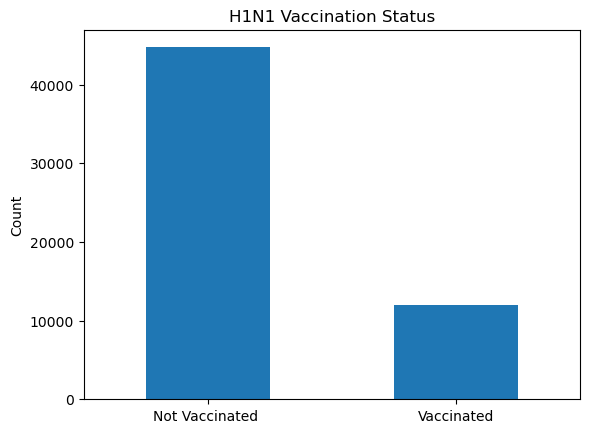

In [27]:
# Graph for relationship between H1N1 vaccination status
df.H1N1_TAKEN.value_counts().plot.bar()
plt.title('H1N1 Vaccination Status')
plt.ylabel('Count')
plt.xticks([0,1],['Not Vaccinated ', 'Vaccinated'], rotation = 0)
plt.show()

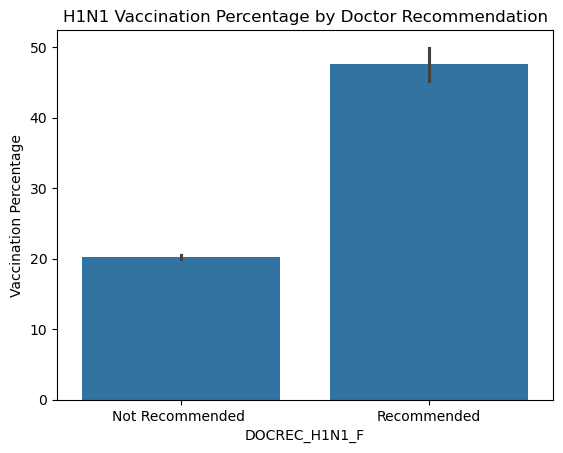

In [28]:
# Graph for relationship between H1N1 vaccination and Doctor recommendation
sns.barplot(x=df['DOCREC_H1N1_F'], y=df['H1N1_TAKEN']*100)
plt.title('H1N1 Vaccination Percentage by Doctor Recommendation')
plt.xticks([0,1],['Not Recommended ', 'Recommended'], rotation = 0)
plt.ylabel('Vaccination Percentage')
plt.show()

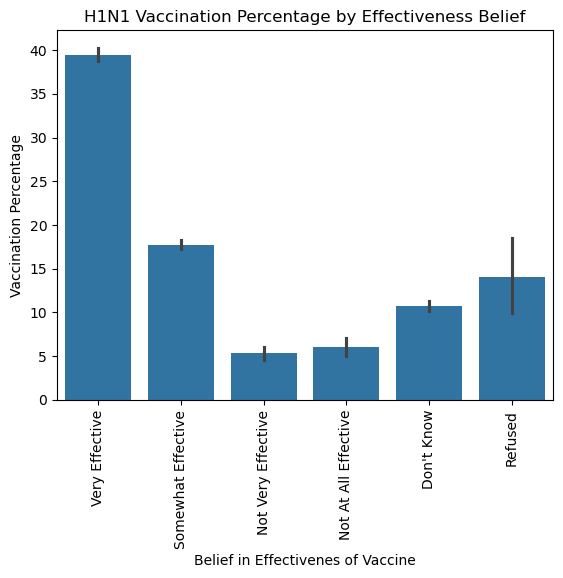

In [29]:
# Graph for vaccine percentage differrentiation depending on opinion of effectiveness of H1N1 Vaccine
sns.barplot(x=df['HQ23'], y=df['H1N1_TAKEN']*100)
plt.xlabel('Belief in Effectivenes of Vaccine')
plt.ylabel('Vaccination Percentage')
plt.title('H1N1 Vaccination Percentage by Effectiveness Belief')
plt.xticks([0,1,2,3,4,5],["Very Effective", "Somewhat Effective", "Not Very Effective", "Not At All Effective", "Don't Know", "Refused"], rotation = 90)

plt.show()


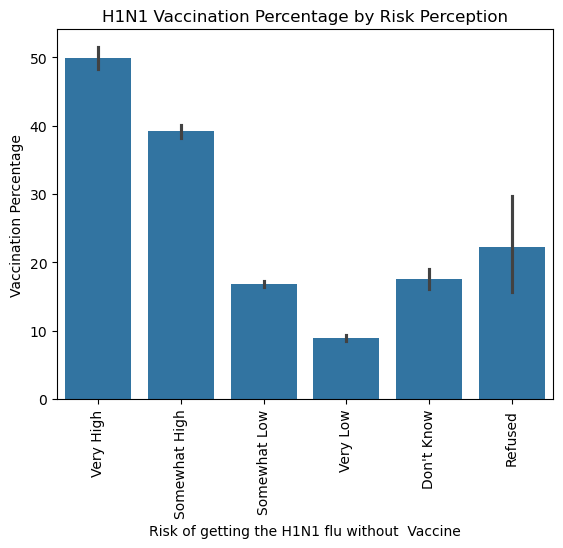

In [30]:
# Risk graph exploring vaccine percentage depending on risk perception of H1N1
sns.barplot(x=df['HQ24'], y=df['H1N1_TAKEN']*100)
plt.xlabel('Risk of getting the H1N1 flu without  Vaccine')
plt.ylabel('Vaccination Percentage')
plt.title('H1N1 Vaccination Percentage by Risk Perception')
plt.xticks([0,1,2,3,4,5],["Very High", "Somewhat High", "Somewhat Low", "Very Low", "Don't Know", "Refused"], rotation = 90)

plt.show()

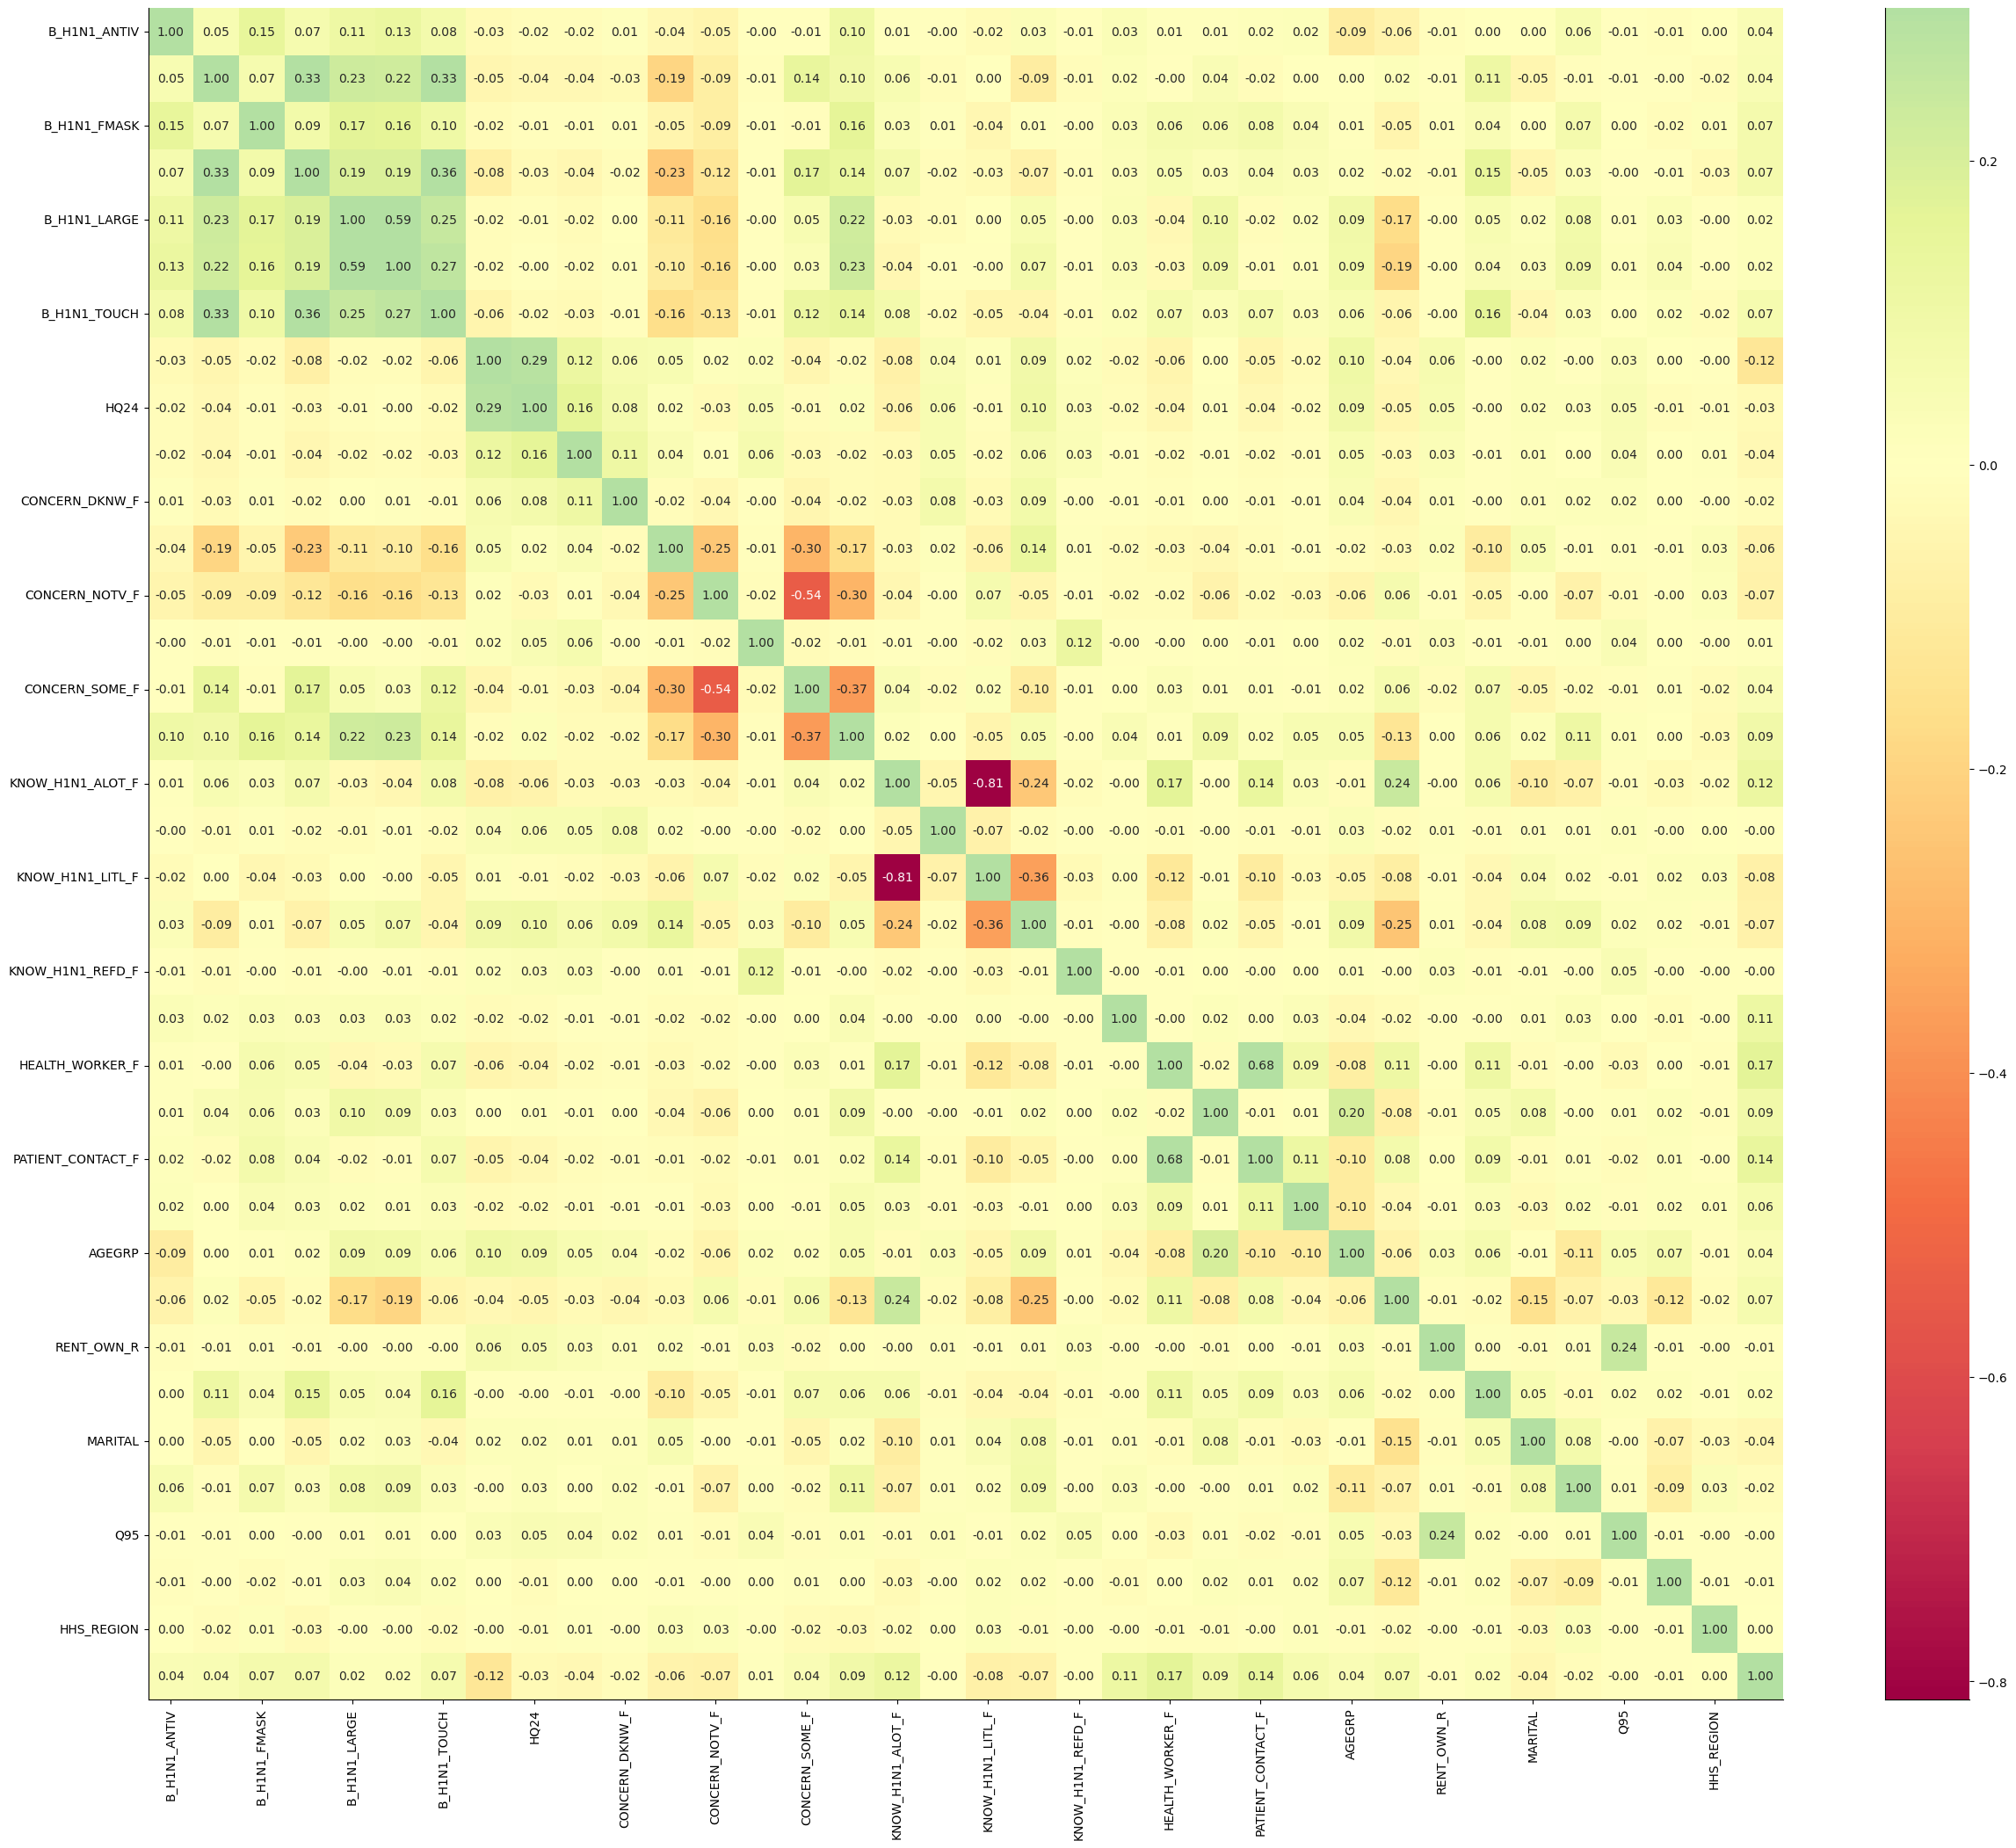

In [31]:
# Plotting Correlation Maps of the Features
g = sns.heatmap(df.corr(),  vmax=.3, center=0,  annot=True, fmt='.2f', cmap='Spectral')
sns.despine()
g.figure.set_size_inches(30,25)
plt.show()

# Data Preprocessing

In [32]:
X = df.drop(columns = ['H1N1_TAKEN'], axis=1)
y = df['H1N1_TAKEN']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
scaler= MinMaxScaler()  # Scaling the numbers by MinMaxScaler

In [35]:
X_train = scaler.fit_transform(X_train)

In [36]:
X_train.shape

(45324, 35)

In [37]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.010204,0.010204,0.010204,...,0.0,0.50,0.666667,0.0,1.0,1.0,1.0,0.0,1.0,0.888889
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.010204,0.010204,0.030612,...,0.0,0.50,1.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.444444
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.000000,1.000000,1.000000,...,0.0,0.75,1.000000,0.0,0.0,1.0,0.0,0.0,0.5,0.333333
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.010204,0.020408,0.020408,...,0.0,0.00,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.020408,0.020408,...,0.0,0.00,1.000000,0.0,0.0,1.0,0.0,0.0,0.5,0.777778


In [38]:
X_test = scaler.transform(X_test)

In [39]:
X_test.shape

(11332, 35)

In [40]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.010204,0.010204,0.010204,...,1.0,0.25,1.0,0.000000,1.0,0.0,0.5,0.0,0.0,0.444444
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.010204,0.030612,0.030612,...,0.0,1.00,1.0,0.000000,1.0,0.0,0.0,0.0,0.5,0.333333
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.020408,0.020408,...,0.0,0.50,1.0,0.000000,1.0,0.0,0.0,0.0,0.5,0.333333
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.775510,0.030612,0.020408,...,0.0,0.00,0.0,0.010204,0.0,0.0,0.0,0.0,0.5,0.333333
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.010204,0.030612,0.030612,...,0.0,0.50,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.777778


# Model evaluation

In [41]:
def evaluate(model, X_train, X_test, y_train, y_test):
    
    #  predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    x=round(accuracy_score(y_test, test_pred),4)
    
    print("Training Scores:")
    print("Train Accuracy --->",accuracy_score(y_train, train_pred))
    print("Train Precision --->",precision_score(y_train, train_pred))
    print("Train Recall --->",recall_score(y_train, train_pred))
    print("Train F1_Score --->",f1_score(y_train, train_pred))
    print("")
    
    print("Testing Scores:")
    print("Test Accuracy --->",accuracy_score(y_test, test_pred))
    print("Test Precision --->",precision_score(y_test, test_pred))
    print("Test Recall --->",recall_score(y_test, test_pred))
    print("Test F1_Score --->",f1_score(y_test, test_pred))
    
    return x



### MODEL 1: logistic regression

In [42]:
logreg = LogisticRegression(random_state=42)

# Fitting the logistic regression model on the training data
logreg.fit(X_train, y_train)

# Evaluating the logistic regression for various metrics
logreg_score=evaluate(logreg, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.7944135557320625
Train Precision ---> 0.5638921453692849
Train Recall ---> 0.10088087248322147
Train F1_Score ---> 0.1711439245685821

Testing Scores:
Test Accuracy ---> 0.796240734204024
Test Precision ---> 0.5921375921375921
Test Recall ---> 0.10109060402684564
Test F1_Score ---> 0.17269795772124685


### MODEL 2: Decision Tree Classifier

In [43]:
dtc = DecisionTreeClassifier()

# fitting the model to the training data
dtc.fit(X_train, y_train)

# Evaluating the decision tree model for various metrics
dtc_score=evaluate(dtc, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.9991615920924897
Train Precision ---> 1.0
Train Recall ---> 0.996015100671141
Train F1_Score ---> 0.9980035725543763

Testing Scores:
Test Accuracy ---> 0.7257324391104836
Test Precision ---> 0.3582615505090055
Test Recall ---> 0.3838087248322148
Test F1_Score ---> 0.370595382746051


### MODEL 3: Extra Tree Classifier 

In [44]:
ext =  ExtraTreeClassifier(random_state=42)

# fitting the  Extra Tree model to the training data
ext.fit(X_train, y_train)

# Evaluate the  Extra Tree  model for various metrics
ext_score=evaluate(ext, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.9991615920924897
Train Precision ---> 1.0
Train Recall ---> 0.996015100671141
Train F1_Score ---> 0.9980035725543763

Testing Scores:
Test Accuracy ---> 0.7214084009883516
Test Precision ---> 0.3374000841396719
Test Recall ---> 0.33640939597315433
Test F1_Score ---> 0.33690401176223483


### MODEL 4: Random Forest Classifier

In [45]:
rfc = RandomForestClassifier(random_state=42)

# Fitting the random forest model to the training data
rfc.fit(X_train, y_train)

# Evaluating various metrics of the random forest classifier
rfc_score=evaluate(rfc, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.9991174653605154
Train Precision ---> 0.9992639327024185
Train Recall ---> 0.9965394295302014
Train F1_Score ---> 0.9978998214848263

Testing Scores:
Test Accuracy ---> 0.812124955877162
Test Precision ---> 0.6217765042979942
Test Recall ---> 0.27307046979865773
Test F1_Score ---> 0.3794812008160886


### MODEL 5: Bernoulli Naive Bayes Classifier 

In [46]:
bnb = naive_bayes.BernoulliNB()

# fitting the  Bernoulli Naive Bayes model to the training data
bnb.fit(X_train, y_train)

# Evaluate the  Bernoulli Naive Bayes  model for various metrics
bnb_score=evaluate(bnb, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.7836686964963375
Train Precision ---> 0.48078296899557077
Train Recall ---> 0.352873322147651
Train F1_Score ---> 0.4070154218324766

Testing Scores:
Test Accuracy ---> 0.779562301447229
Test Precision ---> 0.46779661016949153
Test Recall ---> 0.34731543624161076
Test F1_Score ---> 0.3986519017814155


### MODEL 6: Gaussian Naive Bayes Classifier 

In [47]:
gnb = naive_bayes.GaussianNB()

# fitting the  Gaussian Naive Bayes model to the training data
gnb.fit(X_train, y_train)

# Evaluate the  Gaussian Naive Bayes  model for various metrics
gnb_score=evaluate(gnb, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.710285941223193
Train Precision ---> 0.3589864281791794
Train Recall ---> 0.4798657718120805
Train F1_Score ---> 0.4107166898532514

Testing Scores:
Test Accuracy ---> 0.7134662901517825
Test Precision ---> 0.3636650868878357
Test Recall ---> 0.4828020134228188
Test F1_Score ---> 0.41484952243647505


### MODEL 7: kNN Classifier

In [48]:
kNN = KNeighborsClassifier()

# Fitting the KNN model to the training data
kNN.fit(X_train, y_train)

# evaluating the KNN model for various metrics
kNN_score=evaluate(kNN, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8222795869737887
Train Precision ---> 0.6719294172277688
Train Recall ---> 0.3034815436241611
Train F1_Score ---> 0.41811746008813117

Testing Scores:
Test Accuracy ---> 0.7672079068125662
Test Precision ---> 0.3788167938931298
Test Recall ---> 0.16652684563758388
Test F1_Score ---> 0.23135198135198135


### MODEL 8: Gradient Boosting Classifier

In [49]:
gbc =  GradientBoostingClassifier(random_state=42)

# Fitting the gradient boosting classifier to the training data
gbc.fit(X_train, y_train)

# Evaluate the gradient boosting model for various metrics
gbc_score=evaluate(gbc, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8211102285764716
Train Precision ---> 0.6645161290322581
Train Recall ---> 0.3024328859060403
Train F1_Score ---> 0.4156817526664745

Testing Scores:
Test Accuracy ---> 0.817949170490646
Test Precision ---> 0.6442048517520216
Test Recall ---> 0.30075503355704697
Test F1_Score ---> 0.4100657706605662


### MODEL 9: XG Boosting Classifier

In [50]:
xg = xgb.XGBClassifier(random_state=42)

# fitting the xg boosting model to the training data
xg.fit(X_train, y_train)

# Evaluate the gradient boosting model for various metrics
xg_score=evaluate(xg, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8587723943164769
Train Precision ---> 0.7865106927435569
Train Recall ---> 0.45123741610738255
Train F1_Score ---> 0.5734657159992004

Testing Scores:
Test Accuracy ---> 0.8159195199435227
Test Precision ---> 0.6142638036809815
Test Recall ---> 0.33598993288590606
Test F1_Score ---> 0.4343817787418655


### MODEL 10: Cat Boosting Classifier

In [51]:
# Setting up the Cat Boosting model to go through the pipeline
cb = CatBoostClassifier()

# fitting the Cat Boosting  model to the training data
cb.fit(X_train, y_train)

Learning rate set to 0.052503
0:	learn: 0.6626502	total: 147ms	remaining: 2m 26s
1:	learn: 0.6356531	total: 154ms	remaining: 1m 16s
2:	learn: 0.6124511	total: 159ms	remaining: 53s
3:	learn: 0.5908749	total: 166ms	remaining: 41.3s
4:	learn: 0.5728137	total: 171ms	remaining: 34.1s
5:	learn: 0.5569954	total: 178ms	remaining: 29.5s
6:	learn: 0.5433869	total: 184ms	remaining: 26.1s
7:	learn: 0.5311204	total: 190ms	remaining: 23.6s
8:	learn: 0.5197012	total: 199ms	remaining: 21.9s
9:	learn: 0.5098084	total: 207ms	remaining: 20.5s
10:	learn: 0.5013545	total: 225ms	remaining: 20.2s
11:	learn: 0.4935456	total: 231ms	remaining: 19s
12:	learn: 0.4868956	total: 237ms	remaining: 18s
13:	learn: 0.4804550	total: 243ms	remaining: 17.1s
14:	learn: 0.4748008	total: 249ms	remaining: 16.3s
15:	learn: 0.4699803	total: 256ms	remaining: 15.7s
16:	learn: 0.4655456	total: 262ms	remaining: 15.1s
17:	learn: 0.4617714	total: 269ms	remaining: 14.7s
18:	learn: 0.4580374	total: 276ms	remaining: 14.2s
19:	learn: 0.45

172:	learn: 0.4054873	total: 1.37s	remaining: 6.56s
173:	learn: 0.4054203	total: 1.38s	remaining: 6.55s
174:	learn: 0.4052984	total: 1.39s	remaining: 6.54s
175:	learn: 0.4052147	total: 1.39s	remaining: 6.53s
176:	learn: 0.4051353	total: 1.4s	remaining: 6.51s
177:	learn: 0.4050031	total: 1.41s	remaining: 6.5s
178:	learn: 0.4048934	total: 1.41s	remaining: 6.49s
179:	learn: 0.4048283	total: 1.42s	remaining: 6.48s
180:	learn: 0.4047816	total: 1.43s	remaining: 6.46s
181:	learn: 0.4047149	total: 1.44s	remaining: 6.45s
182:	learn: 0.4046294	total: 1.44s	remaining: 6.44s
183:	learn: 0.4045702	total: 1.45s	remaining: 6.42s
184:	learn: 0.4044433	total: 1.46s	remaining: 6.43s
185:	learn: 0.4043603	total: 1.47s	remaining: 6.42s
186:	learn: 0.4043498	total: 1.47s	remaining: 6.4s
187:	learn: 0.4042342	total: 1.48s	remaining: 6.38s
188:	learn: 0.4041215	total: 1.49s	remaining: 6.37s
189:	learn: 0.4040320	total: 1.49s	remaining: 6.36s
190:	learn: 0.4039771	total: 1.5s	remaining: 6.35s
191:	learn: 0.40

344:	learn: 0.3915278	total: 2.59s	remaining: 4.92s
345:	learn: 0.3914617	total: 2.6s	remaining: 4.91s
346:	learn: 0.3913778	total: 2.61s	remaining: 4.91s
347:	learn: 0.3913228	total: 2.61s	remaining: 4.9s
348:	learn: 0.3912712	total: 2.62s	remaining: 4.89s
349:	learn: 0.3911659	total: 2.63s	remaining: 4.88s
350:	learn: 0.3910783	total: 2.63s	remaining: 4.87s
351:	learn: 0.3910393	total: 2.64s	remaining: 4.86s
352:	learn: 0.3909952	total: 2.65s	remaining: 4.85s
353:	learn: 0.3909203	total: 2.65s	remaining: 4.84s
354:	learn: 0.3908711	total: 2.66s	remaining: 4.83s
355:	learn: 0.3908137	total: 2.67s	remaining: 4.82s
356:	learn: 0.3907563	total: 2.67s	remaining: 4.82s
357:	learn: 0.3906691	total: 2.68s	remaining: 4.81s
358:	learn: 0.3906131	total: 2.69s	remaining: 4.8s
359:	learn: 0.3905313	total: 2.7s	remaining: 4.8s
360:	learn: 0.3904662	total: 2.71s	remaining: 4.79s
361:	learn: 0.3904153	total: 2.71s	remaining: 4.78s
362:	learn: 0.3903311	total: 2.72s	remaining: 4.77s
363:	learn: 0.390

523:	learn: 0.3804604	total: 3.84s	remaining: 3.49s
524:	learn: 0.3804094	total: 3.85s	remaining: 3.48s
525:	learn: 0.3803362	total: 3.86s	remaining: 3.48s
526:	learn: 0.3802658	total: 3.88s	remaining: 3.48s
527:	learn: 0.3801889	total: 3.89s	remaining: 3.48s
528:	learn: 0.3801275	total: 3.9s	remaining: 3.47s
529:	learn: 0.3800987	total: 3.9s	remaining: 3.46s
530:	learn: 0.3800557	total: 3.91s	remaining: 3.46s
531:	learn: 0.3800080	total: 3.92s	remaining: 3.45s
532:	learn: 0.3799682	total: 3.93s	remaining: 3.44s
533:	learn: 0.3799291	total: 3.94s	remaining: 3.44s
534:	learn: 0.3798848	total: 3.94s	remaining: 3.43s
535:	learn: 0.3798413	total: 3.95s	remaining: 3.42s
536:	learn: 0.3797686	total: 3.96s	remaining: 3.41s
537:	learn: 0.3797281	total: 3.96s	remaining: 3.4s
538:	learn: 0.3796928	total: 3.97s	remaining: 3.4s
539:	learn: 0.3796309	total: 3.98s	remaining: 3.39s
540:	learn: 0.3795921	total: 3.98s	remaining: 3.38s
541:	learn: 0.3795541	total: 3.99s	remaining: 3.37s
542:	learn: 0.37

693:	learn: 0.3715827	total: 5.09s	remaining: 2.25s
694:	learn: 0.3715216	total: 5.1s	remaining: 2.24s
695:	learn: 0.3714531	total: 5.11s	remaining: 2.23s
696:	learn: 0.3713939	total: 5.13s	remaining: 2.23s
697:	learn: 0.3713717	total: 5.14s	remaining: 2.22s
698:	learn: 0.3713036	total: 5.14s	remaining: 2.21s
699:	learn: 0.3712727	total: 5.15s	remaining: 2.21s
700:	learn: 0.3712028	total: 5.16s	remaining: 2.2s
701:	learn: 0.3711460	total: 5.16s	remaining: 2.19s
702:	learn: 0.3711015	total: 5.17s	remaining: 2.18s
703:	learn: 0.3710618	total: 5.17s	remaining: 2.17s
704:	learn: 0.3710112	total: 5.18s	remaining: 2.17s
705:	learn: 0.3709397	total: 5.19s	remaining: 2.16s
706:	learn: 0.3708763	total: 5.19s	remaining: 2.15s
707:	learn: 0.3708457	total: 5.2s	remaining: 2.15s
708:	learn: 0.3708053	total: 5.21s	remaining: 2.14s
709:	learn: 0.3707568	total: 5.21s	remaining: 2.13s
710:	learn: 0.3707117	total: 5.22s	remaining: 2.12s
711:	learn: 0.3706580	total: 5.23s	remaining: 2.11s
712:	learn: 0.3

873:	learn: 0.3627566	total: 6.31s	remaining: 910ms
874:	learn: 0.3627211	total: 6.32s	remaining: 903ms
875:	learn: 0.3626921	total: 6.33s	remaining: 896ms
876:	learn: 0.3626363	total: 6.34s	remaining: 889ms
877:	learn: 0.3625878	total: 6.35s	remaining: 882ms
878:	learn: 0.3625352	total: 6.35s	remaining: 875ms
879:	learn: 0.3624926	total: 6.36s	remaining: 867ms
880:	learn: 0.3624607	total: 6.37s	remaining: 860ms
881:	learn: 0.3624319	total: 6.38s	remaining: 853ms
882:	learn: 0.3623982	total: 6.38s	remaining: 846ms
883:	learn: 0.3623326	total: 6.39s	remaining: 839ms
884:	learn: 0.3622700	total: 6.4s	remaining: 831ms
885:	learn: 0.3622155	total: 6.4s	remaining: 824ms
886:	learn: 0.3621734	total: 6.41s	remaining: 817ms
887:	learn: 0.3621512	total: 6.42s	remaining: 809ms
888:	learn: 0.3621156	total: 6.42s	remaining: 802ms
889:	learn: 0.3620578	total: 6.43s	remaining: 795ms
890:	learn: 0.3620178	total: 6.43s	remaining: 787ms
891:	learn: 0.3619872	total: 6.44s	remaining: 780ms
892:	learn: 0.

In [52]:
# Evaluate the Cat Boosting model for various metrics
cb_score=evaluate(cb, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8508516459271026
Train Precision ---> 0.7756155679110405
Train Recall ---> 0.4096057046979866
Train F1_Score ---> 0.5360966236618172

Testing Scores:
Test Accuracy ---> 0.8214789975291211
Test Precision ---> 0.6512992455993294
Test Recall ---> 0.3259228187919463
Test F1_Score ---> 0.4344422700587084


## Comparison of Models Test Accuracy

In [53]:
print("Logistic regression:           ",logreg_score)
print("Decision tree classification:  ",dtc_score)
print("Extra tree classification:     ",ext_score)
print("Random forest classifier:      ",rfc_score)
print("Bernoulli Naive Bayes:         ",bnb_score)
print("Gaussian Naive Bayes:          ",gnb_score)
print("KNN classifier:                ",kNN_score)
print("Gradient boosting classifier:  ",gbc_score)
print("XGBoost Classifier:            ",xg_score)
print("CatBoost classifier:           ",cb_score)

Logistic regression:            0.7962
Decision tree classification:   0.7257
Extra tree classification:      0.7214
Random forest classifier:       0.8121
Bernoulli Naive Bayes:          0.7796
Gaussian Naive Bayes:           0.7135
KNN classifier:                 0.7672
Gradient boosting classifier:   0.8179
XGBoost Classifier:             0.8159
CatBoost classifier:            0.8215


## Comparison of Model ROC Curves

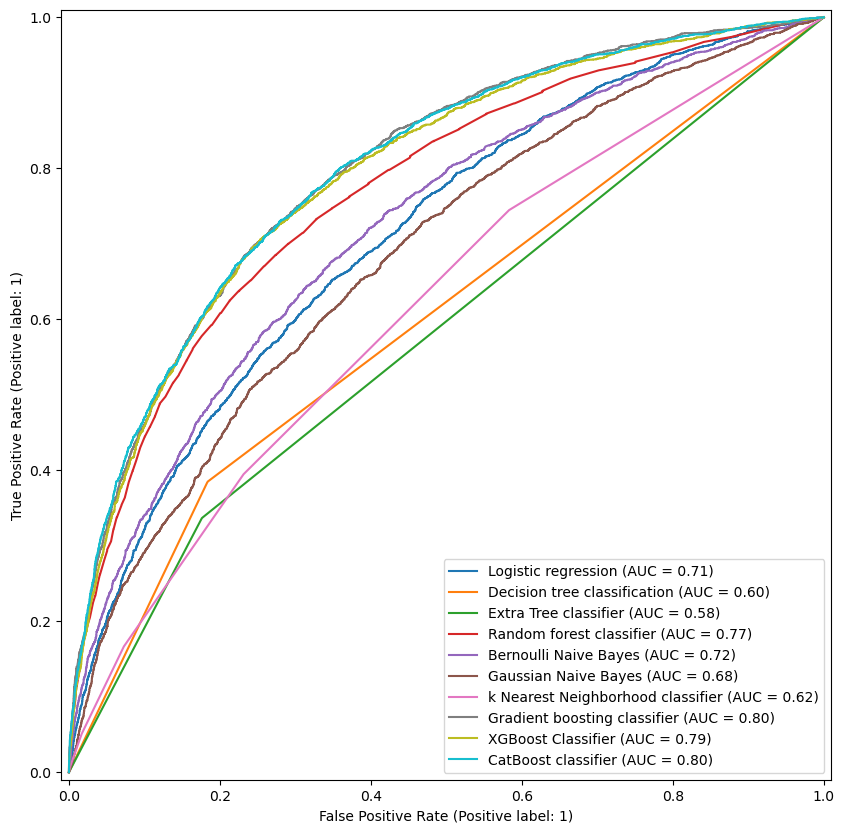

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))

RocCurveDisplay.from_estimator(logreg, X_test, y_test, name='Logistic regression', ax=ax)

RocCurveDisplay.from_estimator(dtc, X_test, y_test,name='Decision tree classification', ax=ax)

RocCurveDisplay.from_estimator(ext, X_test, y_test,name='Extra Tree classifier',ax=ax)

RocCurveDisplay.from_estimator(rfc, X_test, y_test, name='Random forest classifier', ax=ax)

RocCurveDisplay.from_estimator(bnb, X_test, y_test,name='Bernoulli Naive Bayes',ax=ax)

RocCurveDisplay.from_estimator(gnb, X_test, y_test,name='Gaussian Naive Bayes',ax=ax)

RocCurveDisplay.from_estimator(kNN, X_test, y_test, name='k Nearest Neighborhood classifier', ax=ax)

RocCurveDisplay.from_estimator(gbc, X_test, y_test, name='Gradient boosting classifier', ax=ax)

RocCurveDisplay.from_estimator(xg, X_test, y_test, name='XGBoost Classifier', ax=ax)

RocCurveDisplay.from_estimator(cb, X_test, y_test,name='CatBoost classifier',ax=ax)



plt.show()

## Hyperparameter Tuning using GridSearch CV

### MODEL 1: Logistic Regression

In [55]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'class_weight': ['balanced', None]
}

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, verbose=1)

# Fit the model to the data
grid_search_logreg = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [56]:
print("Best parameters:",grid_search_logreg.best_params_)
print("Best score found:", grid_search_logreg.best_score_)

Best parameters: {'C': 1.0, 'class_weight': None, 'solver': 'lbfgs'}
Best score found: 0.7941708213067438


In [57]:
# Fitting the logistic regression model on the training data
grid_search_logreg.best_estimator_.fit(X_train, y_train)

# Evaluating the logistic regression for various metrics
grid_search_logreg_score=evaluate(grid_search_logreg.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.7944135557320625
Train Precision ---> 0.5638921453692849
Train Recall ---> 0.10088087248322147
Train F1_Score ---> 0.1711439245685821

Testing Scores:
Test Accuracy ---> 0.796240734204024
Test Precision ---> 0.5921375921375921
Test Recall ---> 0.10109060402684564
Test F1_Score ---> 0.17269795772124685


### MODEL 2: Decision Tree Classifier

In [58]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "class_weight": ['balanced', None] 
}

# Create GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, verbose=1)

# Fit the model to the data
grid_search_dtc = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [59]:
print("Best parameters:",grid_search_dtc.best_params_)
print("Best score found:", grid_search_dtc.best_score_)

Best parameters: {'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score found: 0.8112478524961186


In [60]:
# Fitting the decision tree model on the training data
grid_search_dtc.best_estimator_.fit(X_train, y_train)

# Evaluating the decision tree for various metrics
grid_search_dtc_score=evaluate(grid_search_dtc.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8133659871149943
Train Precision ---> 0.6388244392884764
Train Recall ---> 0.2598573825503356
Train F1_Score ---> 0.36943719716734996

Testing Scores:
Test Accuracy ---> 0.8108012707377339
Test Precision ---> 0.6244813278008299
Test Recall ---> 0.2525167785234899
Test F1_Score ---> 0.35961768219832735


### MODEL 3: Extra Tree Classifier 

In [61]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create GridSearchCV object
grid_search = GridSearchCV(ext, param_grid, verbose=1)

# Fit the model to the data
grid_search_ext = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [62]:
print("Best parameters:",grid_search_ext.best_params_)
print("Best score found:", grid_search_ext.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score found: 0.7924056936054161


In [63]:
# Fitting the Extra Tree model on the training data
grid_search_ext.best_estimator_.fit(X_train, y_train)

# Evaluating the Extra Tree for various metrics
grid_search_ext_score=evaluate(grid_search_ext.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.7969729061865678
Train Precision ---> 0.5809893307468477
Train Recall ---> 0.1256291946308725
Train F1_Score ---> 0.20658734264528367

Testing Scores:
Test Accuracy ---> 0.7910342393222732
Test Precision ---> 0.5172413793103449
Test Recall ---> 0.10067114093959731
Test F1_Score ---> 0.16853932584269662


### MODEL 4: Random Forest Classifier

In [64]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}
# Create GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, verbose=1)

# Fit the model to the data
grid_search_rfc = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [65]:
print("Best parameters:",grid_search_rfc.best_params_)
print("Best score found:", grid_search_rfc.best_score_)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score found: 0.817822719507879


In [66]:
# Fitting the random forest on the training data
grid_search_rfc.best_estimator_.fit(X_train, y_train)

# Evaluating the random forest for various metrics
grid_search_rfc_score=evaluate(grid_search_rfc.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8946033006795516
Train Precision ---> 0.9635690629261641
Train Recall ---> 0.5186661073825504
Train F1_Score ---> 0.6743472629354421

Testing Scores:
Test Accuracy ---> 0.8161842569714084
Test Precision ---> 0.664841182913472
Test Recall ---> 0.25461409395973156
Test F1_Score ---> 0.3682135274491962


### MODEL 5: Bernoulli Naive Bayes Classifier 

In [67]:
param_grid = {
    'alpha': [0.0, 0.1, 0.5, 1.0],
    'fit_prior': [True, False],
}

# Create GridSearchCV object
grid_search = GridSearchCV(bnb, param_grid, verbose=1)

# Fit the model to the data
grid_search_bnb = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [68]:
print("Best parameters:",grid_search_bnb.best_params_)
print("Best score found:", grid_search_bnb.best_score_)

Best parameters: {'alpha': 0.5, 'fit_prior': True}
Best score found: 0.7843747447214854


In [69]:
# Fitting the Bernoulli Naive Bayes model on the training data
grid_search_bnb.best_estimator_.fit(X_train, y_train)

# Evaluating the Bernoulli Naive Bayes for various metrics
grid_search_bnb_score=evaluate(grid_search_bnb.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.7836686964963375
Train Precision ---> 0.4807884587916012
Train Recall ---> 0.35297818791946306
Train F1_Score ---> 0.4070871379331197

Testing Scores:
Test Accuracy ---> 0.779562301447229
Test Precision ---> 0.46779661016949153
Test Recall ---> 0.34731543624161076
Test F1_Score ---> 0.3986519017814155


### MODEL 6: Gaussian Naive Bayes Classifier 

Gaussian Naive Bayes doesn't have tunable hyperparameters like other models, so there is no need for a grid search.<br>
Gaussian Naive Bayes assumes that features are normally distributed.

### MODEL 7: kNN Classifier

In [70]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
# Create GridSearchCV object
grid_search = GridSearchCV(kNN, param_grid, verbose=1)

# Fit the model to the data
grid_search_kNN = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [71]:
print("Best parameters:",grid_search_kNN.best_params_)
print("Best score found:", grid_search_kNN.best_score_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best score found: 0.78298466405956


In [72]:
# Fitting the KNN model on the training data
grid_search_kNN.best_estimator_.fit(X_train, y_train)

# Evaluating the KNN for various metrics
grid_search_kNN_score=evaluate(grid_search_kNN.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8078942723501897
Train Precision ---> 0.645183887915937
Train Recall ---> 0.19316275167785235
Train F1_Score ---> 0.297312565571786

Testing Scores:
Test Accuracy ---> 0.7852100247087893
Test Precision ---> 0.46200607902735563
Test Recall ---> 0.12751677852348994
Test F1_Score ---> 0.19986850756081526


### MODEL 8: Gradient Boosting Classifier

In [73]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [None, 5, 10],

}

# Create GridSearchCV object
grid_search = GridSearchCV(gbc, param_grid, verbose=1)

# Fit the model to the data
grid_search_gbc = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [74]:
print("Best parameters:",grid_search_gbc.best_params_)
print("Best score found:", grid_search_gbc.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5}
Best score found: 0.819477506037839


In [75]:
# Fitting the gradient boosting classifier model on the training data
grid_search_gbc.best_estimator_.fit(X_train, y_train)

# Evaluating the gradient boosting classifier for various metrics
grid_search_gbc_score=evaluate(grid_search_gbc.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8316565175183126
Train Precision ---> 0.6979642708766098
Train Recall ---> 0.3523489932885906
Train F1_Score ---> 0.4682926829268293

Testing Scores:
Test Accuracy ---> 0.8172432050829509
Test Precision ---> 0.632514817950889
Test Recall ---> 0.31333892617449666
Test F1_Score ---> 0.4190743338008415


### MODEL 9: XG Boosting Classifier

In [76]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [None, 2,5],

}

# Create GridSearchCV object
grid_search = GridSearchCV(xg, param_grid, verbose=1)

# Fit the model to the data
grid_search_xg = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [77]:
print("Best parameters:",grid_search_xg.best_params_)
print("Best score found:", grid_search_xg.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5}
Best score found: 0.8198526139302837


In [78]:
# Fitting the xg boosting model on the training data
grid_search_xg.best_estimator_.fit(X_train, y_train)

# Evaluating the xg boosting for various metrics
grid_search_xg_score=evaluate(grid_search_xg.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8304871591209955
Train Precision ---> 0.6965005302226935
Train Recall ---> 0.34437919463087246
Train F1_Score ---> 0.4608799382499474

Testing Scores:
Test Accuracy ---> 0.8180374161666079
Test Precision ---> 0.6366723259762309
Test Recall ---> 0.3145973154362416
Test F1_Score ---> 0.4211117349803481


### MODEL 10: Cat Boosting Classifier

In [85]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [2, 5],
}
# Create GridSearchCV object
grid_search = GridSearchCV(cb, param_grid, verbose=1)

# Fit the model to the data
grid_search_cb = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0:	learn: 0.6875424	total: 4.9ms	remaining: 4.89s
1:	learn: 0.6820682	total: 8.62ms	remaining: 4.3s
2:	learn: 0.6767228	total: 11.8ms	remaining: 3.93s
3:	learn: 0.6717071	total: 15ms	remaining: 3.74s
4:	learn: 0.6665986	total: 18.3ms	remaining: 3.64s
5:	learn: 0.6620575	total: 21.3ms	remaining: 3.53s
6:	learn: 0.6571780	total: 24.5ms	remaining: 3.48s
7:	learn: 0.6524116	total: 27.5ms	remaining: 3.4s
8:	learn: 0.6477590	total: 30.6ms	remaining: 3.37s
9:	learn: 0.6432146	total: 33.9ms	remaining: 3.35s
10:	learn: 0.6391034	total: 37ms	remaining: 3.33s
11:	learn: 0.6347637	total: 40.2ms	remaining: 3.31s
12:	learn: 0.6305218	total: 43.4ms	remaining: 3.29s
13:	learn: 0.6266868	total: 46.6ms	remaining: 3.28s
14:	learn: 0.6226374	total: 49.7ms	remaining: 3.27s
15:	learn: 0.6186802	total: 52.8ms	remaining: 3.25s
16:	learn: 0.6151370	total: 55.8ms	remaining: 3.23s
17:	learn: 0.6113533	total: 58.8ms	remaining: 3.21s
18:	learn: 0.6076591	

182:	learn: 0.4489968	total: 615ms	remaining: 2.74s
183:	learn: 0.4488349	total: 619ms	remaining: 2.74s
184:	learn: 0.4486795	total: 623ms	remaining: 2.74s
185:	learn: 0.4485049	total: 627ms	remaining: 2.74s
186:	learn: 0.4483260	total: 631ms	remaining: 2.74s
187:	learn: 0.4481670	total: 634ms	remaining: 2.74s
188:	learn: 0.4480148	total: 638ms	remaining: 2.74s
189:	learn: 0.4478398	total: 641ms	remaining: 2.73s
190:	learn: 0.4477143	total: 644ms	remaining: 2.73s
191:	learn: 0.4475526	total: 648ms	remaining: 2.73s
192:	learn: 0.4474145	total: 651ms	remaining: 2.72s
193:	learn: 0.4472690	total: 654ms	remaining: 2.72s
194:	learn: 0.4471289	total: 657ms	remaining: 2.71s
195:	learn: 0.4470028	total: 660ms	remaining: 2.71s
196:	learn: 0.4468505	total: 663ms	remaining: 2.7s
197:	learn: 0.4467351	total: 666ms	remaining: 2.7s
198:	learn: 0.4465894	total: 669ms	remaining: 2.69s
199:	learn: 0.4464789	total: 672ms	remaining: 2.69s
200:	learn: 0.4463585	total: 675ms	remaining: 2.68s
201:	learn: 0.

364:	learn: 0.4350331	total: 1.22s	remaining: 2.12s
365:	learn: 0.4350002	total: 1.22s	remaining: 2.11s
366:	learn: 0.4349669	total: 1.22s	remaining: 2.11s
367:	learn: 0.4349357	total: 1.23s	remaining: 2.11s
368:	learn: 0.4348984	total: 1.23s	remaining: 2.11s
369:	learn: 0.4348618	total: 1.24s	remaining: 2.1s
370:	learn: 0.4348303	total: 1.24s	remaining: 2.1s
371:	learn: 0.4347959	total: 1.24s	remaining: 2.1s
372:	learn: 0.4347710	total: 1.25s	remaining: 2.09s
373:	learn: 0.4347363	total: 1.25s	remaining: 2.09s
374:	learn: 0.4346880	total: 1.25s	remaining: 2.09s
375:	learn: 0.4346192	total: 1.26s	remaining: 2.08s
376:	learn: 0.4345679	total: 1.26s	remaining: 2.08s
377:	learn: 0.4345286	total: 1.26s	remaining: 2.08s
378:	learn: 0.4344910	total: 1.27s	remaining: 2.08s
379:	learn: 0.4344451	total: 1.27s	remaining: 2.07s
380:	learn: 0.4344001	total: 1.27s	remaining: 2.07s
381:	learn: 0.4343716	total: 1.28s	remaining: 2.07s
382:	learn: 0.4343424	total: 1.28s	remaining: 2.06s
383:	learn: 0.4

551:	learn: 0.4296693	total: 1.83s	remaining: 1.49s
552:	learn: 0.4296467	total: 1.84s	remaining: 1.48s
553:	learn: 0.4296088	total: 1.84s	remaining: 1.48s
554:	learn: 0.4295897	total: 1.84s	remaining: 1.48s
555:	learn: 0.4295655	total: 1.86s	remaining: 1.49s
556:	learn: 0.4295483	total: 1.86s	remaining: 1.48s
557:	learn: 0.4295320	total: 1.87s	remaining: 1.48s
558:	learn: 0.4295157	total: 1.87s	remaining: 1.48s
559:	learn: 0.4294948	total: 1.88s	remaining: 1.48s
560:	learn: 0.4294583	total: 1.88s	remaining: 1.47s
561:	learn: 0.4294217	total: 1.89s	remaining: 1.47s
562:	learn: 0.4294095	total: 1.89s	remaining: 1.47s
563:	learn: 0.4293902	total: 1.9s	remaining: 1.47s
564:	learn: 0.4293658	total: 1.9s	remaining: 1.46s
565:	learn: 0.4293303	total: 1.91s	remaining: 1.46s
566:	learn: 0.4293173	total: 1.91s	remaining: 1.46s
567:	learn: 0.4293008	total: 1.91s	remaining: 1.46s
568:	learn: 0.4292789	total: 1.92s	remaining: 1.45s
569:	learn: 0.4292587	total: 1.92s	remaining: 1.45s
570:	learn: 0.

724:	learn: 0.4267671	total: 2.44s	remaining: 924ms
725:	learn: 0.4267548	total: 2.44s	remaining: 921ms
726:	learn: 0.4267445	total: 2.44s	remaining: 917ms
727:	learn: 0.4267333	total: 2.45s	remaining: 914ms
728:	learn: 0.4267173	total: 2.45s	remaining: 911ms
729:	learn: 0.4267080	total: 2.45s	remaining: 908ms
730:	learn: 0.4266915	total: 2.46s	remaining: 904ms
731:	learn: 0.4266745	total: 2.46s	remaining: 901ms
732:	learn: 0.4266608	total: 2.46s	remaining: 897ms
733:	learn: 0.4266473	total: 2.46s	remaining: 894ms
734:	learn: 0.4266233	total: 2.47s	remaining: 890ms
735:	learn: 0.4266095	total: 2.47s	remaining: 887ms
736:	learn: 0.4265969	total: 2.48s	remaining: 884ms
737:	learn: 0.4265871	total: 2.48s	remaining: 880ms
738:	learn: 0.4265786	total: 2.48s	remaining: 877ms
739:	learn: 0.4265672	total: 2.48s	remaining: 873ms
740:	learn: 0.4265514	total: 2.49s	remaining: 870ms
741:	learn: 0.4265383	total: 2.49s	remaining: 866ms
742:	learn: 0.4265252	total: 2.49s	remaining: 863ms
743:	learn: 

917:	learn: 0.4244514	total: 3.04s	remaining: 272ms
918:	learn: 0.4244408	total: 3.05s	remaining: 269ms
919:	learn: 0.4244240	total: 3.05s	remaining: 266ms
920:	learn: 0.4244075	total: 3.06s	remaining: 262ms
921:	learn: 0.4243922	total: 3.06s	remaining: 259ms
922:	learn: 0.4243761	total: 3.06s	remaining: 256ms
923:	learn: 0.4243675	total: 3.07s	remaining: 252ms
924:	learn: 0.4243577	total: 3.07s	remaining: 249ms
925:	learn: 0.4243481	total: 3.08s	remaining: 246ms
926:	learn: 0.4243398	total: 3.08s	remaining: 242ms
927:	learn: 0.4243313	total: 3.08s	remaining: 239ms
928:	learn: 0.4243229	total: 3.08s	remaining: 236ms
929:	learn: 0.4243132	total: 3.09s	remaining: 232ms
930:	learn: 0.4242975	total: 3.09s	remaining: 229ms
931:	learn: 0.4242898	total: 3.09s	remaining: 226ms
932:	learn: 0.4242800	total: 3.1s	remaining: 222ms
933:	learn: 0.4242721	total: 3.1s	remaining: 219ms
934:	learn: 0.4242568	total: 3.1s	remaining: 216ms
935:	learn: 0.4242456	total: 3.11s	remaining: 212ms
936:	learn: 0.4

111:	learn: 0.4692599	total: 407ms	remaining: 3.23s
112:	learn: 0.4687650	total: 411ms	remaining: 3.23s
113:	learn: 0.4682437	total: 415ms	remaining: 3.23s
114:	learn: 0.4677768	total: 419ms	remaining: 3.23s
115:	learn: 0.4672957	total: 423ms	remaining: 3.22s
116:	learn: 0.4668513	total: 428ms	remaining: 3.23s
117:	learn: 0.4664094	total: 432ms	remaining: 3.23s
118:	learn: 0.4660217	total: 437ms	remaining: 3.23s
119:	learn: 0.4655458	total: 441ms	remaining: 3.23s
120:	learn: 0.4650818	total: 444ms	remaining: 3.23s
121:	learn: 0.4647123	total: 448ms	remaining: 3.22s
122:	learn: 0.4643113	total: 451ms	remaining: 3.22s
123:	learn: 0.4639188	total: 455ms	remaining: 3.21s
124:	learn: 0.4635151	total: 458ms	remaining: 3.21s
125:	learn: 0.4631327	total: 462ms	remaining: 3.21s
126:	learn: 0.4627581	total: 466ms	remaining: 3.2s
127:	learn: 0.4623763	total: 470ms	remaining: 3.2s
128:	learn: 0.4620164	total: 473ms	remaining: 3.19s
129:	learn: 0.4616570	total: 477ms	remaining: 3.19s
130:	learn: 0.

287:	learn: 0.4387319	total: 1.01s	remaining: 2.51s
288:	learn: 0.4386829	total: 1.02s	remaining: 2.5s
289:	learn: 0.4386372	total: 1.02s	remaining: 2.5s
290:	learn: 0.4385627	total: 1.04s	remaining: 2.53s
291:	learn: 0.4384980	total: 1.04s	remaining: 2.53s
292:	learn: 0.4384476	total: 1.05s	remaining: 2.53s
293:	learn: 0.4383756	total: 1.05s	remaining: 2.53s
294:	learn: 0.4383248	total: 1.06s	remaining: 2.53s
295:	learn: 0.4382606	total: 1.06s	remaining: 2.52s
296:	learn: 0.4381983	total: 1.07s	remaining: 2.52s
297:	learn: 0.4381288	total: 1.07s	remaining: 2.52s
298:	learn: 0.4380796	total: 1.07s	remaining: 2.52s
299:	learn: 0.4380313	total: 1.08s	remaining: 2.51s
300:	learn: 0.4379876	total: 1.08s	remaining: 2.51s
301:	learn: 0.4379387	total: 1.08s	remaining: 2.5s
302:	learn: 0.4378885	total: 1.09s	remaining: 2.5s
303:	learn: 0.4378382	total: 1.09s	remaining: 2.49s
304:	learn: 0.4377970	total: 1.09s	remaining: 2.49s
305:	learn: 0.4377509	total: 1.1s	remaining: 2.48s
306:	learn: 0.437

472:	learn: 0.4319497	total: 1.64s	remaining: 1.82s
473:	learn: 0.4319252	total: 1.64s	remaining: 1.82s
474:	learn: 0.4319058	total: 1.65s	remaining: 1.82s
475:	learn: 0.4318891	total: 1.65s	remaining: 1.81s
476:	learn: 0.4318402	total: 1.65s	remaining: 1.81s
477:	learn: 0.4318099	total: 1.66s	remaining: 1.81s
478:	learn: 0.4317858	total: 1.66s	remaining: 1.81s
479:	learn: 0.4317655	total: 1.67s	remaining: 1.8s
480:	learn: 0.4317465	total: 1.67s	remaining: 1.8s
481:	learn: 0.4317193	total: 1.67s	remaining: 1.8s
482:	learn: 0.4317023	total: 1.67s	remaining: 1.79s
483:	learn: 0.4316810	total: 1.68s	remaining: 1.79s
484:	learn: 0.4316544	total: 1.68s	remaining: 1.78s
485:	learn: 0.4316294	total: 1.68s	remaining: 1.78s
486:	learn: 0.4316134	total: 1.69s	remaining: 1.78s
487:	learn: 0.4315936	total: 1.69s	remaining: 1.77s
488:	learn: 0.4315782	total: 1.7s	remaining: 1.77s
489:	learn: 0.4315572	total: 1.7s	remaining: 1.77s
490:	learn: 0.4315102	total: 1.7s	remaining: 1.76s
491:	learn: 0.4314

636:	learn: 0.4285405	total: 2.25s	remaining: 1.28s
637:	learn: 0.4285248	total: 2.25s	remaining: 1.28s
638:	learn: 0.4285108	total: 2.26s	remaining: 1.27s
639:	learn: 0.4284940	total: 2.26s	remaining: 1.27s
640:	learn: 0.4284776	total: 2.27s	remaining: 1.27s
641:	learn: 0.4284622	total: 2.27s	remaining: 1.26s
642:	learn: 0.4284469	total: 2.27s	remaining: 1.26s
643:	learn: 0.4284297	total: 2.28s	remaining: 1.26s
644:	learn: 0.4284146	total: 2.33s	remaining: 1.28s
645:	learn: 0.4283992	total: 2.33s	remaining: 1.28s
646:	learn: 0.4283868	total: 2.33s	remaining: 1.27s
647:	learn: 0.4283626	total: 2.34s	remaining: 1.27s
648:	learn: 0.4283455	total: 2.34s	remaining: 1.27s
649:	learn: 0.4283295	total: 2.35s	remaining: 1.26s
650:	learn: 0.4283193	total: 2.35s	remaining: 1.26s
651:	learn: 0.4283057	total: 2.35s	remaining: 1.26s
652:	learn: 0.4282950	total: 2.36s	remaining: 1.25s
653:	learn: 0.4282804	total: 2.36s	remaining: 1.25s
654:	learn: 0.4282608	total: 2.37s	remaining: 1.25s
655:	learn: 

855:	learn: 0.4256968	total: 3.05s	remaining: 514ms
856:	learn: 0.4256896	total: 3.06s	remaining: 510ms
857:	learn: 0.4256737	total: 3.06s	remaining: 507ms
858:	learn: 0.4256630	total: 3.07s	remaining: 504ms
859:	learn: 0.4256558	total: 3.07s	remaining: 500ms
860:	learn: 0.4256445	total: 3.07s	remaining: 496ms
861:	learn: 0.4256371	total: 3.08s	remaining: 493ms
862:	learn: 0.4256190	total: 3.08s	remaining: 489ms
863:	learn: 0.4256066	total: 3.08s	remaining: 486ms
864:	learn: 0.4255964	total: 3.09s	remaining: 482ms
865:	learn: 0.4255878	total: 3.09s	remaining: 478ms
866:	learn: 0.4255813	total: 3.09s	remaining: 475ms
867:	learn: 0.4255713	total: 3.1s	remaining: 471ms
868:	learn: 0.4255597	total: 3.1s	remaining: 467ms
869:	learn: 0.4255510	total: 3.1s	remaining: 464ms
870:	learn: 0.4255352	total: 3.11s	remaining: 460ms
871:	learn: 0.4255267	total: 3.11s	remaining: 457ms
872:	learn: 0.4255154	total: 3.11s	remaining: 453ms
873:	learn: 0.4255048	total: 3.12s	remaining: 449ms
874:	learn: 0.4

54:	learn: 0.5196052	total: 204ms	remaining: 3.51s
55:	learn: 0.5181773	total: 209ms	remaining: 3.52s
56:	learn: 0.5166152	total: 213ms	remaining: 3.52s
57:	learn: 0.5150998	total: 217ms	remaining: 3.53s
58:	learn: 0.5136052	total: 221ms	remaining: 3.53s
59:	learn: 0.5122234	total: 225ms	remaining: 3.53s
60:	learn: 0.5108840	total: 229ms	remaining: 3.53s
61:	learn: 0.5096493	total: 233ms	remaining: 3.53s
62:	learn: 0.5082844	total: 237ms	remaining: 3.52s
63:	learn: 0.5069475	total: 241ms	remaining: 3.52s
64:	learn: 0.5057515	total: 245ms	remaining: 3.52s
65:	learn: 0.5044649	total: 248ms	remaining: 3.52s
66:	learn: 0.5033013	total: 252ms	remaining: 3.5s
67:	learn: 0.5021400	total: 255ms	remaining: 3.5s
68:	learn: 0.5009307	total: 259ms	remaining: 3.5s
69:	learn: 0.4998043	total: 263ms	remaining: 3.49s
70:	learn: 0.4987012	total: 266ms	remaining: 3.48s
71:	learn: 0.4976316	total: 269ms	remaining: 3.47s
72:	learn: 0.4966255	total: 273ms	remaining: 3.47s
73:	learn: 0.4955314	total: 277ms	

221:	learn: 0.4426918	total: 811ms	remaining: 2.84s
222:	learn: 0.4426058	total: 814ms	remaining: 2.84s
223:	learn: 0.4424857	total: 818ms	remaining: 2.83s
224:	learn: 0.4423920	total: 821ms	remaining: 2.83s
225:	learn: 0.4422637	total: 825ms	remaining: 2.82s
226:	learn: 0.4421600	total: 829ms	remaining: 2.82s
227:	learn: 0.4420510	total: 833ms	remaining: 2.82s
228:	learn: 0.4419719	total: 837ms	remaining: 2.82s
229:	learn: 0.4418759	total: 842ms	remaining: 2.82s
230:	learn: 0.4417686	total: 845ms	remaining: 2.81s
231:	learn: 0.4416758	total: 849ms	remaining: 2.81s
232:	learn: 0.4415974	total: 853ms	remaining: 2.81s
233:	learn: 0.4415213	total: 858ms	remaining: 2.81s
234:	learn: 0.4414318	total: 862ms	remaining: 2.81s
235:	learn: 0.4413565	total: 866ms	remaining: 2.8s
236:	learn: 0.4412682	total: 871ms	remaining: 2.8s
237:	learn: 0.4411702	total: 875ms	remaining: 2.8s
238:	learn: 0.4410657	total: 878ms	remaining: 2.8s
239:	learn: 0.4409656	total: 882ms	remaining: 2.79s
240:	learn: 0.44

383:	learn: 0.4333837	total: 1.41s	remaining: 2.26s
384:	learn: 0.4333499	total: 1.41s	remaining: 2.26s
385:	learn: 0.4333199	total: 1.42s	remaining: 2.25s
386:	learn: 0.4332882	total: 1.42s	remaining: 2.25s
387:	learn: 0.4332590	total: 1.42s	remaining: 2.25s
388:	learn: 0.4332252	total: 1.43s	remaining: 2.24s
389:	learn: 0.4331808	total: 1.43s	remaining: 2.24s
390:	learn: 0.4331520	total: 1.44s	remaining: 2.24s
391:	learn: 0.4331105	total: 1.44s	remaining: 2.23s
392:	learn: 0.4330825	total: 1.44s	remaining: 2.23s
393:	learn: 0.4330544	total: 1.45s	remaining: 2.22s
394:	learn: 0.4330179	total: 1.45s	remaining: 2.22s
395:	learn: 0.4329800	total: 1.45s	remaining: 2.22s
396:	learn: 0.4329526	total: 1.46s	remaining: 2.21s
397:	learn: 0.4329238	total: 1.46s	remaining: 2.21s
398:	learn: 0.4328905	total: 1.46s	remaining: 2.2s
399:	learn: 0.4328585	total: 1.47s	remaining: 2.2s
400:	learn: 0.4328248	total: 1.47s	remaining: 2.19s
401:	learn: 0.4327886	total: 1.47s	remaining: 2.19s
402:	learn: 0.

558:	learn: 0.4288864	total: 2.02s	remaining: 1.6s
559:	learn: 0.4288497	total: 2.03s	remaining: 1.59s
560:	learn: 0.4288339	total: 2.03s	remaining: 1.59s
561:	learn: 0.4288164	total: 2.04s	remaining: 1.59s
562:	learn: 0.4288002	total: 2.04s	remaining: 1.58s
563:	learn: 0.4287789	total: 2.04s	remaining: 1.58s
564:	learn: 0.4287599	total: 2.05s	remaining: 1.58s
565:	learn: 0.4287475	total: 2.05s	remaining: 1.57s
566:	learn: 0.4287314	total: 2.06s	remaining: 1.57s
567:	learn: 0.4287160	total: 2.06s	remaining: 1.56s
568:	learn: 0.4287040	total: 2.06s	remaining: 1.56s
569:	learn: 0.4286858	total: 2.06s	remaining: 1.56s
570:	learn: 0.4286642	total: 2.07s	remaining: 1.55s
571:	learn: 0.4286466	total: 2.07s	remaining: 1.55s
572:	learn: 0.4286235	total: 2.07s	remaining: 1.54s
573:	learn: 0.4286095	total: 2.08s	remaining: 1.54s
574:	learn: 0.4285943	total: 2.08s	remaining: 1.54s
575:	learn: 0.4285791	total: 2.08s	remaining: 1.53s
576:	learn: 0.4285642	total: 2.09s	remaining: 1.53s
577:	learn: 0

722:	learn: 0.4263140	total: 2.63s	remaining: 1.01s
723:	learn: 0.4263015	total: 2.63s	remaining: 1s
724:	learn: 0.4262896	total: 2.63s	remaining: 999ms
725:	learn: 0.4262805	total: 2.64s	remaining: 996ms
726:	learn: 0.4262654	total: 2.64s	remaining: 992ms
727:	learn: 0.4262503	total: 2.65s	remaining: 989ms
728:	learn: 0.4262382	total: 2.65s	remaining: 986ms
729:	learn: 0.4262266	total: 2.66s	remaining: 983ms
730:	learn: 0.4262136	total: 2.66s	remaining: 980ms
731:	learn: 0.4262014	total: 2.67s	remaining: 976ms
732:	learn: 0.4261908	total: 2.67s	remaining: 973ms
733:	learn: 0.4261792	total: 2.67s	remaining: 969ms
734:	learn: 0.4261681	total: 2.68s	remaining: 965ms
735:	learn: 0.4261527	total: 2.68s	remaining: 961ms
736:	learn: 0.4261425	total: 2.68s	remaining: 957ms
737:	learn: 0.4261296	total: 2.69s	remaining: 954ms
738:	learn: 0.4261194	total: 2.69s	remaining: 950ms
739:	learn: 0.4261026	total: 2.69s	remaining: 946ms
740:	learn: 0.4260892	total: 2.7s	remaining: 943ms
741:	learn: 0.42

932:	learn: 0.4239653	total: 3.44s	remaining: 247ms
933:	learn: 0.4239578	total: 3.44s	remaining: 243ms
934:	learn: 0.4239478	total: 3.44s	remaining: 239ms
935:	learn: 0.4239410	total: 3.45s	remaining: 236ms
936:	learn: 0.4239336	total: 3.45s	remaining: 232ms
937:	learn: 0.4239270	total: 3.46s	remaining: 228ms
938:	learn: 0.4239202	total: 3.46s	remaining: 225ms
939:	learn: 0.4239112	total: 3.46s	remaining: 221ms
940:	learn: 0.4238960	total: 3.47s	remaining: 217ms
941:	learn: 0.4238880	total: 3.47s	remaining: 214ms
942:	learn: 0.4238801	total: 3.47s	remaining: 210ms
943:	learn: 0.4238732	total: 3.48s	remaining: 206ms
944:	learn: 0.4238654	total: 3.48s	remaining: 202ms
945:	learn: 0.4238564	total: 3.48s	remaining: 199ms
946:	learn: 0.4238440	total: 3.48s	remaining: 195ms
947:	learn: 0.4238362	total: 3.49s	remaining: 191ms
948:	learn: 0.4238276	total: 3.49s	remaining: 188ms
949:	learn: 0.4238133	total: 3.49s	remaining: 184ms
950:	learn: 0.4238057	total: 3.5s	remaining: 180ms
951:	learn: 0

106:	learn: 0.4712449	total: 411ms	remaining: 3.43s
107:	learn: 0.4707178	total: 416ms	remaining: 3.43s
108:	learn: 0.4701934	total: 419ms	remaining: 3.43s
109:	learn: 0.4696191	total: 423ms	remaining: 3.42s
110:	learn: 0.4691145	total: 428ms	remaining: 3.42s
111:	learn: 0.4685761	total: 431ms	remaining: 3.42s
112:	learn: 0.4681475	total: 434ms	remaining: 3.41s
113:	learn: 0.4676674	total: 438ms	remaining: 3.4s
114:	learn: 0.4671979	total: 441ms	remaining: 3.39s
115:	learn: 0.4666797	total: 444ms	remaining: 3.38s
116:	learn: 0.4662833	total: 448ms	remaining: 3.38s
117:	learn: 0.4657845	total: 451ms	remaining: 3.37s
118:	learn: 0.4654015	total: 454ms	remaining: 3.36s
119:	learn: 0.4649192	total: 457ms	remaining: 3.35s
120:	learn: 0.4645497	total: 461ms	remaining: 3.35s
121:	learn: 0.4641270	total: 464ms	remaining: 3.34s
122:	learn: 0.4637726	total: 467ms	remaining: 3.33s
123:	learn: 0.4633658	total: 470ms	remaining: 3.32s
124:	learn: 0.4629628	total: 474ms	remaining: 3.31s
125:	learn: 0

283:	learn: 0.4381324	total: 1.02s	remaining: 2.58s
284:	learn: 0.4380786	total: 1.02s	remaining: 2.57s
285:	learn: 0.4380343	total: 1.03s	remaining: 2.57s
286:	learn: 0.4379746	total: 1.03s	remaining: 2.57s
287:	learn: 0.4378956	total: 1.04s	remaining: 2.56s
288:	learn: 0.4378436	total: 1.04s	remaining: 2.56s
289:	learn: 0.4377955	total: 1.04s	remaining: 2.56s
290:	learn: 0.4377424	total: 1.05s	remaining: 2.55s
291:	learn: 0.4376794	total: 1.05s	remaining: 2.55s
292:	learn: 0.4376290	total: 1.05s	remaining: 2.54s
293:	learn: 0.4375547	total: 1.06s	remaining: 2.54s
294:	learn: 0.4374995	total: 1.06s	remaining: 2.54s
295:	learn: 0.4374284	total: 1.06s	remaining: 2.53s
296:	learn: 0.4373545	total: 1.07s	remaining: 2.53s
297:	learn: 0.4373055	total: 1.07s	remaining: 2.53s
298:	learn: 0.4372375	total: 1.07s	remaining: 2.52s
299:	learn: 0.4371668	total: 1.08s	remaining: 2.52s
300:	learn: 0.4371118	total: 1.08s	remaining: 2.51s
301:	learn: 0.4370607	total: 1.08s	remaining: 2.51s
302:	learn: 

458:	learn: 0.4312487	total: 1.63s	remaining: 1.92s
459:	learn: 0.4312216	total: 1.64s	remaining: 1.92s
460:	learn: 0.4311995	total: 1.64s	remaining: 1.92s
461:	learn: 0.4311818	total: 1.64s	remaining: 1.91s
462:	learn: 0.4311570	total: 1.65s	remaining: 1.91s
463:	learn: 0.4311330	total: 1.65s	remaining: 1.91s
464:	learn: 0.4311120	total: 1.65s	remaining: 1.9s
465:	learn: 0.4310822	total: 1.66s	remaining: 1.9s
466:	learn: 0.4310605	total: 1.66s	remaining: 1.9s
467:	learn: 0.4310250	total: 1.66s	remaining: 1.89s
468:	learn: 0.4310011	total: 1.67s	remaining: 1.89s
469:	learn: 0.4309776	total: 1.67s	remaining: 1.89s
470:	learn: 0.4309539	total: 1.68s	remaining: 1.88s
471:	learn: 0.4309301	total: 1.68s	remaining: 1.88s
472:	learn: 0.4308981	total: 1.68s	remaining: 1.88s
473:	learn: 0.4308815	total: 1.69s	remaining: 1.87s
474:	learn: 0.4308606	total: 1.69s	remaining: 1.87s
475:	learn: 0.4308337	total: 1.69s	remaining: 1.86s
476:	learn: 0.4308036	total: 1.7s	remaining: 1.86s
477:	learn: 0.43

640:	learn: 0.4274365	total: 2.23s	remaining: 1.25s
641:	learn: 0.4274143	total: 2.24s	remaining: 1.25s
642:	learn: 0.4273965	total: 2.24s	remaining: 1.24s
643:	learn: 0.4273862	total: 2.25s	remaining: 1.24s
644:	learn: 0.4273604	total: 2.25s	remaining: 1.24s
645:	learn: 0.4273478	total: 2.25s	remaining: 1.23s
646:	learn: 0.4273363	total: 2.25s	remaining: 1.23s
647:	learn: 0.4273173	total: 2.26s	remaining: 1.23s
648:	learn: 0.4273072	total: 2.26s	remaining: 1.22s
649:	learn: 0.4272912	total: 2.27s	remaining: 1.22s
650:	learn: 0.4272781	total: 2.27s	remaining: 1.22s
651:	learn: 0.4272612	total: 2.27s	remaining: 1.21s
652:	learn: 0.4272360	total: 2.27s	remaining: 1.21s
653:	learn: 0.4272237	total: 2.28s	remaining: 1.21s
654:	learn: 0.4272022	total: 2.28s	remaining: 1.2s
655:	learn: 0.4271724	total: 2.29s	remaining: 1.2s
656:	learn: 0.4271563	total: 2.29s	remaining: 1.2s
657:	learn: 0.4271417	total: 2.29s	remaining: 1.19s
658:	learn: 0.4271281	total: 2.29s	remaining: 1.19s
659:	learn: 0.4

825:	learn: 0.4248439	total: 2.84s	remaining: 598ms
826:	learn: 0.4248260	total: 2.84s	remaining: 595ms
827:	learn: 0.4248167	total: 2.85s	remaining: 591ms
828:	learn: 0.4248077	total: 2.85s	remaining: 588ms
829:	learn: 0.4247948	total: 2.85s	remaining: 585ms
830:	learn: 0.4247829	total: 2.86s	remaining: 581ms
831:	learn: 0.4247714	total: 2.86s	remaining: 578ms
832:	learn: 0.4247619	total: 2.86s	remaining: 574ms
833:	learn: 0.4247531	total: 2.87s	remaining: 571ms
834:	learn: 0.4247356	total: 2.87s	remaining: 567ms
835:	learn: 0.4247231	total: 2.87s	remaining: 564ms
836:	learn: 0.4247148	total: 2.88s	remaining: 560ms
837:	learn: 0.4247104	total: 2.88s	remaining: 557ms
838:	learn: 0.4247038	total: 2.88s	remaining: 553ms
839:	learn: 0.4246918	total: 2.89s	remaining: 550ms
840:	learn: 0.4246774	total: 2.89s	remaining: 546ms
841:	learn: 0.4246665	total: 2.89s	remaining: 543ms
842:	learn: 0.4246530	total: 2.9s	remaining: 539ms
843:	learn: 0.4246241	total: 2.9s	remaining: 536ms
844:	learn: 0.

0:	learn: 0.6875096	total: 4.33ms	remaining: 4.32s
1:	learn: 0.6820109	total: 7.83ms	remaining: 3.91s
2:	learn: 0.6766450	total: 10.9ms	remaining: 3.62s
3:	learn: 0.6713958	total: 14.1ms	remaining: 3.51s
4:	learn: 0.6662709	total: 17.4ms	remaining: 3.46s
5:	learn: 0.6612703	total: 20.7ms	remaining: 3.43s
6:	learn: 0.6563874	total: 24.1ms	remaining: 3.42s
7:	learn: 0.6519742	total: 27.6ms	remaining: 3.42s
8:	learn: 0.6473033	total: 30.9ms	remaining: 3.4s
9:	learn: 0.6427425	total: 34.3ms	remaining: 3.4s
10:	learn: 0.6382986	total: 37.7ms	remaining: 3.39s
11:	learn: 0.6339443	total: 40.8ms	remaining: 3.36s
12:	learn: 0.6297104	total: 44.2ms	remaining: 3.35s
13:	learn: 0.6255629	total: 47.8ms	remaining: 3.37s
14:	learn: 0.6218887	total: 51.7ms	remaining: 3.4s
15:	learn: 0.6179273	total: 55ms	remaining: 3.38s
16:	learn: 0.6140638	total: 58.4ms	remaining: 3.38s
17:	learn: 0.6102901	total: 61.8ms	remaining: 3.37s
18:	learn: 0.6066058	total: 65ms	remaining: 3.36s
19:	learn: 0.6030170	total: 6

194:	learn: 0.4462237	total: 817ms	remaining: 3.37s
195:	learn: 0.4461040	total: 820ms	remaining: 3.36s
196:	learn: 0.4459500	total: 823ms	remaining: 3.35s
197:	learn: 0.4458379	total: 826ms	remaining: 3.35s
198:	learn: 0.4456811	total: 831ms	remaining: 3.34s
199:	learn: 0.4455498	total: 834ms	remaining: 3.34s
200:	learn: 0.4454070	total: 838ms	remaining: 3.33s
201:	learn: 0.4452574	total: 842ms	remaining: 3.33s
202:	learn: 0.4451401	total: 847ms	remaining: 3.33s
203:	learn: 0.4450121	total: 852ms	remaining: 3.32s
204:	learn: 0.4448868	total: 856ms	remaining: 3.32s
205:	learn: 0.4447891	total: 859ms	remaining: 3.31s
206:	learn: 0.4446433	total: 863ms	remaining: 3.31s
207:	learn: 0.4445010	total: 866ms	remaining: 3.3s
208:	learn: 0.4443832	total: 869ms	remaining: 3.29s
209:	learn: 0.4442789	total: 872ms	remaining: 3.28s
210:	learn: 0.4441692	total: 876ms	remaining: 3.27s
211:	learn: 0.4440681	total: 879ms	remaining: 3.27s
212:	learn: 0.4439614	total: 882ms	remaining: 3.26s
213:	learn: 0

377:	learn: 0.4337083	total: 1.44s	remaining: 2.36s
378:	learn: 0.4336774	total: 1.44s	remaining: 2.36s
379:	learn: 0.4336477	total: 1.45s	remaining: 2.36s
380:	learn: 0.4336114	total: 1.45s	remaining: 2.35s
381:	learn: 0.4335659	total: 1.45s	remaining: 2.35s
382:	learn: 0.4335367	total: 1.46s	remaining: 2.35s
383:	learn: 0.4335012	total: 1.46s	remaining: 2.35s
384:	learn: 0.4334577	total: 1.47s	remaining: 2.34s
385:	learn: 0.4334206	total: 1.47s	remaining: 2.34s
386:	learn: 0.4333866	total: 1.47s	remaining: 2.33s
387:	learn: 0.4333617	total: 1.48s	remaining: 2.33s
388:	learn: 0.4333274	total: 1.48s	remaining: 2.32s
389:	learn: 0.4333043	total: 1.48s	remaining: 2.32s
390:	learn: 0.4332707	total: 1.49s	remaining: 2.31s
391:	learn: 0.4332347	total: 1.49s	remaining: 2.31s
392:	learn: 0.4331980	total: 1.49s	remaining: 2.3s
393:	learn: 0.4331692	total: 1.5s	remaining: 2.3s
394:	learn: 0.4331410	total: 1.5s	remaining: 2.29s
395:	learn: 0.4331095	total: 1.5s	remaining: 2.29s
396:	learn: 0.433

557:	learn: 0.4287859	total: 2.04s	remaining: 1.61s
558:	learn: 0.4287635	total: 2.04s	remaining: 1.61s
559:	learn: 0.4287479	total: 2.04s	remaining: 1.6s
560:	learn: 0.4287263	total: 2.05s	remaining: 1.6s
561:	learn: 0.4287127	total: 2.05s	remaining: 1.6s
562:	learn: 0.4286808	total: 2.05s	remaining: 1.59s
563:	learn: 0.4286665	total: 2.06s	remaining: 1.59s
564:	learn: 0.4286546	total: 2.06s	remaining: 1.59s
565:	learn: 0.4286332	total: 2.06s	remaining: 1.58s
566:	learn: 0.4286183	total: 2.07s	remaining: 1.58s
567:	learn: 0.4285963	total: 2.07s	remaining: 1.57s
568:	learn: 0.4285779	total: 2.07s	remaining: 1.57s
569:	learn: 0.4285595	total: 2.08s	remaining: 1.57s
570:	learn: 0.4285380	total: 2.08s	remaining: 1.56s
571:	learn: 0.4285201	total: 2.08s	remaining: 1.56s
572:	learn: 0.4285024	total: 2.08s	remaining: 1.55s
573:	learn: 0.4284874	total: 2.09s	remaining: 1.55s
574:	learn: 0.4284659	total: 2.09s	remaining: 1.55s
575:	learn: 0.4284517	total: 2.1s	remaining: 1.54s
576:	learn: 0.42

729:	learn: 0.4259953	total: 2.64s	remaining: 975ms
730:	learn: 0.4259819	total: 2.64s	remaining: 972ms
731:	learn: 0.4259702	total: 2.65s	remaining: 969ms
732:	learn: 0.4259613	total: 2.65s	remaining: 965ms
733:	learn: 0.4259530	total: 2.65s	remaining: 962ms
734:	learn: 0.4259410	total: 2.66s	remaining: 958ms
735:	learn: 0.4259259	total: 2.66s	remaining: 954ms
736:	learn: 0.4259035	total: 2.66s	remaining: 951ms
737:	learn: 0.4258921	total: 2.67s	remaining: 947ms
738:	learn: 0.4258789	total: 2.67s	remaining: 943ms
739:	learn: 0.4258680	total: 2.67s	remaining: 939ms
740:	learn: 0.4258560	total: 2.68s	remaining: 936ms
741:	learn: 0.4258398	total: 2.68s	remaining: 932ms
742:	learn: 0.4258320	total: 2.68s	remaining: 928ms
743:	learn: 0.4258201	total: 2.69s	remaining: 924ms
744:	learn: 0.4258096	total: 2.69s	remaining: 920ms
745:	learn: 0.4258009	total: 2.69s	remaining: 917ms
746:	learn: 0.4257851	total: 2.69s	remaining: 913ms
747:	learn: 0.4257576	total: 2.7s	remaining: 909ms
748:	learn: 0

892:	learn: 0.4241429	total: 3.24s	remaining: 389ms
893:	learn: 0.4241347	total: 3.25s	remaining: 385ms
894:	learn: 0.4241272	total: 3.25s	remaining: 382ms
895:	learn: 0.4241162	total: 3.26s	remaining: 378ms
896:	learn: 0.4241086	total: 3.26s	remaining: 375ms
897:	learn: 0.4240984	total: 3.27s	remaining: 371ms
898:	learn: 0.4240822	total: 3.27s	remaining: 368ms
899:	learn: 0.4240726	total: 3.27s	remaining: 364ms
900:	learn: 0.4240629	total: 3.28s	remaining: 360ms
901:	learn: 0.4240535	total: 3.28s	remaining: 357ms
902:	learn: 0.4240428	total: 3.29s	remaining: 353ms
903:	learn: 0.4240342	total: 3.29s	remaining: 349ms
904:	learn: 0.4240255	total: 3.29s	remaining: 346ms
905:	learn: 0.4240098	total: 3.3s	remaining: 342ms
906:	learn: 0.4240021	total: 3.3s	remaining: 339ms
907:	learn: 0.4239943	total: 3.31s	remaining: 335ms
908:	learn: 0.4239786	total: 3.31s	remaining: 331ms
909:	learn: 0.4239696	total: 3.31s	remaining: 328ms
910:	learn: 0.4239602	total: 3.32s	remaining: 324ms
911:	learn: 0.

100:	learn: 0.4232210	total: 394ms	remaining: 3.51s
101:	learn: 0.4231452	total: 398ms	remaining: 3.5s
102:	learn: 0.4230472	total: 401ms	remaining: 3.49s
103:	learn: 0.4229564	total: 404ms	remaining: 3.48s
104:	learn: 0.4228686	total: 407ms	remaining: 3.47s
105:	learn: 0.4227971	total: 410ms	remaining: 3.46s
106:	learn: 0.4227251	total: 414ms	remaining: 3.45s
107:	learn: 0.4226552	total: 417ms	remaining: 3.44s
108:	learn: 0.4225822	total: 420ms	remaining: 3.43s
109:	learn: 0.4224662	total: 424ms	remaining: 3.43s
110:	learn: 0.4223915	total: 427ms	remaining: 3.42s
111:	learn: 0.4223104	total: 430ms	remaining: 3.41s
112:	learn: 0.4220939	total: 434ms	remaining: 3.4s
113:	learn: 0.4220218	total: 438ms	remaining: 3.4s
114:	learn: 0.4219431	total: 441ms	remaining: 3.39s
115:	learn: 0.4218870	total: 444ms	remaining: 3.38s
116:	learn: 0.4217967	total: 447ms	remaining: 3.37s
117:	learn: 0.4217004	total: 450ms	remaining: 3.36s
118:	learn: 0.4216229	total: 453ms	remaining: 3.35s
119:	learn: 0.4

264:	learn: 0.4154861	total: 995ms	remaining: 2.76s
265:	learn: 0.4154657	total: 999ms	remaining: 2.76s
266:	learn: 0.4154339	total: 1s	remaining: 2.75s
267:	learn: 0.4154098	total: 1s	remaining: 2.75s
268:	learn: 0.4153923	total: 1.01s	remaining: 2.74s
269:	learn: 0.4153720	total: 1.01s	remaining: 2.73s
270:	learn: 0.4153499	total: 1.01s	remaining: 2.73s
271:	learn: 0.4153017	total: 1.02s	remaining: 2.72s
272:	learn: 0.4152794	total: 1.02s	remaining: 2.72s
273:	learn: 0.4152626	total: 1.02s	remaining: 2.71s
274:	learn: 0.4152460	total: 1.03s	remaining: 2.71s
275:	learn: 0.4152300	total: 1.03s	remaining: 2.7s
276:	learn: 0.4152017	total: 1.03s	remaining: 2.7s
277:	learn: 0.4151622	total: 1.04s	remaining: 2.69s
278:	learn: 0.4151239	total: 1.04s	remaining: 2.69s
279:	learn: 0.4151079	total: 1.04s	remaining: 2.68s
280:	learn: 0.4150832	total: 1.05s	remaining: 2.68s
281:	learn: 0.4150177	total: 1.05s	remaining: 2.67s
282:	learn: 0.4149857	total: 1.05s	remaining: 2.67s
283:	learn: 0.414965

441:	learn: 0.4121814	total: 1.6s	remaining: 2.02s
442:	learn: 0.4121627	total: 1.61s	remaining: 2.02s
443:	learn: 0.4121499	total: 1.61s	remaining: 2.02s
444:	learn: 0.4121367	total: 1.61s	remaining: 2.01s
445:	learn: 0.4121150	total: 1.62s	remaining: 2.01s
446:	learn: 0.4121081	total: 1.62s	remaining: 2.01s
447:	learn: 0.4120988	total: 1.63s	remaining: 2s
448:	learn: 0.4120917	total: 1.63s	remaining: 2s
449:	learn: 0.4120805	total: 1.63s	remaining: 2s
450:	learn: 0.4120687	total: 1.64s	remaining: 1.99s
451:	learn: 0.4120613	total: 1.64s	remaining: 1.99s
452:	learn: 0.4120491	total: 1.64s	remaining: 1.98s
453:	learn: 0.4120264	total: 1.65s	remaining: 1.98s
454:	learn: 0.4120183	total: 1.65s	remaining: 1.98s
455:	learn: 0.4119989	total: 1.65s	remaining: 1.97s
456:	learn: 0.4119875	total: 1.66s	remaining: 1.97s
457:	learn: 0.4119806	total: 1.66s	remaining: 1.97s
458:	learn: 0.4119697	total: 1.66s	remaining: 1.96s
459:	learn: 0.4119539	total: 1.67s	remaining: 1.96s
460:	learn: 0.4119304	

608:	learn: 0.4101642	total: 2.23s	remaining: 1.43s
609:	learn: 0.4101578	total: 2.24s	remaining: 1.43s
610:	learn: 0.4101492	total: 2.24s	remaining: 1.43s
611:	learn: 0.4101418	total: 2.25s	remaining: 1.43s
612:	learn: 0.4101349	total: 2.25s	remaining: 1.42s
613:	learn: 0.4101262	total: 2.26s	remaining: 1.42s
614:	learn: 0.4101138	total: 2.26s	remaining: 1.42s
615:	learn: 0.4100967	total: 2.27s	remaining: 1.41s
616:	learn: 0.4100885	total: 2.27s	remaining: 1.41s
617:	learn: 0.4100837	total: 2.27s	remaining: 1.41s
618:	learn: 0.4100671	total: 2.28s	remaining: 1.4s
619:	learn: 0.4100573	total: 2.28s	remaining: 1.4s
620:	learn: 0.4100476	total: 2.29s	remaining: 1.4s
621:	learn: 0.4100422	total: 2.29s	remaining: 1.39s
622:	learn: 0.4100342	total: 2.3s	remaining: 1.39s
623:	learn: 0.4100293	total: 2.3s	remaining: 1.39s
624:	learn: 0.4100119	total: 2.31s	remaining: 1.38s
625:	learn: 0.4100057	total: 2.31s	remaining: 1.38s
626:	learn: 0.4099997	total: 2.31s	remaining: 1.38s
627:	learn: 0.409

782:	learn: 0.4085348	total: 2.84s	remaining: 787ms
783:	learn: 0.4085287	total: 2.84s	remaining: 784ms
784:	learn: 0.4085219	total: 2.85s	remaining: 781ms
785:	learn: 0.4085166	total: 2.85s	remaining: 777ms
786:	learn: 0.4085102	total: 2.86s	remaining: 774ms
787:	learn: 0.4085056	total: 2.86s	remaining: 770ms
788:	learn: 0.4085001	total: 2.87s	remaining: 767ms
789:	learn: 0.4084901	total: 2.87s	remaining: 763ms
790:	learn: 0.4084830	total: 2.88s	remaining: 760ms
791:	learn: 0.4084772	total: 2.88s	remaining: 756ms
792:	learn: 0.4084637	total: 2.88s	remaining: 752ms
793:	learn: 0.4084522	total: 2.89s	remaining: 749ms
794:	learn: 0.4084215	total: 2.89s	remaining: 745ms
795:	learn: 0.4084100	total: 2.89s	remaining: 742ms
796:	learn: 0.4084052	total: 2.9s	remaining: 738ms
797:	learn: 0.4083803	total: 2.9s	remaining: 735ms
798:	learn: 0.4083716	total: 2.9s	remaining: 731ms
799:	learn: 0.4083644	total: 2.91s	remaining: 727ms
800:	learn: 0.4083548	total: 2.91s	remaining: 724ms
801:	learn: 0.4

997:	learn: 0.4070948	total: 3.65s	remaining: 7.3ms
998:	learn: 0.4070900	total: 3.65s	remaining: 3.65ms
999:	learn: 0.4070841	total: 3.65s	remaining: 0us
0:	learn: 0.6402947	total: 4.53ms	remaining: 4.52s
1:	learn: 0.5991562	total: 8.27ms	remaining: 4.13s
2:	learn: 0.5671611	total: 11.8ms	remaining: 3.93s
3:	learn: 0.5436945	total: 15ms	remaining: 3.73s
4:	learn: 0.5249900	total: 19.1ms	remaining: 3.79s
5:	learn: 0.5102279	total: 24.4ms	remaining: 4.04s
6:	learn: 0.4981097	total: 27.6ms	remaining: 3.92s
7:	learn: 0.4886594	total: 31ms	remaining: 3.84s
8:	learn: 0.4796178	total: 35.1ms	remaining: 3.86s
9:	learn: 0.4725493	total: 39.4ms	remaining: 3.9s
10:	learn: 0.4680658	total: 42.7ms	remaining: 3.84s
11:	learn: 0.4634854	total: 46.2ms	remaining: 3.8s
12:	learn: 0.4592496	total: 49.6ms	remaining: 3.77s
13:	learn: 0.4561420	total: 54.8ms	remaining: 3.86s
14:	learn: 0.4534852	total: 58.2ms	remaining: 3.82s
15:	learn: 0.4513598	total: 61.5ms	remaining: 3.79s
16:	learn: 0.4496920	total: 6

167:	learn: 0.4195953	total: 621ms	remaining: 3.08s
168:	learn: 0.4195606	total: 625ms	remaining: 3.07s
169:	learn: 0.4195269	total: 629ms	remaining: 3.07s
170:	learn: 0.4194981	total: 633ms	remaining: 3.07s
171:	learn: 0.4194542	total: 636ms	remaining: 3.06s
172:	learn: 0.4193972	total: 639ms	remaining: 3.05s
173:	learn: 0.4193299	total: 642ms	remaining: 3.04s
174:	learn: 0.4192854	total: 645ms	remaining: 3.04s
175:	learn: 0.4192395	total: 648ms	remaining: 3.03s
176:	learn: 0.4191689	total: 651ms	remaining: 3.02s
177:	learn: 0.4191306	total: 654ms	remaining: 3.02s
178:	learn: 0.4191031	total: 657ms	remaining: 3.01s
179:	learn: 0.4189411	total: 661ms	remaining: 3.01s
180:	learn: 0.4189121	total: 665ms	remaining: 3.01s
181:	learn: 0.4188809	total: 668ms	remaining: 3s
182:	learn: 0.4188248	total: 673ms	remaining: 3s
183:	learn: 0.4187779	total: 678ms	remaining: 3s
184:	learn: 0.4187379	total: 685ms	remaining: 3.02s
185:	learn: 0.4187066	total: 692ms	remaining: 3.03s
186:	learn: 0.4186724

326:	learn: 0.4147930	total: 1.22s	remaining: 2.51s
327:	learn: 0.4147630	total: 1.23s	remaining: 2.51s
328:	learn: 0.4147351	total: 1.23s	remaining: 2.51s
329:	learn: 0.4147139	total: 1.23s	remaining: 2.5s
330:	learn: 0.4146946	total: 1.24s	remaining: 2.5s
331:	learn: 0.4146745	total: 1.24s	remaining: 2.5s
332:	learn: 0.4146555	total: 1.24s	remaining: 2.49s
333:	learn: 0.4146312	total: 1.25s	remaining: 2.49s
334:	learn: 0.4146196	total: 1.25s	remaining: 2.48s
335:	learn: 0.4146069	total: 1.25s	remaining: 2.48s
336:	learn: 0.4145934	total: 1.26s	remaining: 2.48s
337:	learn: 0.4145784	total: 1.26s	remaining: 2.47s
338:	learn: 0.4145510	total: 1.26s	remaining: 2.47s
339:	learn: 0.4145257	total: 1.27s	remaining: 2.46s
340:	learn: 0.4144947	total: 1.27s	remaining: 2.46s
341:	learn: 0.4144804	total: 1.28s	remaining: 2.46s
342:	learn: 0.4144607	total: 1.28s	remaining: 2.45s
343:	learn: 0.4144421	total: 1.28s	remaining: 2.44s
344:	learn: 0.4144157	total: 1.29s	remaining: 2.44s
345:	learn: 0.4

492:	learn: 0.4121027	total: 1.82s	remaining: 1.87s
493:	learn: 0.4120881	total: 1.82s	remaining: 1.86s
494:	learn: 0.4120745	total: 1.82s	remaining: 1.86s
495:	learn: 0.4120629	total: 1.83s	remaining: 1.86s
496:	learn: 0.4120549	total: 1.83s	remaining: 1.85s
497:	learn: 0.4120459	total: 1.83s	remaining: 1.85s
498:	learn: 0.4120343	total: 1.84s	remaining: 1.85s
499:	learn: 0.4120185	total: 1.84s	remaining: 1.84s
500:	learn: 0.4120067	total: 1.85s	remaining: 1.84s
501:	learn: 0.4119945	total: 1.85s	remaining: 1.83s
502:	learn: 0.4119896	total: 1.85s	remaining: 1.83s
503:	learn: 0.4119827	total: 1.86s	remaining: 1.83s
504:	learn: 0.4119668	total: 1.86s	remaining: 1.82s
505:	learn: 0.4119566	total: 1.86s	remaining: 1.82s
506:	learn: 0.4119445	total: 1.87s	remaining: 1.82s
507:	learn: 0.4119293	total: 1.87s	remaining: 1.81s
508:	learn: 0.4119203	total: 1.87s	remaining: 1.81s
509:	learn: 0.4119111	total: 1.88s	remaining: 1.8s
510:	learn: 0.4119033	total: 1.88s	remaining: 1.8s
511:	learn: 0.

652:	learn: 0.4100812	total: 2.42s	remaining: 1.29s
653:	learn: 0.4100720	total: 2.43s	remaining: 1.29s
654:	learn: 0.4100594	total: 2.44s	remaining: 1.28s
655:	learn: 0.4100523	total: 2.45s	remaining: 1.28s
656:	learn: 0.4100495	total: 2.46s	remaining: 1.28s
657:	learn: 0.4100378	total: 2.46s	remaining: 1.28s
658:	learn: 0.4100299	total: 2.47s	remaining: 1.28s
659:	learn: 0.4100223	total: 2.48s	remaining: 1.27s
660:	learn: 0.4100126	total: 2.48s	remaining: 1.27s
661:	learn: 0.4100033	total: 2.49s	remaining: 1.27s
662:	learn: 0.4099838	total: 2.49s	remaining: 1.27s
663:	learn: 0.4099724	total: 2.5s	remaining: 1.26s
664:	learn: 0.4099661	total: 2.51s	remaining: 1.26s
665:	learn: 0.4099611	total: 2.51s	remaining: 1.26s
666:	learn: 0.4099554	total: 2.52s	remaining: 1.26s
667:	learn: 0.4099447	total: 2.52s	remaining: 1.25s
668:	learn: 0.4099189	total: 2.53s	remaining: 1.25s
669:	learn: 0.4099064	total: 2.53s	remaining: 1.25s
670:	learn: 0.4098998	total: 2.54s	remaining: 1.24s
671:	learn: 0

829:	learn: 0.4085725	total: 3.24s	remaining: 663ms
830:	learn: 0.4085654	total: 3.25s	remaining: 660ms
831:	learn: 0.4085578	total: 3.25s	remaining: 657ms
832:	learn: 0.4085539	total: 3.26s	remaining: 654ms
833:	learn: 0.4085258	total: 3.27s	remaining: 650ms
834:	learn: 0.4085205	total: 3.27s	remaining: 647ms
835:	learn: 0.4085129	total: 3.28s	remaining: 643ms
836:	learn: 0.4085062	total: 3.28s	remaining: 639ms
837:	learn: 0.4084981	total: 3.29s	remaining: 636ms
838:	learn: 0.4084919	total: 3.29s	remaining: 632ms
839:	learn: 0.4084745	total: 3.3s	remaining: 629ms
840:	learn: 0.4084681	total: 3.31s	remaining: 625ms
841:	learn: 0.4084599	total: 3.31s	remaining: 621ms
842:	learn: 0.4084521	total: 3.31s	remaining: 617ms
843:	learn: 0.4084477	total: 3.32s	remaining: 613ms
844:	learn: 0.4084428	total: 3.32s	remaining: 609ms
845:	learn: 0.4084367	total: 3.33s	remaining: 605ms
846:	learn: 0.4084186	total: 3.33s	remaining: 601ms
847:	learn: 0.4084131	total: 3.33s	remaining: 597ms
848:	learn: 0

994:	learn: 0.4073859	total: 3.85s	remaining: 19.3ms
995:	learn: 0.4073792	total: 3.85s	remaining: 15.5ms
996:	learn: 0.4073659	total: 3.85s	remaining: 11.6ms
997:	learn: 0.4073618	total: 3.86s	remaining: 7.73ms
998:	learn: 0.4073487	total: 3.86s	remaining: 3.87ms
999:	learn: 0.4073447	total: 3.87s	remaining: 0us
0:	learn: 0.6402018	total: 5.77ms	remaining: 5.77s
1:	learn: 0.5989497	total: 11ms	remaining: 5.5s
2:	learn: 0.5668605	total: 15.5ms	remaining: 5.14s
3:	learn: 0.5436461	total: 19.5ms	remaining: 4.85s
4:	learn: 0.5244925	total: 23.2ms	remaining: 4.62s
5:	learn: 0.5094532	total: 26.9ms	remaining: 4.46s
6:	learn: 0.4963390	total: 32.4ms	remaining: 4.59s
7:	learn: 0.4859749	total: 36.8ms	remaining: 4.57s
8:	learn: 0.4774679	total: 41ms	remaining: 4.51s
9:	learn: 0.4712206	total: 44.8ms	remaining: 4.43s
10:	learn: 0.4659854	total: 48.8ms	remaining: 4.39s
11:	learn: 0.4614097	total: 52.8ms	remaining: 4.34s
12:	learn: 0.4578546	total: 57.1ms	remaining: 4.34s
13:	learn: 0.4547941	tot

171:	learn: 0.4187614	total: 620ms	remaining: 2.98s
172:	learn: 0.4187307	total: 624ms	remaining: 2.98s
173:	learn: 0.4187011	total: 627ms	remaining: 2.98s
174:	learn: 0.4186604	total: 630ms	remaining: 2.97s
175:	learn: 0.4186126	total: 634ms	remaining: 2.97s
176:	learn: 0.4185708	total: 637ms	remaining: 2.96s
177:	learn: 0.4185251	total: 640ms	remaining: 2.96s
178:	learn: 0.4184941	total: 643ms	remaining: 2.95s
179:	learn: 0.4184567	total: 646ms	remaining: 2.94s
180:	learn: 0.4184069	total: 650ms	remaining: 2.94s
181:	learn: 0.4183720	total: 653ms	remaining: 2.94s
182:	learn: 0.4183187	total: 656ms	remaining: 2.93s
183:	learn: 0.4182695	total: 659ms	remaining: 2.92s
184:	learn: 0.4182418	total: 662ms	remaining: 2.92s
185:	learn: 0.4182131	total: 666ms	remaining: 2.91s
186:	learn: 0.4181756	total: 670ms	remaining: 2.91s
187:	learn: 0.4181471	total: 675ms	remaining: 2.91s
188:	learn: 0.4181065	total: 678ms	remaining: 2.91s
189:	learn: 0.4180781	total: 682ms	remaining: 2.91s
190:	learn: 

343:	learn: 0.4140097	total: 1.22s	remaining: 2.33s
344:	learn: 0.4139898	total: 1.22s	remaining: 2.32s
345:	learn: 0.4139730	total: 1.23s	remaining: 2.32s
346:	learn: 0.4139555	total: 1.23s	remaining: 2.31s
347:	learn: 0.4139340	total: 1.23s	remaining: 2.31s
348:	learn: 0.4138828	total: 1.24s	remaining: 2.31s
349:	learn: 0.4138685	total: 1.24s	remaining: 2.3s
350:	learn: 0.4138528	total: 1.24s	remaining: 2.3s
351:	learn: 0.4138308	total: 1.25s	remaining: 2.29s
352:	learn: 0.4138151	total: 1.25s	remaining: 2.29s
353:	learn: 0.4137828	total: 1.25s	remaining: 2.29s
354:	learn: 0.4137610	total: 1.25s	remaining: 2.28s
355:	learn: 0.4137468	total: 1.26s	remaining: 2.28s
356:	learn: 0.4137297	total: 1.26s	remaining: 2.27s
357:	learn: 0.4137166	total: 1.26s	remaining: 2.27s
358:	learn: 0.4137005	total: 1.27s	remaining: 2.26s
359:	learn: 0.4136674	total: 1.27s	remaining: 2.26s
360:	learn: 0.4136548	total: 1.27s	remaining: 2.26s
361:	learn: 0.4136468	total: 1.28s	remaining: 2.25s
362:	learn: 0.

512:	learn: 0.4112306	total: 1.82s	remaining: 1.73s
513:	learn: 0.4112205	total: 1.83s	remaining: 1.73s
514:	learn: 0.4112112	total: 1.83s	remaining: 1.72s
515:	learn: 0.4112031	total: 1.83s	remaining: 1.72s
516:	learn: 0.4111805	total: 1.84s	remaining: 1.72s
517:	learn: 0.4111721	total: 1.84s	remaining: 1.71s
518:	learn: 0.4111593	total: 1.84s	remaining: 1.71s
519:	learn: 0.4111511	total: 1.85s	remaining: 1.71s
520:	learn: 0.4111419	total: 1.85s	remaining: 1.71s
521:	learn: 0.4111327	total: 1.86s	remaining: 1.7s
522:	learn: 0.4111183	total: 1.86s	remaining: 1.7s
523:	learn: 0.4111030	total: 1.86s	remaining: 1.69s
524:	learn: 0.4110932	total: 1.87s	remaining: 1.69s
525:	learn: 0.4110736	total: 1.87s	remaining: 1.69s
526:	learn: 0.4110516	total: 1.88s	remaining: 1.68s
527:	learn: 0.4110417	total: 1.88s	remaining: 1.68s
528:	learn: 0.4110228	total: 1.88s	remaining: 1.68s
529:	learn: 0.4110101	total: 1.89s	remaining: 1.67s
530:	learn: 0.4110003	total: 1.89s	remaining: 1.67s
531:	learn: 0.

683:	learn: 0.4091897	total: 2.43s	remaining: 1.12s
684:	learn: 0.4091843	total: 2.44s	remaining: 1.12s
685:	learn: 0.4091806	total: 2.44s	remaining: 1.12s
686:	learn: 0.4091742	total: 2.44s	remaining: 1.11s
687:	learn: 0.4091634	total: 2.45s	remaining: 1.11s
688:	learn: 0.4091603	total: 2.45s	remaining: 1.11s
689:	learn: 0.4091553	total: 2.46s	remaining: 1.1s
690:	learn: 0.4091228	total: 2.46s	remaining: 1.1s
691:	learn: 0.4090933	total: 2.46s	remaining: 1.09s
692:	learn: 0.4090809	total: 2.46s	remaining: 1.09s
693:	learn: 0.4090692	total: 2.47s	remaining: 1.09s
694:	learn: 0.4090625	total: 2.47s	remaining: 1.08s
695:	learn: 0.4090502	total: 2.48s	remaining: 1.08s
696:	learn: 0.4090434	total: 2.48s	remaining: 1.08s
697:	learn: 0.4090303	total: 2.48s	remaining: 1.07s
698:	learn: 0.4090227	total: 2.49s	remaining: 1.07s
699:	learn: 0.4090155	total: 2.49s	remaining: 1.07s
700:	learn: 0.4089948	total: 2.49s	remaining: 1.06s
701:	learn: 0.4089844	total: 2.5s	remaining: 1.06s
702:	learn: 0.4

883:	learn: 0.4074819	total: 3.23s	remaining: 425ms
884:	learn: 0.4074766	total: 3.24s	remaining: 421ms
885:	learn: 0.4074695	total: 3.25s	remaining: 418ms
886:	learn: 0.4074627	total: 3.25s	remaining: 415ms
887:	learn: 0.4074564	total: 3.26s	remaining: 411ms
888:	learn: 0.4074469	total: 3.26s	remaining: 407ms
889:	learn: 0.4074435	total: 3.27s	remaining: 404ms
890:	learn: 0.4074388	total: 3.27s	remaining: 400ms
891:	learn: 0.4074309	total: 3.27s	remaining: 396ms
892:	learn: 0.4074252	total: 3.28s	remaining: 393ms
893:	learn: 0.4074203	total: 3.28s	remaining: 389ms
894:	learn: 0.4074159	total: 3.29s	remaining: 386ms
895:	learn: 0.4074068	total: 3.3s	remaining: 383ms
896:	learn: 0.4074010	total: 3.3s	remaining: 379ms
897:	learn: 0.4073897	total: 3.3s	remaining: 375ms
898:	learn: 0.4073843	total: 3.31s	remaining: 372ms
899:	learn: 0.4073784	total: 3.31s	remaining: 368ms
900:	learn: 0.4073738	total: 3.31s	remaining: 364ms
901:	learn: 0.4073675	total: 3.32s	remaining: 361ms
902:	learn: 0.4

55:	learn: 0.4285105	total: 206ms	remaining: 3.47s
56:	learn: 0.4281159	total: 210ms	remaining: 3.47s
57:	learn: 0.4279074	total: 213ms	remaining: 3.46s
58:	learn: 0.4276947	total: 216ms	remaining: 3.45s
59:	learn: 0.4275487	total: 219ms	remaining: 3.44s
60:	learn: 0.4273821	total: 223ms	remaining: 3.43s
61:	learn: 0.4272027	total: 226ms	remaining: 3.42s
62:	learn: 0.4270780	total: 229ms	remaining: 3.41s
63:	learn: 0.4269671	total: 232ms	remaining: 3.4s
64:	learn: 0.4266765	total: 236ms	remaining: 3.39s
65:	learn: 0.4265221	total: 239ms	remaining: 3.38s
66:	learn: 0.4263805	total: 242ms	remaining: 3.37s
67:	learn: 0.4263114	total: 246ms	remaining: 3.38s
68:	learn: 0.4261777	total: 250ms	remaining: 3.37s
69:	learn: 0.4260629	total: 253ms	remaining: 3.36s
70:	learn: 0.4258418	total: 256ms	remaining: 3.35s
71:	learn: 0.4257474	total: 259ms	remaining: 3.34s
72:	learn: 0.4256514	total: 262ms	remaining: 3.33s
73:	learn: 0.4255404	total: 266ms	remaining: 3.32s
74:	learn: 0.4254252	total: 269m

230:	learn: 0.4161814	total: 810ms	remaining: 2.69s
231:	learn: 0.4161507	total: 813ms	remaining: 2.69s
232:	learn: 0.4161227	total: 817ms	remaining: 2.69s
233:	learn: 0.4161046	total: 820ms	remaining: 2.68s
234:	learn: 0.4160796	total: 824ms	remaining: 2.68s
235:	learn: 0.4159952	total: 827ms	remaining: 2.68s
236:	learn: 0.4159771	total: 831ms	remaining: 2.67s
237:	learn: 0.4159511	total: 834ms	remaining: 2.67s
238:	learn: 0.4159035	total: 838ms	remaining: 2.67s
239:	learn: 0.4158779	total: 841ms	remaining: 2.66s
240:	learn: 0.4158640	total: 845ms	remaining: 2.66s
241:	learn: 0.4158221	total: 848ms	remaining: 2.66s
242:	learn: 0.4157964	total: 851ms	remaining: 2.65s
243:	learn: 0.4157670	total: 855ms	remaining: 2.65s
244:	learn: 0.4157468	total: 858ms	remaining: 2.64s
245:	learn: 0.4157148	total: 861ms	remaining: 2.64s
246:	learn: 0.4156904	total: 864ms	remaining: 2.63s
247:	learn: 0.4156768	total: 867ms	remaining: 2.63s
248:	learn: 0.4156509	total: 871ms	remaining: 2.63s
249:	learn: 

406:	learn: 0.4126700	total: 1.44s	remaining: 2.09s
407:	learn: 0.4126574	total: 1.44s	remaining: 2.09s
408:	learn: 0.4126467	total: 1.44s	remaining: 2.08s
409:	learn: 0.4126343	total: 1.45s	remaining: 2.08s
410:	learn: 0.4126236	total: 1.45s	remaining: 2.08s
411:	learn: 0.4126069	total: 1.45s	remaining: 2.07s
412:	learn: 0.4125968	total: 1.46s	remaining: 2.07s
413:	learn: 0.4125794	total: 1.46s	remaining: 2.06s
414:	learn: 0.4125634	total: 1.46s	remaining: 2.06s
415:	learn: 0.4125472	total: 1.47s	remaining: 2.06s
416:	learn: 0.4125167	total: 1.47s	remaining: 2.05s
417:	learn: 0.4125056	total: 1.47s	remaining: 2.05s
418:	learn: 0.4124949	total: 1.47s	remaining: 2.04s
419:	learn: 0.4124908	total: 1.48s	remaining: 2.04s
420:	learn: 0.4124728	total: 1.48s	remaining: 2.04s
421:	learn: 0.4124553	total: 1.48s	remaining: 2.03s
422:	learn: 0.4124348	total: 1.49s	remaining: 2.03s
423:	learn: 0.4124103	total: 1.49s	remaining: 2.02s
424:	learn: 0.4123970	total: 1.49s	remaining: 2.02s
425:	learn: 

591:	learn: 0.4106156	total: 2.07s	remaining: 1.43s
592:	learn: 0.4106098	total: 2.07s	remaining: 1.42s
593:	learn: 0.4106020	total: 2.08s	remaining: 1.42s
594:	learn: 0.4105969	total: 2.08s	remaining: 1.42s
595:	learn: 0.4105871	total: 2.08s	remaining: 1.41s
596:	learn: 0.4105782	total: 2.09s	remaining: 1.41s
597:	learn: 0.4105712	total: 2.09s	remaining: 1.41s
598:	learn: 0.4105671	total: 2.1s	remaining: 1.4s
599:	learn: 0.4105571	total: 2.1s	remaining: 1.4s
600:	learn: 0.4105549	total: 2.1s	remaining: 1.4s
601:	learn: 0.4105435	total: 2.1s	remaining: 1.39s
602:	learn: 0.4105396	total: 2.11s	remaining: 1.39s
603:	learn: 0.4105292	total: 2.11s	remaining: 1.39s
604:	learn: 0.4105035	total: 2.12s	remaining: 1.38s
605:	learn: 0.4104941	total: 2.12s	remaining: 1.38s
606:	learn: 0.4104807	total: 2.13s	remaining: 1.38s
607:	learn: 0.4104757	total: 2.13s	remaining: 1.37s
608:	learn: 0.4104669	total: 2.14s	remaining: 1.37s
609:	learn: 0.4104604	total: 2.15s	remaining: 1.37s
610:	learn: 0.41045

763:	learn: 0.4092931	total: 2.69s	remaining: 830ms
764:	learn: 0.4092787	total: 2.69s	remaining: 826ms
765:	learn: 0.4092710	total: 2.69s	remaining: 823ms
766:	learn: 0.4092638	total: 2.7s	remaining: 819ms
767:	learn: 0.4092609	total: 2.7s	remaining: 816ms
768:	learn: 0.4092504	total: 2.71s	remaining: 813ms
769:	learn: 0.4092456	total: 2.71s	remaining: 809ms
770:	learn: 0.4092436	total: 2.71s	remaining: 806ms
771:	learn: 0.4092372	total: 2.72s	remaining: 803ms
772:	learn: 0.4092319	total: 2.72s	remaining: 799ms
773:	learn: 0.4092249	total: 2.73s	remaining: 796ms
774:	learn: 0.4092179	total: 2.73s	remaining: 793ms
775:	learn: 0.4092123	total: 2.73s	remaining: 790ms
776:	learn: 0.4092039	total: 2.74s	remaining: 786ms
777:	learn: 0.4091976	total: 2.74s	remaining: 783ms
778:	learn: 0.4091942	total: 2.75s	remaining: 780ms
779:	learn: 0.4091842	total: 2.75s	remaining: 777ms
780:	learn: 0.4091771	total: 2.76s	remaining: 773ms
781:	learn: 0.4091730	total: 2.76s	remaining: 770ms
782:	learn: 0.

971:	learn: 0.4080110	total: 3.49s	remaining: 101ms
972:	learn: 0.4080045	total: 3.49s	remaining: 97ms
973:	learn: 0.4080025	total: 3.5s	remaining: 93.4ms
974:	learn: 0.4079981	total: 3.5s	remaining: 89.8ms
975:	learn: 0.4079934	total: 3.5s	remaining: 86.2ms
976:	learn: 0.4079895	total: 3.51s	remaining: 82.6ms
977:	learn: 0.4079875	total: 3.51s	remaining: 79ms
978:	learn: 0.4079790	total: 3.52s	remaining: 75.4ms
979:	learn: 0.4079735	total: 3.52s	remaining: 71.8ms
980:	learn: 0.4079699	total: 3.52s	remaining: 68.2ms
981:	learn: 0.4079647	total: 3.53s	remaining: 64.6ms
982:	learn: 0.4079583	total: 3.53s	remaining: 61ms
983:	learn: 0.4079527	total: 3.53s	remaining: 57.4ms
984:	learn: 0.4079493	total: 3.54s	remaining: 53.9ms
985:	learn: 0.4079459	total: 3.54s	remaining: 50.3ms
986:	learn: 0.4079423	total: 3.54s	remaining: 46.7ms
987:	learn: 0.4079390	total: 3.54s	remaining: 43.1ms
988:	learn: 0.4079339	total: 3.55s	remaining: 39.5ms
989:	learn: 0.4079292	total: 3.55s	remaining: 35.9ms
990

169:	learn: 0.4183370	total: 617ms	remaining: 3.01s
170:	learn: 0.4183106	total: 621ms	remaining: 3.01s
171:	learn: 0.4181981	total: 626ms	remaining: 3.01s
172:	learn: 0.4181290	total: 629ms	remaining: 3.01s
173:	learn: 0.4180805	total: 632ms	remaining: 3s
174:	learn: 0.4180494	total: 635ms	remaining: 2.99s
175:	learn: 0.4180204	total: 639ms	remaining: 2.99s
176:	learn: 0.4179809	total: 643ms	remaining: 2.99s
177:	learn: 0.4179468	total: 646ms	remaining: 2.98s
178:	learn: 0.4179196	total: 649ms	remaining: 2.98s
179:	learn: 0.4178849	total: 653ms	remaining: 2.97s
180:	learn: 0.4178321	total: 657ms	remaining: 2.97s
181:	learn: 0.4177924	total: 660ms	remaining: 2.97s
182:	learn: 0.4177567	total: 663ms	remaining: 2.96s
183:	learn: 0.4177220	total: 667ms	remaining: 2.96s
184:	learn: 0.4176854	total: 673ms	remaining: 2.96s
185:	learn: 0.4176569	total: 677ms	remaining: 2.96s
186:	learn: 0.4176124	total: 680ms	remaining: 2.96s
187:	learn: 0.4175846	total: 683ms	remaining: 2.95s
188:	learn: 0.4

383:	learn: 0.4130229	total: 1.42s	remaining: 2.28s
384:	learn: 0.4130124	total: 1.42s	remaining: 2.27s
385:	learn: 0.4129985	total: 1.43s	remaining: 2.27s
386:	learn: 0.4129833	total: 1.43s	remaining: 2.27s
387:	learn: 0.4129683	total: 1.43s	remaining: 2.26s
388:	learn: 0.4129570	total: 1.44s	remaining: 2.26s
389:	learn: 0.4129470	total: 1.44s	remaining: 2.25s
390:	learn: 0.4129160	total: 1.45s	remaining: 2.25s
391:	learn: 0.4129028	total: 1.45s	remaining: 2.25s
392:	learn: 0.4128853	total: 1.45s	remaining: 2.24s
393:	learn: 0.4128736	total: 1.46s	remaining: 2.24s
394:	learn: 0.4128574	total: 1.46s	remaining: 2.23s
395:	learn: 0.4128468	total: 1.46s	remaining: 2.23s
396:	learn: 0.4128350	total: 1.47s	remaining: 2.23s
397:	learn: 0.4128226	total: 1.47s	remaining: 2.22s
398:	learn: 0.4128063	total: 1.47s	remaining: 2.22s
399:	learn: 0.4127801	total: 1.48s	remaining: 2.21s
400:	learn: 0.4127633	total: 1.48s	remaining: 2.21s
401:	learn: 0.4127431	total: 1.48s	remaining: 2.21s
402:	learn: 

552:	learn: 0.4109027	total: 2.03s	remaining: 1.64s
553:	learn: 0.4108898	total: 2.03s	remaining: 1.63s
554:	learn: 0.4108793	total: 2.03s	remaining: 1.63s
555:	learn: 0.4108681	total: 2.04s	remaining: 1.63s
556:	learn: 0.4108541	total: 2.04s	remaining: 1.62s
557:	learn: 0.4108441	total: 2.04s	remaining: 1.62s
558:	learn: 0.4108366	total: 2.05s	remaining: 1.61s
559:	learn: 0.4108252	total: 2.05s	remaining: 1.61s
560:	learn: 0.4108177	total: 2.05s	remaining: 1.61s
561:	learn: 0.4108082	total: 2.06s	remaining: 1.6s
562:	learn: 0.4108015	total: 2.06s	remaining: 1.6s
563:	learn: 0.4107868	total: 2.06s	remaining: 1.59s
564:	learn: 0.4107732	total: 2.07s	remaining: 1.59s
565:	learn: 0.4107618	total: 2.07s	remaining: 1.59s
566:	learn: 0.4107413	total: 2.08s	remaining: 1.58s
567:	learn: 0.4107295	total: 2.08s	remaining: 1.58s
568:	learn: 0.4107189	total: 2.08s	remaining: 1.58s
569:	learn: 0.4107080	total: 2.08s	remaining: 1.57s
570:	learn: 0.4106979	total: 2.09s	remaining: 1.57s
571:	learn: 0.

713:	learn: 0.4094996	total: 2.64s	remaining: 1.06s
714:	learn: 0.4094904	total: 2.64s	remaining: 1.05s
715:	learn: 0.4094815	total: 2.65s	remaining: 1.05s
716:	learn: 0.4094737	total: 2.65s	remaining: 1.04s
717:	learn: 0.4094679	total: 2.65s	remaining: 1.04s
718:	learn: 0.4094559	total: 2.66s	remaining: 1.04s
719:	learn: 0.4094515	total: 2.67s	remaining: 1.04s
720:	learn: 0.4094470	total: 2.68s	remaining: 1.03s
721:	learn: 0.4094319	total: 2.68s	remaining: 1.03s
722:	learn: 0.4094234	total: 2.69s	remaining: 1.03s
723:	learn: 0.4094176	total: 2.7s	remaining: 1.03s
724:	learn: 0.4094087	total: 2.7s	remaining: 1.02s
725:	learn: 0.4094014	total: 2.71s	remaining: 1.02s
726:	learn: 0.4093970	total: 2.71s	remaining: 1.02s
727:	learn: 0.4093875	total: 2.71s	remaining: 1.01s
728:	learn: 0.4093826	total: 2.72s	remaining: 1.01s
729:	learn: 0.4093778	total: 2.72s	remaining: 1.01s
730:	learn: 0.4093723	total: 2.73s	remaining: 1s
731:	learn: 0.4093666	total: 2.73s	remaining: 1000ms
732:	learn: 0.40

922:	learn: 0.4078706	total: 3.46s	remaining: 288ms
923:	learn: 0.4078667	total: 3.46s	remaining: 285ms
924:	learn: 0.4078518	total: 3.47s	remaining: 281ms
925:	learn: 0.4078457	total: 3.47s	remaining: 277ms
926:	learn: 0.4078414	total: 3.47s	remaining: 274ms
927:	learn: 0.4078376	total: 3.48s	remaining: 270ms
928:	learn: 0.4078330	total: 3.48s	remaining: 266ms
929:	learn: 0.4078283	total: 3.49s	remaining: 263ms
930:	learn: 0.4078217	total: 3.49s	remaining: 259ms
931:	learn: 0.4078165	total: 3.5s	remaining: 255ms
932:	learn: 0.4078116	total: 3.5s	remaining: 252ms
933:	learn: 0.4078026	total: 3.51s	remaining: 248ms
934:	learn: 0.4077958	total: 3.52s	remaining: 245ms
935:	learn: 0.4077888	total: 3.53s	remaining: 241ms
936:	learn: 0.4077830	total: 3.54s	remaining: 238ms
937:	learn: 0.4077787	total: 3.54s	remaining: 234ms
938:	learn: 0.4077738	total: 3.55s	remaining: 231ms
939:	learn: 0.4077688	total: 3.56s	remaining: 227ms
940:	learn: 0.4077654	total: 3.56s	remaining: 224ms
941:	learn: 0.

108:	learn: 0.4102757	total: 406ms	remaining: 3.31s
109:	learn: 0.4102231	total: 410ms	remaining: 3.31s
110:	learn: 0.4101605	total: 413ms	remaining: 3.31s
111:	learn: 0.4099808	total: 416ms	remaining: 3.3s
112:	learn: 0.4099404	total: 420ms	remaining: 3.3s
113:	learn: 0.4099079	total: 425ms	remaining: 3.3s
114:	learn: 0.4098790	total: 430ms	remaining: 3.31s
115:	learn: 0.4098145	total: 434ms	remaining: 3.31s
116:	learn: 0.4097532	total: 438ms	remaining: 3.31s
117:	learn: 0.4097202	total: 442ms	remaining: 3.3s
118:	learn: 0.4096787	total: 446ms	remaining: 3.3s
119:	learn: 0.4096274	total: 449ms	remaining: 3.29s
120:	learn: 0.4095891	total: 454ms	remaining: 3.29s
121:	learn: 0.4095376	total: 457ms	remaining: 3.29s
122:	learn: 0.4094953	total: 460ms	remaining: 3.28s
123:	learn: 0.4094489	total: 463ms	remaining: 3.27s
124:	learn: 0.4093952	total: 467ms	remaining: 3.27s
125:	learn: 0.4093280	total: 471ms	remaining: 3.27s
126:	learn: 0.4092859	total: 474ms	remaining: 3.26s
127:	learn: 0.409

321:	learn: 0.4031774	total: 1.22s	remaining: 2.57s
322:	learn: 0.4031686	total: 1.23s	remaining: 2.57s
323:	learn: 0.4031540	total: 1.23s	remaining: 2.57s
324:	learn: 0.4031262	total: 1.23s	remaining: 2.56s
325:	learn: 0.4031177	total: 1.24s	remaining: 2.56s
326:	learn: 0.4030889	total: 1.24s	remaining: 2.55s
327:	learn: 0.4030816	total: 1.24s	remaining: 2.55s
328:	learn: 0.4030610	total: 1.25s	remaining: 2.54s
329:	learn: 0.4030465	total: 1.25s	remaining: 2.54s
330:	learn: 0.4030052	total: 1.25s	remaining: 2.54s
331:	learn: 0.4029882	total: 1.26s	remaining: 2.53s
332:	learn: 0.4029719	total: 1.26s	remaining: 2.53s
333:	learn: 0.4029563	total: 1.27s	remaining: 2.53s
334:	learn: 0.4029409	total: 1.27s	remaining: 2.52s
335:	learn: 0.4029279	total: 1.27s	remaining: 2.52s
336:	learn: 0.4029186	total: 1.28s	remaining: 2.51s
337:	learn: 0.4028911	total: 1.28s	remaining: 2.51s
338:	learn: 0.4028823	total: 1.28s	remaining: 2.5s
339:	learn: 0.4028630	total: 1.29s	remaining: 2.5s
340:	learn: 0.

524:	learn: 0.3999573	total: 2.02s	remaining: 1.83s
525:	learn: 0.3999465	total: 2.02s	remaining: 1.82s
526:	learn: 0.3999404	total: 2.03s	remaining: 1.82s
527:	learn: 0.3999364	total: 2.03s	remaining: 1.82s
528:	learn: 0.3999283	total: 2.04s	remaining: 1.81s
529:	learn: 0.3999182	total: 2.04s	remaining: 1.81s
530:	learn: 0.3999043	total: 2.04s	remaining: 1.8s
531:	learn: 0.3998813	total: 2.05s	remaining: 1.8s
532:	learn: 0.3997991	total: 2.05s	remaining: 1.8s
533:	learn: 0.3997972	total: 2.05s	remaining: 1.79s
534:	learn: 0.3997689	total: 2.06s	remaining: 1.79s
535:	learn: 0.3997559	total: 2.06s	remaining: 1.78s
536:	learn: 0.3997457	total: 2.06s	remaining: 1.78s
537:	learn: 0.3997163	total: 2.07s	remaining: 1.78s
538:	learn: 0.3996899	total: 2.07s	remaining: 1.77s
539:	learn: 0.3996832	total: 2.08s	remaining: 1.77s
540:	learn: 0.3996725	total: 2.08s	remaining: 1.76s
541:	learn: 0.3996548	total: 2.08s	remaining: 1.76s
542:	learn: 0.3996433	total: 2.08s	remaining: 1.75s
543:	learn: 0.3

693:	learn: 0.3979442	total: 2.62s	remaining: 1.16s
694:	learn: 0.3979310	total: 2.63s	remaining: 1.15s
695:	learn: 0.3979207	total: 2.63s	remaining: 1.15s
696:	learn: 0.3979134	total: 2.63s	remaining: 1.15s
697:	learn: 0.3979090	total: 2.64s	remaining: 1.14s
698:	learn: 0.3978963	total: 2.64s	remaining: 1.14s
699:	learn: 0.3978793	total: 2.65s	remaining: 1.13s
700:	learn: 0.3978725	total: 2.65s	remaining: 1.13s
701:	learn: 0.3978650	total: 2.65s	remaining: 1.13s
702:	learn: 0.3978539	total: 2.65s	remaining: 1.12s
703:	learn: 0.3978446	total: 2.66s	remaining: 1.12s
704:	learn: 0.3978404	total: 2.66s	remaining: 1.11s
705:	learn: 0.3978380	total: 2.67s	remaining: 1.11s
706:	learn: 0.3978270	total: 2.67s	remaining: 1.1s
707:	learn: 0.3978231	total: 2.67s	remaining: 1.1s
708:	learn: 0.3978133	total: 2.67s	remaining: 1.1s
709:	learn: 0.3978043	total: 2.68s	remaining: 1.09s
710:	learn: 0.3977892	total: 2.68s	remaining: 1.09s
711:	learn: 0.3977693	total: 2.69s	remaining: 1.09s
712:	learn: 0.3

858:	learn: 0.3964155	total: 3.23s	remaining: 530ms
859:	learn: 0.3964061	total: 3.23s	remaining: 527ms
860:	learn: 0.3963963	total: 3.24s	remaining: 523ms
861:	learn: 0.3963886	total: 3.24s	remaining: 519ms
862:	learn: 0.3963720	total: 3.25s	remaining: 515ms
863:	learn: 0.3963652	total: 3.25s	remaining: 511ms
864:	learn: 0.3963584	total: 3.25s	remaining: 508ms
865:	learn: 0.3963490	total: 3.25s	remaining: 504ms
866:	learn: 0.3963432	total: 3.26s	remaining: 500ms
867:	learn: 0.3963328	total: 3.26s	remaining: 496ms
868:	learn: 0.3963236	total: 3.27s	remaining: 492ms
869:	learn: 0.3963135	total: 3.27s	remaining: 489ms
870:	learn: 0.3963036	total: 3.27s	remaining: 485ms
871:	learn: 0.3962952	total: 3.28s	remaining: 481ms
872:	learn: 0.3962889	total: 3.28s	remaining: 477ms
873:	learn: 0.3962812	total: 3.29s	remaining: 474ms
874:	learn: 0.3962715	total: 3.29s	remaining: 470ms
875:	learn: 0.3962668	total: 3.29s	remaining: 466ms
876:	learn: 0.3962606	total: 3.3s	remaining: 463ms
877:	learn: 0

51:	learn: 0.4161797	total: 207ms	remaining: 3.78s
52:	learn: 0.4159701	total: 211ms	remaining: 3.77s
53:	learn: 0.4158999	total: 214ms	remaining: 3.75s
54:	learn: 0.4158219	total: 218ms	remaining: 3.75s
55:	learn: 0.4156870	total: 221ms	remaining: 3.73s
56:	learn: 0.4155701	total: 225ms	remaining: 3.72s
57:	learn: 0.4154968	total: 228ms	remaining: 3.71s
58:	learn: 0.4153967	total: 232ms	remaining: 3.69s
59:	learn: 0.4152859	total: 235ms	remaining: 3.68s
60:	learn: 0.4151756	total: 239ms	remaining: 3.67s
61:	learn: 0.4150474	total: 242ms	remaining: 3.66s
62:	learn: 0.4149279	total: 246ms	remaining: 3.66s
63:	learn: 0.4147783	total: 249ms	remaining: 3.64s
64:	learn: 0.4146675	total: 252ms	remaining: 3.63s
65:	learn: 0.4145695	total: 256ms	remaining: 3.62s
66:	learn: 0.4143636	total: 259ms	remaining: 3.61s
67:	learn: 0.4142747	total: 263ms	remaining: 3.6s
68:	learn: 0.4141987	total: 267ms	remaining: 3.6s
69:	learn: 0.4140882	total: 270ms	remaining: 3.58s
70:	learn: 0.4140422	total: 273ms

219:	learn: 0.4060172	total: 817ms	remaining: 2.9s
220:	learn: 0.4059946	total: 821ms	remaining: 2.89s
221:	learn: 0.4059757	total: 824ms	remaining: 2.89s
222:	learn: 0.4059608	total: 828ms	remaining: 2.88s
223:	learn: 0.4059369	total: 831ms	remaining: 2.88s
224:	learn: 0.4059174	total: 834ms	remaining: 2.87s
225:	learn: 0.4058949	total: 838ms	remaining: 2.87s
226:	learn: 0.4058740	total: 841ms	remaining: 2.86s
227:	learn: 0.4058573	total: 845ms	remaining: 2.86s
228:	learn: 0.4058019	total: 848ms	remaining: 2.85s
229:	learn: 0.4057723	total: 852ms	remaining: 2.85s
230:	learn: 0.4057387	total: 855ms	remaining: 2.85s
231:	learn: 0.4057142	total: 859ms	remaining: 2.84s
232:	learn: 0.4057030	total: 862ms	remaining: 2.84s
233:	learn: 0.4056886	total: 865ms	remaining: 2.83s
234:	learn: 0.4056732	total: 869ms	remaining: 2.83s
235:	learn: 0.4056455	total: 872ms	remaining: 2.82s
236:	learn: 0.4056310	total: 875ms	remaining: 2.82s
237:	learn: 0.4056122	total: 879ms	remaining: 2.81s
238:	learn: 0

395:	learn: 0.4024859	total: 1.42s	remaining: 2.17s
396:	learn: 0.4024706	total: 1.43s	remaining: 2.17s
397:	learn: 0.4024475	total: 1.43s	remaining: 2.16s
398:	learn: 0.4024407	total: 1.43s	remaining: 2.16s
399:	learn: 0.4024295	total: 1.44s	remaining: 2.15s
400:	learn: 0.4024165	total: 1.44s	remaining: 2.15s
401:	learn: 0.4023979	total: 1.44s	remaining: 2.15s
402:	learn: 0.4023554	total: 1.45s	remaining: 2.14s
403:	learn: 0.4023366	total: 1.45s	remaining: 2.14s
404:	learn: 0.4023272	total: 1.45s	remaining: 2.14s
405:	learn: 0.4022917	total: 1.46s	remaining: 2.13s
406:	learn: 0.4022738	total: 1.46s	remaining: 2.13s
407:	learn: 0.4022639	total: 1.46s	remaining: 2.13s
408:	learn: 0.4022268	total: 1.47s	remaining: 2.12s
409:	learn: 0.4021799	total: 1.47s	remaining: 2.12s
410:	learn: 0.4021544	total: 1.47s	remaining: 2.11s
411:	learn: 0.4020866	total: 1.48s	remaining: 2.11s
412:	learn: 0.4020420	total: 1.48s	remaining: 2.1s
413:	learn: 0.4020354	total: 1.48s	remaining: 2.1s
414:	learn: 0.

564:	learn: 0.3998936	total: 2.03s	remaining: 1.56s
565:	learn: 0.3998838	total: 2.03s	remaining: 1.56s
566:	learn: 0.3998808	total: 2.04s	remaining: 1.55s
567:	learn: 0.3998674	total: 2.04s	remaining: 1.55s
568:	learn: 0.3998512	total: 2.04s	remaining: 1.55s
569:	learn: 0.3998417	total: 2.05s	remaining: 1.54s
570:	learn: 0.3998371	total: 2.05s	remaining: 1.54s
571:	learn: 0.3998198	total: 2.05s	remaining: 1.54s
572:	learn: 0.3998012	total: 2.06s	remaining: 1.53s
573:	learn: 0.3997961	total: 2.06s	remaining: 1.53s
574:	learn: 0.3997914	total: 2.06s	remaining: 1.53s
575:	learn: 0.3997882	total: 2.07s	remaining: 1.52s
576:	learn: 0.3997660	total: 2.07s	remaining: 1.52s
577:	learn: 0.3997462	total: 2.08s	remaining: 1.51s
578:	learn: 0.3997389	total: 2.08s	remaining: 1.51s
579:	learn: 0.3997257	total: 2.08s	remaining: 1.51s
580:	learn: 0.3997226	total: 2.09s	remaining: 1.5s
581:	learn: 0.3997168	total: 2.09s	remaining: 1.5s
582:	learn: 0.3997084	total: 2.09s	remaining: 1.5s
583:	learn: 0.3

734:	learn: 0.3981137	total: 2.64s	remaining: 954ms
735:	learn: 0.3981098	total: 2.65s	remaining: 951ms
736:	learn: 0.3981012	total: 2.66s	remaining: 951ms
737:	learn: 0.3981004	total: 2.67s	remaining: 948ms
738:	learn: 0.3980960	total: 2.67s	remaining: 945ms
739:	learn: 0.3980945	total: 2.68s	remaining: 942ms
740:	learn: 0.3980922	total: 2.69s	remaining: 940ms
741:	learn: 0.3980863	total: 2.69s	remaining: 936ms
742:	learn: 0.3980710	total: 2.7s	remaining: 933ms
743:	learn: 0.3980573	total: 2.7s	remaining: 929ms
744:	learn: 0.3980555	total: 2.7s	remaining: 926ms
745:	learn: 0.3980501	total: 2.71s	remaining: 923ms
746:	learn: 0.3980458	total: 2.72s	remaining: 920ms
747:	learn: 0.3980357	total: 2.72s	remaining: 917ms
748:	learn: 0.3980267	total: 2.73s	remaining: 914ms
749:	learn: 0.3980133	total: 2.73s	remaining: 911ms
750:	learn: 0.3980068	total: 2.74s	remaining: 908ms
751:	learn: 0.3980021	total: 2.74s	remaining: 905ms
752:	learn: 0.3979768	total: 2.75s	remaining: 902ms
753:	learn: 0.3

898:	learn: 0.3967386	total: 3.27s	remaining: 367ms
899:	learn: 0.3967302	total: 3.27s	remaining: 363ms
900:	learn: 0.3967199	total: 3.27s	remaining: 360ms
901:	learn: 0.3967162	total: 3.28s	remaining: 356ms
902:	learn: 0.3967036	total: 3.28s	remaining: 352ms
903:	learn: 0.3966929	total: 3.28s	remaining: 349ms
904:	learn: 0.3966844	total: 3.29s	remaining: 345ms
905:	learn: 0.3966741	total: 3.29s	remaining: 341ms
906:	learn: 0.3966681	total: 3.29s	remaining: 338ms
907:	learn: 0.3966643	total: 3.3s	remaining: 334ms
908:	learn: 0.3966577	total: 3.3s	remaining: 330ms
909:	learn: 0.3966536	total: 3.3s	remaining: 327ms
910:	learn: 0.3966359	total: 3.31s	remaining: 323ms
911:	learn: 0.3966313	total: 3.31s	remaining: 319ms
912:	learn: 0.3966297	total: 3.31s	remaining: 316ms
913:	learn: 0.3966247	total: 3.32s	remaining: 312ms
914:	learn: 0.3966211	total: 3.32s	remaining: 309ms
915:	learn: 0.3966147	total: 3.32s	remaining: 305ms
916:	learn: 0.3966059	total: 3.33s	remaining: 301ms
917:	learn: 0.3

70:	learn: 0.4134223	total: 397ms	remaining: 5.2s
71:	learn: 0.4133386	total: 403ms	remaining: 5.19s
72:	learn: 0.4132514	total: 408ms	remaining: 5.17s
73:	learn: 0.4131849	total: 412ms	remaining: 5.16s
74:	learn: 0.4130289	total: 418ms	remaining: 5.16s
75:	learn: 0.4128663	total: 423ms	remaining: 5.14s
76:	learn: 0.4127982	total: 428ms	remaining: 5.14s
77:	learn: 0.4127457	total: 434ms	remaining: 5.13s
78:	learn: 0.4126383	total: 439ms	remaining: 5.12s
79:	learn: 0.4125357	total: 445ms	remaining: 5.12s
80:	learn: 0.4124362	total: 450ms	remaining: 5.11s
81:	learn: 0.4123824	total: 458ms	remaining: 5.12s
82:	learn: 0.4122658	total: 463ms	remaining: 5.11s
83:	learn: 0.4121965	total: 468ms	remaining: 5.1s
84:	learn: 0.4121344	total: 473ms	remaining: 5.09s
85:	learn: 0.4120441	total: 477ms	remaining: 5.07s
86:	learn: 0.4119889	total: 481ms	remaining: 5.05s
87:	learn: 0.4117823	total: 486ms	remaining: 5.03s
88:	learn: 0.4116741	total: 491ms	remaining: 5.02s
89:	learn: 0.4115658	total: 496ms

259:	learn: 0.4045344	total: 1.21s	remaining: 3.43s
260:	learn: 0.4044936	total: 1.21s	remaining: 3.42s
261:	learn: 0.4044558	total: 1.21s	remaining: 3.42s
262:	learn: 0.4044246	total: 1.22s	remaining: 3.41s
263:	learn: 0.4044110	total: 1.22s	remaining: 3.4s
264:	learn: 0.4044044	total: 1.22s	remaining: 3.39s
265:	learn: 0.4043896	total: 1.23s	remaining: 3.39s
266:	learn: 0.4043692	total: 1.23s	remaining: 3.38s
267:	learn: 0.4043621	total: 1.24s	remaining: 3.37s
268:	learn: 0.4043512	total: 1.24s	remaining: 3.37s
269:	learn: 0.4043388	total: 1.24s	remaining: 3.36s
270:	learn: 0.4043129	total: 1.25s	remaining: 3.35s
271:	learn: 0.4042784	total: 1.25s	remaining: 3.34s
272:	learn: 0.4042695	total: 1.25s	remaining: 3.34s
273:	learn: 0.4042571	total: 1.26s	remaining: 3.33s
274:	learn: 0.4042343	total: 1.26s	remaining: 3.32s
275:	learn: 0.4042210	total: 1.26s	remaining: 3.32s
276:	learn: 0.4041980	total: 1.27s	remaining: 3.31s
277:	learn: 0.4041840	total: 1.27s	remaining: 3.3s
278:	learn: 0.

430:	learn: 0.4013604	total: 1.81s	remaining: 2.39s
431:	learn: 0.4013359	total: 1.81s	remaining: 2.38s
432:	learn: 0.4013059	total: 1.81s	remaining: 2.38s
433:	learn: 0.4012902	total: 1.82s	remaining: 2.37s
434:	learn: 0.4012634	total: 1.82s	remaining: 2.37s
435:	learn: 0.4012394	total: 1.82s	remaining: 2.36s
436:	learn: 0.4012180	total: 1.83s	remaining: 2.35s
437:	learn: 0.4012133	total: 1.83s	remaining: 2.35s
438:	learn: 0.4012033	total: 1.83s	remaining: 2.34s
439:	learn: 0.4011697	total: 1.84s	remaining: 2.34s
440:	learn: 0.4011432	total: 1.84s	remaining: 2.33s
441:	learn: 0.4011356	total: 1.84s	remaining: 2.33s
442:	learn: 0.4011175	total: 1.85s	remaining: 2.32s
443:	learn: 0.4011097	total: 1.85s	remaining: 2.32s
444:	learn: 0.4011042	total: 1.86s	remaining: 2.32s
445:	learn: 0.4010849	total: 1.86s	remaining: 2.32s
446:	learn: 0.4010525	total: 1.87s	remaining: 2.31s
447:	learn: 0.4010403	total: 1.87s	remaining: 2.31s
448:	learn: 0.4010339	total: 1.88s	remaining: 2.31s
449:	learn: 

609:	learn: 0.3989150	total: 2.41s	remaining: 1.54s
610:	learn: 0.3989100	total: 2.41s	remaining: 1.54s
611:	learn: 0.3989025	total: 2.42s	remaining: 1.53s
612:	learn: 0.3988932	total: 2.42s	remaining: 1.53s
613:	learn: 0.3988810	total: 2.42s	remaining: 1.52s
614:	learn: 0.3988660	total: 2.43s	remaining: 1.52s
615:	learn: 0.3988530	total: 2.43s	remaining: 1.51s
616:	learn: 0.3988444	total: 2.44s	remaining: 1.51s
617:	learn: 0.3988342	total: 2.44s	remaining: 1.51s
618:	learn: 0.3988191	total: 2.44s	remaining: 1.5s
619:	learn: 0.3988017	total: 2.44s	remaining: 1.5s
620:	learn: 0.3987953	total: 2.45s	remaining: 1.49s
621:	learn: 0.3987816	total: 2.45s	remaining: 1.49s
622:	learn: 0.3987647	total: 2.46s	remaining: 1.49s
623:	learn: 0.3987606	total: 2.46s	remaining: 1.48s
624:	learn: 0.3987498	total: 2.46s	remaining: 1.48s
625:	learn: 0.3987463	total: 2.47s	remaining: 1.47s
626:	learn: 0.3987417	total: 2.47s	remaining: 1.47s
627:	learn: 0.3987339	total: 2.47s	remaining: 1.47s
628:	learn: 0.

790:	learn: 0.3972651	total: 3.01s	remaining: 796ms
791:	learn: 0.3972580	total: 3.02s	remaining: 792ms
792:	learn: 0.3972557	total: 3.02s	remaining: 788ms
793:	learn: 0.3972463	total: 3.02s	remaining: 784ms
794:	learn: 0.3972316	total: 3.02s	remaining: 780ms
795:	learn: 0.3972227	total: 3.03s	remaining: 776ms
796:	learn: 0.3972119	total: 3.03s	remaining: 773ms
797:	learn: 0.3972049	total: 3.04s	remaining: 769ms
798:	learn: 0.3971951	total: 3.04s	remaining: 765ms
799:	learn: 0.3971801	total: 3.04s	remaining: 761ms
800:	learn: 0.3971726	total: 3.05s	remaining: 757ms
801:	learn: 0.3971693	total: 3.05s	remaining: 753ms
802:	learn: 0.3971591	total: 3.05s	remaining: 749ms
803:	learn: 0.3971513	total: 3.06s	remaining: 745ms
804:	learn: 0.3971465	total: 3.06s	remaining: 741ms
805:	learn: 0.3971393	total: 3.06s	remaining: 737ms
806:	learn: 0.3971345	total: 3.06s	remaining: 733ms
807:	learn: 0.3971295	total: 3.07s	remaining: 729ms
808:	learn: 0.3971166	total: 3.07s	remaining: 725ms
809:	learn: 

974:	learn: 0.3958633	total: 3.61s	remaining: 92.7ms
975:	learn: 0.3958538	total: 3.62s	remaining: 89ms
976:	learn: 0.3958512	total: 3.62s	remaining: 85.3ms
977:	learn: 0.3958374	total: 3.63s	remaining: 81.6ms
978:	learn: 0.3958345	total: 3.63s	remaining: 77.8ms
979:	learn: 0.3958275	total: 3.63s	remaining: 74.1ms
980:	learn: 0.3958142	total: 3.63s	remaining: 70.4ms
981:	learn: 0.3958090	total: 3.64s	remaining: 66.7ms
982:	learn: 0.3957976	total: 3.64s	remaining: 63ms
983:	learn: 0.3957957	total: 3.65s	remaining: 59.3ms
984:	learn: 0.3957943	total: 3.65s	remaining: 55.6ms
985:	learn: 0.3957890	total: 3.65s	remaining: 51.9ms
986:	learn: 0.3957830	total: 3.66s	remaining: 48.2ms
987:	learn: 0.3957733	total: 3.66s	remaining: 44.4ms
988:	learn: 0.3957652	total: 3.66s	remaining: 40.7ms
989:	learn: 0.3957551	total: 3.67s	remaining: 37ms
990:	learn: 0.3957470	total: 3.67s	remaining: 33.3ms
991:	learn: 0.3957458	total: 3.67s	remaining: 29.6ms
992:	learn: 0.3957359	total: 3.68s	remaining: 25.9ms

179:	learn: 0.4075596	total: 607ms	remaining: 2.76s
180:	learn: 0.4075237	total: 610ms	remaining: 2.76s
181:	learn: 0.4074978	total: 614ms	remaining: 2.76s
182:	learn: 0.4074797	total: 617ms	remaining: 2.75s
183:	learn: 0.4074612	total: 620ms	remaining: 2.75s
184:	learn: 0.4074437	total: 623ms	remaining: 2.75s
185:	learn: 0.4074289	total: 627ms	remaining: 2.74s
186:	learn: 0.4073920	total: 630ms	remaining: 2.74s
187:	learn: 0.4073763	total: 633ms	remaining: 2.73s
188:	learn: 0.4073655	total: 638ms	remaining: 2.74s
189:	learn: 0.4073392	total: 641ms	remaining: 2.73s
190:	learn: 0.4073228	total: 645ms	remaining: 2.73s
191:	learn: 0.4072436	total: 648ms	remaining: 2.73s
192:	learn: 0.4072311	total: 652ms	remaining: 2.73s
193:	learn: 0.4071951	total: 655ms	remaining: 2.72s
194:	learn: 0.4071538	total: 658ms	remaining: 2.72s
195:	learn: 0.4071383	total: 661ms	remaining: 2.71s
196:	learn: 0.4071152	total: 664ms	remaining: 2.71s
197:	learn: 0.4071018	total: 668ms	remaining: 2.7s
198:	learn: 0

352:	learn: 0.4035252	total: 1.21s	remaining: 2.21s
353:	learn: 0.4035061	total: 1.21s	remaining: 2.21s
354:	learn: 0.4034862	total: 1.21s	remaining: 2.21s
355:	learn: 0.4034765	total: 1.22s	remaining: 2.2s
356:	learn: 0.4034705	total: 1.22s	remaining: 2.2s
357:	learn: 0.4034447	total: 1.22s	remaining: 2.19s
358:	learn: 0.4034402	total: 1.23s	remaining: 2.19s
359:	learn: 0.4034250	total: 1.23s	remaining: 2.19s
360:	learn: 0.4033863	total: 1.23s	remaining: 2.18s
361:	learn: 0.4033652	total: 1.24s	remaining: 2.18s
362:	learn: 0.4033456	total: 1.24s	remaining: 2.18s
363:	learn: 0.4033387	total: 1.24s	remaining: 2.17s
364:	learn: 0.4032983	total: 1.25s	remaining: 2.17s
365:	learn: 0.4032892	total: 1.25s	remaining: 2.17s
366:	learn: 0.4032727	total: 1.25s	remaining: 2.17s
367:	learn: 0.4032568	total: 1.26s	remaining: 2.16s
368:	learn: 0.4032505	total: 1.26s	remaining: 2.16s
369:	learn: 0.4032476	total: 1.27s	remaining: 2.16s
370:	learn: 0.4032384	total: 1.27s	remaining: 2.15s
371:	learn: 0.

531:	learn: 0.4006565	total: 1.81s	remaining: 1.59s
532:	learn: 0.4006488	total: 1.81s	remaining: 1.59s
533:	learn: 0.4006360	total: 1.82s	remaining: 1.58s
534:	learn: 0.4006280	total: 1.82s	remaining: 1.58s
535:	learn: 0.4006143	total: 1.82s	remaining: 1.58s
536:	learn: 0.4006102	total: 1.83s	remaining: 1.57s
537:	learn: 0.4005935	total: 1.83s	remaining: 1.57s
538:	learn: 0.4005835	total: 1.83s	remaining: 1.57s
539:	learn: 0.4005728	total: 1.84s	remaining: 1.56s
540:	learn: 0.4005679	total: 1.84s	remaining: 1.56s
541:	learn: 0.4005598	total: 1.84s	remaining: 1.56s
542:	learn: 0.4005420	total: 1.85s	remaining: 1.55s
543:	learn: 0.4005221	total: 1.85s	remaining: 1.55s
544:	learn: 0.4005160	total: 1.85s	remaining: 1.55s
545:	learn: 0.4005118	total: 1.86s	remaining: 1.54s
546:	learn: 0.4005071	total: 1.86s	remaining: 1.54s
547:	learn: 0.4005010	total: 1.86s	remaining: 1.54s
548:	learn: 0.4004831	total: 1.87s	remaining: 1.53s
549:	learn: 0.4004751	total: 1.87s	remaining: 1.53s
550:	learn: 

711:	learn: 0.3985585	total: 2.41s	remaining: 976ms
712:	learn: 0.3985552	total: 2.42s	remaining: 972ms
713:	learn: 0.3985432	total: 2.42s	remaining: 969ms
714:	learn: 0.3985388	total: 2.42s	remaining: 965ms
715:	learn: 0.3985339	total: 2.42s	remaining: 962ms
716:	learn: 0.3985230	total: 2.43s	remaining: 959ms
717:	learn: 0.3985079	total: 2.43s	remaining: 955ms
718:	learn: 0.3984916	total: 2.44s	remaining: 952ms
719:	learn: 0.3984764	total: 2.44s	remaining: 948ms
720:	learn: 0.3984700	total: 2.44s	remaining: 945ms
721:	learn: 0.3984652	total: 2.44s	remaining: 942ms
722:	learn: 0.3984597	total: 2.45s	remaining: 938ms
723:	learn: 0.3984558	total: 2.45s	remaining: 935ms
724:	learn: 0.3984493	total: 2.46s	remaining: 932ms
725:	learn: 0.3984274	total: 2.46s	remaining: 928ms
726:	learn: 0.3984218	total: 2.46s	remaining: 925ms
727:	learn: 0.3984107	total: 2.47s	remaining: 921ms
728:	learn: 0.3983986	total: 2.47s	remaining: 918ms
729:	learn: 0.3983824	total: 2.47s	remaining: 915ms
730:	learn: 

895:	learn: 0.3969191	total: 3.01s	remaining: 350ms
896:	learn: 0.3969118	total: 3.02s	remaining: 346ms
897:	learn: 0.3969064	total: 3.02s	remaining: 343ms
898:	learn: 0.3969004	total: 3.02s	remaining: 340ms
899:	learn: 0.3968975	total: 3.02s	remaining: 336ms
900:	learn: 0.3968866	total: 3.03s	remaining: 333ms
901:	learn: 0.3968785	total: 3.03s	remaining: 330ms
902:	learn: 0.3968711	total: 3.04s	remaining: 326ms
903:	learn: 0.3968621	total: 3.04s	remaining: 323ms
904:	learn: 0.3968561	total: 3.04s	remaining: 319ms
905:	learn: 0.3968525	total: 3.05s	remaining: 316ms
906:	learn: 0.3968440	total: 3.05s	remaining: 313ms
907:	learn: 0.3968396	total: 3.05s	remaining: 309ms
908:	learn: 0.3968281	total: 3.06s	remaining: 306ms
909:	learn: 0.3968185	total: 3.06s	remaining: 303ms
910:	learn: 0.3968132	total: 3.06s	remaining: 299ms
911:	learn: 0.3968034	total: 3.07s	remaining: 296ms
912:	learn: 0.3967971	total: 3.07s	remaining: 293ms
913:	learn: 0.3967870	total: 3.07s	remaining: 289ms
914:	learn: 

63:	learn: 0.4141795	total: 206ms	remaining: 3.01s
64:	learn: 0.4140793	total: 210ms	remaining: 3.01s
65:	learn: 0.4140434	total: 214ms	remaining: 3.02s
66:	learn: 0.4139430	total: 217ms	remaining: 3.02s
67:	learn: 0.4138712	total: 220ms	remaining: 3.02s
68:	learn: 0.4137453	total: 223ms	remaining: 3.01s
69:	learn: 0.4136930	total: 226ms	remaining: 3s
70:	learn: 0.4135648	total: 229ms	remaining: 3s
71:	learn: 0.4135034	total: 232ms	remaining: 2.99s
72:	learn: 0.4134117	total: 235ms	remaining: 2.99s
73:	learn: 0.4133456	total: 239ms	remaining: 2.99s
74:	learn: 0.4132672	total: 242ms	remaining: 2.98s
75:	learn: 0.4131820	total: 245ms	remaining: 2.97s
76:	learn: 0.4130491	total: 248ms	remaining: 2.97s
77:	learn: 0.4129986	total: 251ms	remaining: 2.96s
78:	learn: 0.4129190	total: 254ms	remaining: 2.96s
79:	learn: 0.4128217	total: 257ms	remaining: 2.95s
80:	learn: 0.4127343	total: 260ms	remaining: 2.95s
81:	learn: 0.4126793	total: 263ms	remaining: 2.94s
82:	learn: 0.4126102	total: 266ms	rem

243:	learn: 0.4057296	total: 806ms	remaining: 2.5s
244:	learn: 0.4057143	total: 811ms	remaining: 2.5s
245:	learn: 0.4057005	total: 815ms	remaining: 2.5s
246:	learn: 0.4056836	total: 818ms	remaining: 2.49s
247:	learn: 0.4056725	total: 821ms	remaining: 2.49s
248:	learn: 0.4056464	total: 824ms	remaining: 2.49s
249:	learn: 0.4056252	total: 828ms	remaining: 2.48s
250:	learn: 0.4056062	total: 832ms	remaining: 2.48s
251:	learn: 0.4055786	total: 835ms	remaining: 2.48s
252:	learn: 0.4055051	total: 838ms	remaining: 2.48s
253:	learn: 0.4054860	total: 842ms	remaining: 2.47s
254:	learn: 0.4054511	total: 845ms	remaining: 2.47s
255:	learn: 0.4054381	total: 848ms	remaining: 2.46s
256:	learn: 0.4054237	total: 851ms	remaining: 2.46s
257:	learn: 0.4054014	total: 854ms	remaining: 2.46s
258:	learn: 0.4053870	total: 857ms	remaining: 2.45s
259:	learn: 0.4053765	total: 861ms	remaining: 2.45s
260:	learn: 0.4052487	total: 864ms	remaining: 2.44s
261:	learn: 0.4052308	total: 867ms	remaining: 2.44s
262:	learn: 0.4

426:	learn: 0.4017028	total: 1.41s	remaining: 1.89s
427:	learn: 0.4016931	total: 1.41s	remaining: 1.89s
428:	learn: 0.4016879	total: 1.42s	remaining: 1.89s
429:	learn: 0.4016699	total: 1.42s	remaining: 1.88s
430:	learn: 0.4016473	total: 1.43s	remaining: 1.88s
431:	learn: 0.4016433	total: 1.43s	remaining: 1.88s
432:	learn: 0.4016152	total: 1.43s	remaining: 1.87s
433:	learn: 0.4015991	total: 1.43s	remaining: 1.87s
434:	learn: 0.4015846	total: 1.44s	remaining: 1.87s
435:	learn: 0.4015671	total: 1.44s	remaining: 1.86s
436:	learn: 0.4015484	total: 1.44s	remaining: 1.86s
437:	learn: 0.4015336	total: 1.45s	remaining: 1.86s
438:	learn: 0.4015209	total: 1.45s	remaining: 1.85s
439:	learn: 0.4015142	total: 1.46s	remaining: 1.85s
440:	learn: 0.4015074	total: 1.46s	remaining: 1.85s
441:	learn: 0.4014999	total: 1.46s	remaining: 1.84s
442:	learn: 0.4014886	total: 1.47s	remaining: 1.84s
443:	learn: 0.4014821	total: 1.47s	remaining: 1.84s
444:	learn: 0.4014472	total: 1.47s	remaining: 1.84s
445:	learn: 

595:	learn: 0.3993680	total: 2s	remaining: 1.35s
596:	learn: 0.3993580	total: 2s	remaining: 1.35s
597:	learn: 0.3993481	total: 2s	remaining: 1.35s
598:	learn: 0.3993361	total: 2.01s	remaining: 1.34s
599:	learn: 0.3993306	total: 2.01s	remaining: 1.34s
600:	learn: 0.3993202	total: 2.02s	remaining: 1.34s
601:	learn: 0.3992924	total: 2.02s	remaining: 1.33s
602:	learn: 0.3992799	total: 2.02s	remaining: 1.33s
603:	learn: 0.3992542	total: 2.03s	remaining: 1.33s
604:	learn: 0.3992321	total: 2.03s	remaining: 1.33s
605:	learn: 0.3992280	total: 2.03s	remaining: 1.32s
606:	learn: 0.3992079	total: 2.04s	remaining: 1.32s
607:	learn: 0.3991867	total: 2.04s	remaining: 1.32s
608:	learn: 0.3991706	total: 2.05s	remaining: 1.31s
609:	learn: 0.3991460	total: 2.05s	remaining: 1.31s
610:	learn: 0.3991396	total: 2.06s	remaining: 1.31s
611:	learn: 0.3991333	total: 2.06s	remaining: 1.31s
612:	learn: 0.3991209	total: 2.06s	remaining: 1.3s
613:	learn: 0.3991097	total: 2.07s	remaining: 1.3s
614:	learn: 0.3991060	t

754:	learn: 0.3976582	total: 2.6s	remaining: 844ms
755:	learn: 0.3976511	total: 2.61s	remaining: 842ms
756:	learn: 0.3976412	total: 2.61s	remaining: 838ms
757:	learn: 0.3976335	total: 2.61s	remaining: 835ms
758:	learn: 0.3976279	total: 2.62s	remaining: 831ms
759:	learn: 0.3976237	total: 2.62s	remaining: 828ms
760:	learn: 0.3976211	total: 2.63s	remaining: 825ms
761:	learn: 0.3976099	total: 2.63s	remaining: 821ms
762:	learn: 0.3976033	total: 2.63s	remaining: 818ms
763:	learn: 0.3975956	total: 2.64s	remaining: 815ms
764:	learn: 0.3975842	total: 2.64s	remaining: 811ms
765:	learn: 0.3975775	total: 2.65s	remaining: 808ms
766:	learn: 0.3975705	total: 2.65s	remaining: 805ms
767:	learn: 0.3975673	total: 2.65s	remaining: 801ms
768:	learn: 0.3975634	total: 2.65s	remaining: 798ms
769:	learn: 0.3975575	total: 2.66s	remaining: 794ms
770:	learn: 0.3975446	total: 2.66s	remaining: 791ms
771:	learn: 0.3975356	total: 2.67s	remaining: 787ms
772:	learn: 0.3975303	total: 2.67s	remaining: 784ms
773:	learn: 0

933:	learn: 0.3963520	total: 3.2s	remaining: 226ms
934:	learn: 0.3963432	total: 3.21s	remaining: 223ms
935:	learn: 0.3963378	total: 3.21s	remaining: 219ms
936:	learn: 0.3963356	total: 3.21s	remaining: 216ms
937:	learn: 0.3963210	total: 3.22s	remaining: 213ms
938:	learn: 0.3963110	total: 3.22s	remaining: 209ms
939:	learn: 0.3963036	total: 3.22s	remaining: 206ms
940:	learn: 0.3962965	total: 3.23s	remaining: 202ms
941:	learn: 0.3962942	total: 3.23s	remaining: 199ms
942:	learn: 0.3962896	total: 3.23s	remaining: 195ms
943:	learn: 0.3962830	total: 3.24s	remaining: 192ms
944:	learn: 0.3962692	total: 3.24s	remaining: 189ms
945:	learn: 0.3962652	total: 3.24s	remaining: 185ms
946:	learn: 0.3962638	total: 3.25s	remaining: 182ms
947:	learn: 0.3962541	total: 3.25s	remaining: 178ms
948:	learn: 0.3962490	total: 3.25s	remaining: 175ms
949:	learn: 0.3962456	total: 3.26s	remaining: 171ms
950:	learn: 0.3962386	total: 3.26s	remaining: 168ms
951:	learn: 0.3962334	total: 3.26s	remaining: 165ms
952:	learn: 0

122:	learn: 0.4513586	total: 617ms	remaining: 4.4s
123:	learn: 0.4509169	total: 623ms	remaining: 4.4s
124:	learn: 0.4505142	total: 628ms	remaining: 4.4s
125:	learn: 0.4502080	total: 633ms	remaining: 4.39s
126:	learn: 0.4497603	total: 638ms	remaining: 4.39s
127:	learn: 0.4494382	total: 644ms	remaining: 4.38s
128:	learn: 0.4490731	total: 649ms	remaining: 4.38s
129:	learn: 0.4487176	total: 653ms	remaining: 4.37s
130:	learn: 0.4483349	total: 658ms	remaining: 4.37s
131:	learn: 0.4479730	total: 664ms	remaining: 4.37s
132:	learn: 0.4476173	total: 669ms	remaining: 4.36s
133:	learn: 0.4472781	total: 673ms	remaining: 4.35s
134:	learn: 0.4469267	total: 679ms	remaining: 4.35s
135:	learn: 0.4465906	total: 684ms	remaining: 4.34s
136:	learn: 0.4463048	total: 689ms	remaining: 4.34s
137:	learn: 0.4459567	total: 694ms	remaining: 4.34s
138:	learn: 0.4456320	total: 700ms	remaining: 4.34s
139:	learn: 0.4453369	total: 706ms	remaining: 4.34s
140:	learn: 0.4450052	total: 713ms	remaining: 4.34s
141:	learn: 0.4

305:	learn: 0.4243810	total: 1.64s	remaining: 3.73s
306:	learn: 0.4243310	total: 1.65s	remaining: 3.73s
307:	learn: 0.4242563	total: 1.66s	remaining: 3.72s
308:	learn: 0.4241983	total: 1.66s	remaining: 3.71s
309:	learn: 0.4241438	total: 1.67s	remaining: 3.71s
310:	learn: 0.4240726	total: 1.67s	remaining: 3.7s
311:	learn: 0.4240238	total: 1.68s	remaining: 3.7s
312:	learn: 0.4239825	total: 1.68s	remaining: 3.69s
313:	learn: 0.4239250	total: 1.69s	remaining: 3.69s
314:	learn: 0.4238718	total: 1.69s	remaining: 3.68s
315:	learn: 0.4238261	total: 1.7s	remaining: 3.67s
316:	learn: 0.4237793	total: 1.7s	remaining: 3.67s
317:	learn: 0.4237266	total: 1.71s	remaining: 3.67s
318:	learn: 0.4236931	total: 1.72s	remaining: 3.66s
319:	learn: 0.4236427	total: 1.72s	remaining: 3.66s
320:	learn: 0.4236014	total: 1.73s	remaining: 3.65s
321:	learn: 0.4235664	total: 1.73s	remaining: 3.65s
322:	learn: 0.4235104	total: 1.74s	remaining: 3.64s
323:	learn: 0.4234689	total: 1.74s	remaining: 3.63s
324:	learn: 0.42

474:	learn: 0.4181455	total: 2.69s	remaining: 2.97s
475:	learn: 0.4181223	total: 2.7s	remaining: 2.97s
476:	learn: 0.4181050	total: 2.71s	remaining: 2.97s
477:	learn: 0.4180832	total: 2.71s	remaining: 2.96s
478:	learn: 0.4180621	total: 2.72s	remaining: 2.96s
479:	learn: 0.4180445	total: 2.73s	remaining: 2.96s
480:	learn: 0.4180167	total: 2.74s	remaining: 2.95s
481:	learn: 0.4179900	total: 2.74s	remaining: 2.95s
482:	learn: 0.4179528	total: 2.75s	remaining: 2.94s
483:	learn: 0.4179244	total: 2.76s	remaining: 2.94s
484:	learn: 0.4178979	total: 2.76s	remaining: 2.94s
485:	learn: 0.4178624	total: 2.77s	remaining: 2.93s
486:	learn: 0.4178363	total: 2.78s	remaining: 2.92s
487:	learn: 0.4178143	total: 2.79s	remaining: 2.92s
488:	learn: 0.4177926	total: 2.79s	remaining: 2.92s
489:	learn: 0.4177801	total: 2.8s	remaining: 2.92s
490:	learn: 0.4177612	total: 2.81s	remaining: 2.91s
491:	learn: 0.4177368	total: 2.82s	remaining: 2.91s
492:	learn: 0.4176991	total: 2.83s	remaining: 2.91s
493:	learn: 0.

666:	learn: 0.4139098	total: 3.9s	remaining: 1.95s
667:	learn: 0.4138954	total: 3.9s	remaining: 1.94s
668:	learn: 0.4138670	total: 3.91s	remaining: 1.93s
669:	learn: 0.4138526	total: 3.92s	remaining: 1.93s
670:	learn: 0.4138275	total: 3.92s	remaining: 1.92s
671:	learn: 0.4138066	total: 3.93s	remaining: 1.92s
672:	learn: 0.4137929	total: 3.93s	remaining: 1.91s
673:	learn: 0.4137795	total: 3.94s	remaining: 1.91s
674:	learn: 0.4137635	total: 3.94s	remaining: 1.9s
675:	learn: 0.4137461	total: 3.95s	remaining: 1.89s
676:	learn: 0.4137198	total: 3.96s	remaining: 1.89s
677:	learn: 0.4137033	total: 3.96s	remaining: 1.88s
678:	learn: 0.4136858	total: 3.97s	remaining: 1.88s
679:	learn: 0.4136752	total: 3.97s	remaining: 1.87s
680:	learn: 0.4136567	total: 3.98s	remaining: 1.86s
681:	learn: 0.4136383	total: 3.98s	remaining: 1.86s
682:	learn: 0.4136297	total: 3.99s	remaining: 1.85s
683:	learn: 0.4136042	total: 3.99s	remaining: 1.84s
684:	learn: 0.4135880	total: 4s	remaining: 1.84s
685:	learn: 0.4135

853:	learn: 0.4108350	total: 4.92s	remaining: 840ms
854:	learn: 0.4108203	total: 4.92s	remaining: 835ms
855:	learn: 0.4108032	total: 4.93s	remaining: 829ms
856:	learn: 0.4107915	total: 4.93s	remaining: 823ms
857:	learn: 0.4107815	total: 4.94s	remaining: 817ms
858:	learn: 0.4107660	total: 4.94s	remaining: 812ms
859:	learn: 0.4107498	total: 4.95s	remaining: 806ms
860:	learn: 0.4107368	total: 4.95s	remaining: 800ms
861:	learn: 0.4107207	total: 4.96s	remaining: 794ms
862:	learn: 0.4107030	total: 4.96s	remaining: 788ms
863:	learn: 0.4106879	total: 4.97s	remaining: 782ms
864:	learn: 0.4106693	total: 4.97s	remaining: 777ms
865:	learn: 0.4106565	total: 4.98s	remaining: 771ms
866:	learn: 0.4106401	total: 4.99s	remaining: 765ms
867:	learn: 0.4106228	total: 4.99s	remaining: 759ms
868:	learn: 0.4106084	total: 5s	remaining: 753ms
869:	learn: 0.4105942	total: 5s	remaining: 747ms
870:	learn: 0.4105769	total: 5.01s	remaining: 742ms
871:	learn: 0.4105665	total: 5.01s	remaining: 736ms
872:	learn: 0.4105

40:	learn: 0.5370755	total: 206ms	remaining: 4.83s
41:	learn: 0.5348737	total: 213ms	remaining: 4.85s
42:	learn: 0.5325992	total: 218ms	remaining: 4.86s
43:	learn: 0.5305516	total: 223ms	remaining: 4.85s
44:	learn: 0.5284370	total: 229ms	remaining: 4.86s
45:	learn: 0.5263615	total: 235ms	remaining: 4.86s
46:	learn: 0.5243321	total: 239ms	remaining: 4.86s
47:	learn: 0.5223623	total: 245ms	remaining: 4.86s
48:	learn: 0.5204674	total: 250ms	remaining: 4.85s
49:	learn: 0.5186912	total: 255ms	remaining: 4.84s
50:	learn: 0.5169109	total: 260ms	remaining: 4.84s
51:	learn: 0.5150668	total: 265ms	remaining: 4.83s
52:	learn: 0.5133214	total: 270ms	remaining: 4.83s
53:	learn: 0.5116458	total: 276ms	remaining: 4.83s
54:	learn: 0.5099157	total: 281ms	remaining: 4.82s
55:	learn: 0.5082373	total: 286ms	remaining: 4.82s
56:	learn: 0.5067120	total: 290ms	remaining: 4.8s
57:	learn: 0.5050881	total: 296ms	remaining: 4.81s
58:	learn: 0.5036222	total: 302ms	remaining: 4.81s
59:	learn: 0.5021949	total: 307m

236:	learn: 0.4291824	total: 1.23s	remaining: 3.97s
237:	learn: 0.4291160	total: 1.24s	remaining: 3.96s
238:	learn: 0.4290235	total: 1.24s	remaining: 3.96s
239:	learn: 0.4289481	total: 1.25s	remaining: 3.95s
240:	learn: 0.4288568	total: 1.25s	remaining: 3.95s
241:	learn: 0.4287505	total: 1.26s	remaining: 3.94s
242:	learn: 0.4286703	total: 1.26s	remaining: 3.94s
243:	learn: 0.4285889	total: 1.27s	remaining: 3.93s
244:	learn: 0.4285059	total: 1.27s	remaining: 3.92s
245:	learn: 0.4284229	total: 1.28s	remaining: 3.92s
246:	learn: 0.4283242	total: 1.28s	remaining: 3.92s
247:	learn: 0.4282558	total: 1.29s	remaining: 3.91s
248:	learn: 0.4281853	total: 1.29s	remaining: 3.9s
249:	learn: 0.4280887	total: 1.3s	remaining: 3.9s
250:	learn: 0.4280017	total: 1.3s	remaining: 3.89s
251:	learn: 0.4279127	total: 1.31s	remaining: 3.88s
252:	learn: 0.4278321	total: 1.31s	remaining: 3.88s
253:	learn: 0.4277756	total: 1.32s	remaining: 3.87s
254:	learn: 0.4277026	total: 1.32s	remaining: 3.87s
255:	learn: 0.42

430:	learn: 0.4197393	total: 2.24s	remaining: 2.96s
431:	learn: 0.4197124	total: 2.24s	remaining: 2.95s
432:	learn: 0.4196863	total: 2.25s	remaining: 2.94s
433:	learn: 0.4196549	total: 2.25s	remaining: 2.94s
434:	learn: 0.4196292	total: 2.26s	remaining: 2.94s
435:	learn: 0.4196051	total: 2.26s	remaining: 2.93s
436:	learn: 0.4195757	total: 2.27s	remaining: 2.92s
437:	learn: 0.4195494	total: 2.27s	remaining: 2.92s
438:	learn: 0.4195269	total: 2.28s	remaining: 2.91s
439:	learn: 0.4194840	total: 2.29s	remaining: 2.91s
440:	learn: 0.4194432	total: 2.29s	remaining: 2.9s
441:	learn: 0.4194084	total: 2.3s	remaining: 2.9s
442:	learn: 0.4193838	total: 2.3s	remaining: 2.89s
443:	learn: 0.4193575	total: 2.3s	remaining: 2.89s
444:	learn: 0.4193358	total: 2.31s	remaining: 2.88s
445:	learn: 0.4193030	total: 2.31s	remaining: 2.88s
446:	learn: 0.4192652	total: 2.32s	remaining: 2.87s
447:	learn: 0.4192404	total: 2.33s	remaining: 2.87s
448:	learn: 0.4192195	total: 2.33s	remaining: 2.86s
449:	learn: 0.419

612:	learn: 0.4153318	total: 3.24s	remaining: 2.04s
613:	learn: 0.4153126	total: 3.25s	remaining: 2.04s
614:	learn: 0.4152909	total: 3.25s	remaining: 2.04s
615:	learn: 0.4152762	total: 3.26s	remaining: 2.03s
616:	learn: 0.4152545	total: 3.26s	remaining: 2.02s
617:	learn: 0.4152381	total: 3.27s	remaining: 2.02s
618:	learn: 0.4152128	total: 3.27s	remaining: 2.01s
619:	learn: 0.4151974	total: 3.28s	remaining: 2.01s
620:	learn: 0.4151794	total: 3.28s	remaining: 2s
621:	learn: 0.4151624	total: 3.29s	remaining: 2s
622:	learn: 0.4151468	total: 3.29s	remaining: 1.99s
623:	learn: 0.4151285	total: 3.3s	remaining: 1.99s
624:	learn: 0.4151122	total: 3.3s	remaining: 1.98s
625:	learn: 0.4150910	total: 3.31s	remaining: 1.98s
626:	learn: 0.4150787	total: 3.31s	remaining: 1.97s
627:	learn: 0.4150603	total: 3.32s	remaining: 1.97s
628:	learn: 0.4150435	total: 3.32s	remaining: 1.96s
629:	learn: 0.4150242	total: 3.33s	remaining: 1.95s
630:	learn: 0.4150030	total: 3.33s	remaining: 1.95s
631:	learn: 0.414989

798:	learn: 0.4120598	total: 4.24s	remaining: 1.07s
799:	learn: 0.4120427	total: 4.25s	remaining: 1.06s
800:	learn: 0.4120302	total: 4.25s	remaining: 1.06s
801:	learn: 0.4120128	total: 4.26s	remaining: 1.05s
802:	learn: 0.4119968	total: 4.26s	remaining: 1.05s
803:	learn: 0.4119809	total: 4.27s	remaining: 1.04s
804:	learn: 0.4119709	total: 4.28s	remaining: 1.03s
805:	learn: 0.4119523	total: 4.28s	remaining: 1.03s
806:	learn: 0.4119378	total: 4.29s	remaining: 1.02s
807:	learn: 0.4119284	total: 4.29s	remaining: 1.02s
808:	learn: 0.4119168	total: 4.29s	remaining: 1.01s
809:	learn: 0.4118992	total: 4.3s	remaining: 1.01s
810:	learn: 0.4118879	total: 4.31s	remaining: 1s
811:	learn: 0.4118704	total: 4.31s	remaining: 998ms
812:	learn: 0.4118553	total: 4.32s	remaining: 993ms
813:	learn: 0.4118387	total: 4.32s	remaining: 987ms
814:	learn: 0.4118232	total: 4.33s	remaining: 982ms
815:	learn: 0.4118102	total: 4.33s	remaining: 977ms
816:	learn: 0.4117954	total: 4.34s	remaining: 971ms
817:	learn: 0.41

972:	learn: 0.4094511	total: 5.27s	remaining: 146ms
973:	learn: 0.4094354	total: 5.27s	remaining: 141ms
974:	learn: 0.4094204	total: 5.28s	remaining: 135ms
975:	learn: 0.4094066	total: 5.28s	remaining: 130ms
976:	learn: 0.4093933	total: 5.29s	remaining: 125ms
977:	learn: 0.4093836	total: 5.29s	remaining: 119ms
978:	learn: 0.4093703	total: 5.3s	remaining: 114ms
979:	learn: 0.4093577	total: 5.31s	remaining: 108ms
980:	learn: 0.4093444	total: 5.32s	remaining: 103ms
981:	learn: 0.4093259	total: 5.32s	remaining: 97.6ms
982:	learn: 0.4093161	total: 5.33s	remaining: 92.2ms
983:	learn: 0.4093051	total: 5.34s	remaining: 86.8ms
984:	learn: 0.4092958	total: 5.34s	remaining: 81.4ms
985:	learn: 0.4092798	total: 5.35s	remaining: 75.9ms
986:	learn: 0.4092634	total: 5.35s	remaining: 70.5ms
987:	learn: 0.4092526	total: 5.36s	remaining: 65.1ms
988:	learn: 0.4092429	total: 5.36s	remaining: 59.7ms
989:	learn: 0.4092282	total: 5.37s	remaining: 54.2ms
990:	learn: 0.4092170	total: 5.38s	remaining: 48.8ms
991

156:	learn: 0.4395031	total: 815ms	remaining: 4.38s
157:	learn: 0.4392712	total: 821ms	remaining: 4.37s
158:	learn: 0.4391087	total: 826ms	remaining: 4.37s
159:	learn: 0.4388633	total: 831ms	remaining: 4.36s
160:	learn: 0.4386444	total: 836ms	remaining: 4.36s
161:	learn: 0.4384578	total: 841ms	remaining: 4.35s
162:	learn: 0.4382211	total: 847ms	remaining: 4.35s
163:	learn: 0.4380194	total: 852ms	remaining: 4.34s
164:	learn: 0.4378244	total: 857ms	remaining: 4.34s
165:	learn: 0.4376481	total: 863ms	remaining: 4.33s
166:	learn: 0.4374401	total: 868ms	remaining: 4.33s
167:	learn: 0.4372249	total: 873ms	remaining: 4.32s
168:	learn: 0.4370111	total: 878ms	remaining: 4.32s
169:	learn: 0.4368255	total: 882ms	remaining: 4.31s
170:	learn: 0.4366580	total: 887ms	remaining: 4.3s
171:	learn: 0.4364600	total: 892ms	remaining: 4.3s
172:	learn: 0.4362381	total: 897ms	remaining: 4.29s
173:	learn: 0.4360496	total: 903ms	remaining: 4.28s
174:	learn: 0.4359112	total: 907ms	remaining: 4.28s
175:	learn: 0.

350:	learn: 0.4217496	total: 1.83s	remaining: 3.38s
351:	learn: 0.4217133	total: 1.83s	remaining: 3.37s
352:	learn: 0.4216849	total: 1.84s	remaining: 3.37s
353:	learn: 0.4216461	total: 1.85s	remaining: 3.38s
354:	learn: 0.4216121	total: 1.86s	remaining: 3.38s
355:	learn: 0.4215722	total: 1.86s	remaining: 3.37s
356:	learn: 0.4215324	total: 1.87s	remaining: 3.38s
357:	learn: 0.4214930	total: 1.88s	remaining: 3.38s
358:	learn: 0.4214559	total: 1.89s	remaining: 3.38s
359:	learn: 0.4214153	total: 1.9s	remaining: 3.38s
360:	learn: 0.4213740	total: 1.91s	remaining: 3.39s
361:	learn: 0.4213245	total: 1.93s	remaining: 3.39s
362:	learn: 0.4212885	total: 1.94s	remaining: 3.4s
363:	learn: 0.4212436	total: 1.94s	remaining: 3.4s
364:	learn: 0.4212118	total: 1.95s	remaining: 3.4s
365:	learn: 0.4211637	total: 1.96s	remaining: 3.4s
366:	learn: 0.4211285	total: 1.97s	remaining: 3.4s
367:	learn: 0.4210915	total: 1.98s	remaining: 3.4s
368:	learn: 0.4210552	total: 1.99s	remaining: 3.4s
369:	learn: 0.421021

516:	learn: 0.4167185	total: 2.85s	remaining: 2.66s
517:	learn: 0.4166995	total: 2.85s	remaining: 2.65s
518:	learn: 0.4166726	total: 2.85s	remaining: 2.65s
519:	learn: 0.4166537	total: 2.86s	remaining: 2.64s
520:	learn: 0.4166312	total: 2.87s	remaining: 2.63s
521:	learn: 0.4166077	total: 2.87s	remaining: 2.63s
522:	learn: 0.4165876	total: 2.88s	remaining: 2.62s
523:	learn: 0.4165612	total: 2.88s	remaining: 2.62s
524:	learn: 0.4165336	total: 2.89s	remaining: 2.61s
525:	learn: 0.4165167	total: 2.89s	remaining: 2.61s
526:	learn: 0.4165024	total: 2.9s	remaining: 2.6s
527:	learn: 0.4164771	total: 2.9s	remaining: 2.6s
528:	learn: 0.4164546	total: 2.91s	remaining: 2.59s
529:	learn: 0.4164378	total: 2.91s	remaining: 2.58s
530:	learn: 0.4164191	total: 2.92s	remaining: 2.58s
531:	learn: 0.4163847	total: 2.92s	remaining: 2.57s
532:	learn: 0.4163642	total: 2.93s	remaining: 2.57s
533:	learn: 0.4163448	total: 2.94s	remaining: 2.56s
534:	learn: 0.4163212	total: 2.94s	remaining: 2.56s
535:	learn: 0.41

711:	learn: 0.4128454	total: 3.88s	remaining: 1.57s
712:	learn: 0.4128290	total: 3.89s	remaining: 1.56s
713:	learn: 0.4128090	total: 3.89s	remaining: 1.56s
714:	learn: 0.4127925	total: 3.9s	remaining: 1.55s
715:	learn: 0.4127736	total: 3.9s	remaining: 1.55s
716:	learn: 0.4127584	total: 3.91s	remaining: 1.54s
717:	learn: 0.4127443	total: 3.91s	remaining: 1.54s
718:	learn: 0.4127298	total: 3.92s	remaining: 1.53s
719:	learn: 0.4127140	total: 3.92s	remaining: 1.53s
720:	learn: 0.4126997	total: 3.93s	remaining: 1.52s
721:	learn: 0.4126840	total: 3.93s	remaining: 1.51s
722:	learn: 0.4126716	total: 3.94s	remaining: 1.51s
723:	learn: 0.4126524	total: 3.94s	remaining: 1.5s
724:	learn: 0.4126343	total: 3.95s	remaining: 1.5s
725:	learn: 0.4126205	total: 3.96s	remaining: 1.49s
726:	learn: 0.4126054	total: 3.96s	remaining: 1.49s
727:	learn: 0.4125925	total: 3.97s	remaining: 1.48s
728:	learn: 0.4125725	total: 3.97s	remaining: 1.48s
729:	learn: 0.4125542	total: 3.98s	remaining: 1.47s
730:	learn: 0.41

903:	learn: 0.4098103	total: 4.9s	remaining: 520ms
904:	learn: 0.4098025	total: 4.91s	remaining: 515ms
905:	learn: 0.4097878	total: 4.91s	remaining: 509ms
906:	learn: 0.4097713	total: 4.92s	remaining: 504ms
907:	learn: 0.4097523	total: 4.92s	remaining: 499ms
908:	learn: 0.4097374	total: 4.93s	remaining: 493ms
909:	learn: 0.4097218	total: 4.93s	remaining: 488ms
910:	learn: 0.4097026	total: 4.94s	remaining: 483ms
911:	learn: 0.4096885	total: 4.94s	remaining: 477ms
912:	learn: 0.4096761	total: 4.95s	remaining: 472ms
913:	learn: 0.4096636	total: 4.95s	remaining: 466ms
914:	learn: 0.4096491	total: 4.96s	remaining: 461ms
915:	learn: 0.4096314	total: 4.96s	remaining: 455ms
916:	learn: 0.4096226	total: 4.97s	remaining: 450ms
917:	learn: 0.4096044	total: 4.97s	remaining: 444ms
918:	learn: 0.4095896	total: 4.98s	remaining: 439ms
919:	learn: 0.4095758	total: 4.98s	remaining: 433ms
920:	learn: 0.4095576	total: 4.99s	remaining: 428ms
921:	learn: 0.4095465	total: 5s	remaining: 423ms
922:	learn: 0.40

83:	learn: 0.4746066	total: 422ms	remaining: 4.6s
84:	learn: 0.4737282	total: 427ms	remaining: 4.6s
85:	learn: 0.4728031	total: 432ms	remaining: 4.59s
86:	learn: 0.4719713	total: 438ms	remaining: 4.59s
87:	learn: 0.4710929	total: 443ms	remaining: 4.59s
88:	learn: 0.4702749	total: 448ms	remaining: 4.59s
89:	learn: 0.4694960	total: 454ms	remaining: 4.58s
90:	learn: 0.4687609	total: 459ms	remaining: 4.58s
91:	learn: 0.4679632	total: 464ms	remaining: 4.58s
92:	learn: 0.4672400	total: 469ms	remaining: 4.57s
93:	learn: 0.4665727	total: 475ms	remaining: 4.57s
94:	learn: 0.4658271	total: 480ms	remaining: 4.57s
95:	learn: 0.4650541	total: 485ms	remaining: 4.57s
96:	learn: 0.4645194	total: 490ms	remaining: 4.56s
97:	learn: 0.4637954	total: 496ms	remaining: 4.56s
98:	learn: 0.4631401	total: 501ms	remaining: 4.56s
99:	learn: 0.4625210	total: 507ms	remaining: 4.56s
100:	learn: 0.4618949	total: 513ms	remaining: 4.57s
101:	learn: 0.4613018	total: 517ms	remaining: 4.55s
102:	learn: 0.4606633	total: 52

270:	learn: 0.4256905	total: 1.43s	remaining: 3.85s
271:	learn: 0.4256172	total: 1.44s	remaining: 3.85s
272:	learn: 0.4255494	total: 1.44s	remaining: 3.85s
273:	learn: 0.4254964	total: 1.45s	remaining: 3.84s
274:	learn: 0.4254347	total: 1.45s	remaining: 3.83s
275:	learn: 0.4253652	total: 1.46s	remaining: 3.83s
276:	learn: 0.4253081	total: 1.46s	remaining: 3.82s
277:	learn: 0.4252520	total: 1.47s	remaining: 3.82s
278:	learn: 0.4252019	total: 1.48s	remaining: 3.81s
279:	learn: 0.4251445	total: 1.48s	remaining: 3.81s
280:	learn: 0.4250914	total: 1.49s	remaining: 3.8s
281:	learn: 0.4250458	total: 1.49s	remaining: 3.8s
282:	learn: 0.4249617	total: 1.5s	remaining: 3.79s
283:	learn: 0.4249105	total: 1.5s	remaining: 3.79s
284:	learn: 0.4248649	total: 1.51s	remaining: 3.78s
285:	learn: 0.4248174	total: 1.51s	remaining: 3.78s
286:	learn: 0.4247478	total: 1.52s	remaining: 3.77s
287:	learn: 0.4246932	total: 1.52s	remaining: 3.77s
288:	learn: 0.4246194	total: 1.53s	remaining: 3.76s
289:	learn: 0.42

458:	learn: 0.4178899	total: 2.44s	remaining: 2.88s
459:	learn: 0.4178492	total: 2.45s	remaining: 2.87s
460:	learn: 0.4178218	total: 2.45s	remaining: 2.87s
461:	learn: 0.4177944	total: 2.46s	remaining: 2.86s
462:	learn: 0.4177673	total: 2.46s	remaining: 2.86s
463:	learn: 0.4177374	total: 2.47s	remaining: 2.85s
464:	learn: 0.4177157	total: 2.48s	remaining: 2.85s
465:	learn: 0.4176970	total: 2.48s	remaining: 2.85s
466:	learn: 0.4176677	total: 2.49s	remaining: 2.84s
467:	learn: 0.4176484	total: 2.49s	remaining: 2.83s
468:	learn: 0.4176152	total: 2.5s	remaining: 2.83s
469:	learn: 0.4175739	total: 2.5s	remaining: 2.82s
470:	learn: 0.4175453	total: 2.51s	remaining: 2.82s
471:	learn: 0.4175130	total: 2.52s	remaining: 2.81s
472:	learn: 0.4174931	total: 2.52s	remaining: 2.81s
473:	learn: 0.4174718	total: 2.53s	remaining: 2.8s
474:	learn: 0.4174339	total: 2.53s	remaining: 2.8s
475:	learn: 0.4174078	total: 2.54s	remaining: 2.79s
476:	learn: 0.4173774	total: 2.54s	remaining: 2.79s
477:	learn: 0.41

645:	learn: 0.4136368	total: 3.46s	remaining: 1.9s
646:	learn: 0.4136222	total: 3.47s	remaining: 1.89s
647:	learn: 0.4136029	total: 3.47s	remaining: 1.89s
648:	learn: 0.4135889	total: 3.48s	remaining: 1.88s
649:	learn: 0.4135616	total: 3.48s	remaining: 1.88s
650:	learn: 0.4135494	total: 3.49s	remaining: 1.87s
651:	learn: 0.4135305	total: 3.49s	remaining: 1.86s
652:	learn: 0.4135065	total: 3.5s	remaining: 1.86s
653:	learn: 0.4134885	total: 3.5s	remaining: 1.85s
654:	learn: 0.4134685	total: 3.51s	remaining: 1.85s
655:	learn: 0.4134513	total: 3.51s	remaining: 1.84s
656:	learn: 0.4134368	total: 3.52s	remaining: 1.84s
657:	learn: 0.4134099	total: 3.52s	remaining: 1.83s
658:	learn: 0.4133921	total: 3.53s	remaining: 1.83s
659:	learn: 0.4133601	total: 3.54s	remaining: 1.82s
660:	learn: 0.4133478	total: 3.54s	remaining: 1.82s
661:	learn: 0.4133352	total: 3.55s	remaining: 1.81s
662:	learn: 0.4133148	total: 3.55s	remaining: 1.8s
663:	learn: 0.4132970	total: 3.56s	remaining: 1.8s
664:	learn: 0.413

823:	learn: 0.4106286	total: 4.48s	remaining: 957ms
824:	learn: 0.4106070	total: 4.49s	remaining: 952ms
825:	learn: 0.4105972	total: 4.49s	remaining: 946ms
826:	learn: 0.4105843	total: 4.5s	remaining: 941ms
827:	learn: 0.4105695	total: 4.5s	remaining: 936ms
828:	learn: 0.4105560	total: 4.51s	remaining: 930ms
829:	learn: 0.4105437	total: 4.52s	remaining: 925ms
830:	learn: 0.4105329	total: 4.52s	remaining: 920ms
831:	learn: 0.4105231	total: 4.53s	remaining: 914ms
832:	learn: 0.4105014	total: 4.53s	remaining: 909ms
833:	learn: 0.4104917	total: 4.54s	remaining: 903ms
834:	learn: 0.4104821	total: 4.55s	remaining: 899ms
835:	learn: 0.4104743	total: 4.57s	remaining: 896ms
836:	learn: 0.4104527	total: 4.57s	remaining: 891ms
837:	learn: 0.4104374	total: 4.59s	remaining: 887ms
838:	learn: 0.4104122	total: 4.59s	remaining: 882ms
839:	learn: 0.4103917	total: 4.62s	remaining: 879ms
840:	learn: 0.4103740	total: 4.63s	remaining: 875ms
841:	learn: 0.4103594	total: 4.64s	remaining: 870ms
842:	learn: 0.

0:	learn: 0.6873067	total: 6.53ms	remaining: 6.53s
1:	learn: 0.6815323	total: 12.4ms	remaining: 6.2s
2:	learn: 0.6758268	total: 17.9ms	remaining: 5.96s
3:	learn: 0.6703666	total: 23.3ms	remaining: 5.81s
4:	learn: 0.6649207	total: 28.7ms	remaining: 5.72s
5:	learn: 0.6596959	total: 33.8ms	remaining: 5.59s
6:	learn: 0.6545072	total: 38.2ms	remaining: 5.42s
7:	learn: 0.6495505	total: 43.5ms	remaining: 5.39s
8:	learn: 0.6446997	total: 49.1ms	remaining: 5.4s
9:	learn: 0.6397904	total: 55.4ms	remaining: 5.48s
10:	learn: 0.6350420	total: 60.5ms	remaining: 5.44s
11:	learn: 0.6304500	total: 66.3ms	remaining: 5.46s
12:	learn: 0.6260459	total: 71.4ms	remaining: 5.42s
13:	learn: 0.6217974	total: 75.8ms	remaining: 5.34s
14:	learn: 0.6176052	total: 81.6ms	remaining: 5.36s
15:	learn: 0.6135271	total: 87.2ms	remaining: 5.36s
16:	learn: 0.6095300	total: 92.8ms	remaining: 5.36s
17:	learn: 0.6056105	total: 98.6ms	remaining: 5.38s
18:	learn: 0.6018227	total: 104ms	remaining: 5.37s
19:	learn: 0.5980903	tota

179:	learn: 0.4352509	total: 1.03s	remaining: 4.7s
180:	learn: 0.4350971	total: 1.04s	remaining: 4.71s
181:	learn: 0.4349281	total: 1.05s	remaining: 4.7s
182:	learn: 0.4347458	total: 1.05s	remaining: 4.69s
183:	learn: 0.4345919	total: 1.06s	remaining: 4.69s
184:	learn: 0.4344298	total: 1.06s	remaining: 4.68s
185:	learn: 0.4342716	total: 1.07s	remaining: 4.68s
186:	learn: 0.4341345	total: 1.08s	remaining: 4.68s
187:	learn: 0.4339978	total: 1.08s	remaining: 4.67s
188:	learn: 0.4338309	total: 1.09s	remaining: 4.67s
189:	learn: 0.4336863	total: 1.09s	remaining: 4.67s
190:	learn: 0.4335609	total: 1.1s	remaining: 4.66s
191:	learn: 0.4333854	total: 1.11s	remaining: 4.67s
192:	learn: 0.4332239	total: 1.11s	remaining: 4.66s
193:	learn: 0.4330577	total: 1.12s	remaining: 4.66s
194:	learn: 0.4329034	total: 1.13s	remaining: 4.66s
195:	learn: 0.4327453	total: 1.13s	remaining: 4.65s
196:	learn: 0.4326012	total: 1.14s	remaining: 4.65s
197:	learn: 0.4324730	total: 1.15s	remaining: 4.64s
198:	learn: 0.4

356:	learn: 0.4215492	total: 2.06s	remaining: 3.71s
357:	learn: 0.4215028	total: 2.07s	remaining: 3.71s
358:	learn: 0.4214614	total: 2.07s	remaining: 3.7s
359:	learn: 0.4214147	total: 2.08s	remaining: 3.7s
360:	learn: 0.4213787	total: 2.09s	remaining: 3.69s
361:	learn: 0.4213402	total: 2.09s	remaining: 3.69s
362:	learn: 0.4212962	total: 2.1s	remaining: 3.68s
363:	learn: 0.4212624	total: 2.1s	remaining: 3.68s
364:	learn: 0.4212185	total: 2.11s	remaining: 3.67s
365:	learn: 0.4211724	total: 2.12s	remaining: 3.67s
366:	learn: 0.4211366	total: 2.12s	remaining: 3.66s
367:	learn: 0.4211007	total: 2.13s	remaining: 3.66s
368:	learn: 0.4210657	total: 2.13s	remaining: 3.65s
369:	learn: 0.4210297	total: 2.14s	remaining: 3.65s
370:	learn: 0.4209966	total: 2.15s	remaining: 3.64s
371:	learn: 0.4209671	total: 2.15s	remaining: 3.64s
372:	learn: 0.4209373	total: 2.16s	remaining: 3.63s
373:	learn: 0.4209031	total: 2.17s	remaining: 3.63s
374:	learn: 0.4208537	total: 2.17s	remaining: 3.62s
375:	learn: 0.42

533:	learn: 0.4163056	total: 3.07s	remaining: 2.68s
534:	learn: 0.4162813	total: 3.08s	remaining: 2.67s
535:	learn: 0.4162577	total: 3.08s	remaining: 2.67s
536:	learn: 0.4162255	total: 3.09s	remaining: 2.67s
537:	learn: 0.4161999	total: 3.1s	remaining: 2.66s
538:	learn: 0.4161768	total: 3.1s	remaining: 2.65s
539:	learn: 0.4161560	total: 3.11s	remaining: 2.65s
540:	learn: 0.4161273	total: 3.12s	remaining: 2.64s
541:	learn: 0.4160970	total: 3.12s	remaining: 2.64s
542:	learn: 0.4160697	total: 3.13s	remaining: 2.63s
543:	learn: 0.4160490	total: 3.13s	remaining: 2.63s
544:	learn: 0.4160179	total: 3.14s	remaining: 2.62s
545:	learn: 0.4159998	total: 3.14s	remaining: 2.62s
546:	learn: 0.4159727	total: 3.15s	remaining: 2.61s
547:	learn: 0.4159426	total: 3.16s	remaining: 2.6s
548:	learn: 0.4159214	total: 3.16s	remaining: 2.6s
549:	learn: 0.4159019	total: 3.17s	remaining: 2.59s
550:	learn: 0.4158768	total: 3.17s	remaining: 2.58s
551:	learn: 0.4158560	total: 3.18s	remaining: 2.58s
552:	learn: 0.41

697:	learn: 0.4129847	total: 4.09s	remaining: 1.77s
698:	learn: 0.4129689	total: 4.1s	remaining: 1.76s
699:	learn: 0.4129560	total: 4.1s	remaining: 1.76s
700:	learn: 0.4129411	total: 4.11s	remaining: 1.75s
701:	learn: 0.4129287	total: 4.12s	remaining: 1.75s
702:	learn: 0.4129185	total: 4.12s	remaining: 1.74s
703:	learn: 0.4129022	total: 4.13s	remaining: 1.74s
704:	learn: 0.4128877	total: 4.13s	remaining: 1.73s
705:	learn: 0.4128727	total: 4.14s	remaining: 1.72s
706:	learn: 0.4128538	total: 4.14s	remaining: 1.72s
707:	learn: 0.4128390	total: 4.15s	remaining: 1.71s
708:	learn: 0.4128190	total: 4.15s	remaining: 1.71s
709:	learn: 0.4128072	total: 4.16s	remaining: 1.7s
710:	learn: 0.4127931	total: 4.17s	remaining: 1.69s
711:	learn: 0.4127804	total: 4.17s	remaining: 1.69s
712:	learn: 0.4127616	total: 4.18s	remaining: 1.68s
713:	learn: 0.4127416	total: 4.18s	remaining: 1.68s
714:	learn: 0.4127308	total: 4.19s	remaining: 1.67s
715:	learn: 0.4127129	total: 4.19s	remaining: 1.66s
716:	learn: 0.4

865:	learn: 0.4103692	total: 5.13s	remaining: 793ms
866:	learn: 0.4103571	total: 5.13s	remaining: 788ms
867:	learn: 0.4103460	total: 5.14s	remaining: 782ms
868:	learn: 0.4103240	total: 5.15s	remaining: 776ms
869:	learn: 0.4103101	total: 5.16s	remaining: 770ms
870:	learn: 0.4102949	total: 5.16s	remaining: 765ms
871:	learn: 0.4102748	total: 5.17s	remaining: 759ms
872:	learn: 0.4102608	total: 5.18s	remaining: 754ms
873:	learn: 0.4102437	total: 5.19s	remaining: 748ms
874:	learn: 0.4102272	total: 5.2s	remaining: 743ms
875:	learn: 0.4102176	total: 5.21s	remaining: 738ms
876:	learn: 0.4102004	total: 5.23s	remaining: 733ms
877:	learn: 0.4101877	total: 5.24s	remaining: 729ms
878:	learn: 0.4101716	total: 5.26s	remaining: 724ms
879:	learn: 0.4101561	total: 5.27s	remaining: 719ms
880:	learn: 0.4101444	total: 5.29s	remaining: 714ms
881:	learn: 0.4101321	total: 5.3s	remaining: 709ms
882:	learn: 0.4101222	total: 5.32s	remaining: 704ms
883:	learn: 0.4101023	total: 5.33s	remaining: 699ms
884:	learn: 0.

29:	learn: 0.4243372	total: 207ms	remaining: 6.68s
30:	learn: 0.4238950	total: 215ms	remaining: 6.72s
31:	learn: 0.4234521	total: 221ms	remaining: 6.69s
32:	learn: 0.4230213	total: 229ms	remaining: 6.72s
33:	learn: 0.4227016	total: 236ms	remaining: 6.71s
34:	learn: 0.4222164	total: 244ms	remaining: 6.73s
35:	learn: 0.4218820	total: 250ms	remaining: 6.69s
36:	learn: 0.4213442	total: 257ms	remaining: 6.68s
37:	learn: 0.4210642	total: 263ms	remaining: 6.64s
38:	learn: 0.4206150	total: 268ms	remaining: 6.6s
39:	learn: 0.4202778	total: 275ms	remaining: 6.61s
40:	learn: 0.4199877	total: 281ms	remaining: 6.57s
41:	learn: 0.4196840	total: 287ms	remaining: 6.56s
42:	learn: 0.4193791	total: 294ms	remaining: 6.53s
43:	learn: 0.4190605	total: 299ms	remaining: 6.49s
44:	learn: 0.4188160	total: 305ms	remaining: 6.48s
45:	learn: 0.4185173	total: 310ms	remaining: 6.43s
46:	learn: 0.4182137	total: 316ms	remaining: 6.42s
47:	learn: 0.4177705	total: 325ms	remaining: 6.44s
48:	learn: 0.4174997	total: 330m

196:	learn: 0.3968978	total: 1.23s	remaining: 5.02s
197:	learn: 0.3967642	total: 1.24s	remaining: 5.01s
198:	learn: 0.3966500	total: 1.24s	remaining: 5s
199:	learn: 0.3965773	total: 1.25s	remaining: 4.99s
200:	learn: 0.3964521	total: 1.25s	remaining: 4.98s
201:	learn: 0.3963762	total: 1.26s	remaining: 4.98s
202:	learn: 0.3962514	total: 1.27s	remaining: 4.97s
203:	learn: 0.3961359	total: 1.27s	remaining: 4.98s
204:	learn: 0.3960091	total: 1.28s	remaining: 4.97s
205:	learn: 0.3958951	total: 1.29s	remaining: 4.98s
206:	learn: 0.3958030	total: 1.3s	remaining: 4.98s
207:	learn: 0.3957354	total: 1.31s	remaining: 4.98s
208:	learn: 0.3956263	total: 1.32s	remaining: 4.98s
209:	learn: 0.3955116	total: 1.33s	remaining: 4.99s
210:	learn: 0.3953791	total: 1.33s	remaining: 5s
211:	learn: 0.3952782	total: 1.34s	remaining: 5s
212:	learn: 0.3951591	total: 1.35s	remaining: 4.99s
213:	learn: 0.3950241	total: 1.36s	remaining: 4.99s
214:	learn: 0.3949347	total: 1.36s	remaining: 4.99s
215:	learn: 0.3948631	

383:	learn: 0.3817643	total: 2.65s	remaining: 4.26s
384:	learn: 0.3816741	total: 2.66s	remaining: 4.25s
385:	learn: 0.3816117	total: 2.67s	remaining: 4.24s
386:	learn: 0.3815569	total: 2.67s	remaining: 4.24s
387:	learn: 0.3815056	total: 2.68s	remaining: 4.23s
388:	learn: 0.3814409	total: 2.69s	remaining: 4.22s
389:	learn: 0.3813713	total: 2.69s	remaining: 4.21s
390:	learn: 0.3813363	total: 2.7s	remaining: 4.2s
391:	learn: 0.3812996	total: 2.71s	remaining: 4.2s
392:	learn: 0.3812340	total: 2.71s	remaining: 4.19s
393:	learn: 0.3811437	total: 2.72s	remaining: 4.18s
394:	learn: 0.3810594	total: 2.72s	remaining: 4.17s
395:	learn: 0.3810187	total: 2.73s	remaining: 4.16s
396:	learn: 0.3809452	total: 2.73s	remaining: 4.15s
397:	learn: 0.3808574	total: 2.74s	remaining: 4.15s
398:	learn: 0.3807935	total: 2.75s	remaining: 4.14s
399:	learn: 0.3807329	total: 2.75s	remaining: 4.13s
400:	learn: 0.3806707	total: 2.76s	remaining: 4.12s
401:	learn: 0.3805987	total: 2.76s	remaining: 4.11s
402:	learn: 0.3

555:	learn: 0.3703970	total: 3.68s	remaining: 2.94s
556:	learn: 0.3703522	total: 3.69s	remaining: 2.93s
557:	learn: 0.3702883	total: 3.69s	remaining: 2.92s
558:	learn: 0.3702300	total: 3.7s	remaining: 2.92s
559:	learn: 0.3701682	total: 3.7s	remaining: 2.91s
560:	learn: 0.3701064	total: 3.71s	remaining: 2.9s
561:	learn: 0.3700312	total: 3.72s	remaining: 2.9s
562:	learn: 0.3699893	total: 3.72s	remaining: 2.89s
563:	learn: 0.3699289	total: 3.73s	remaining: 2.88s
564:	learn: 0.3698677	total: 3.73s	remaining: 2.87s
565:	learn: 0.3698296	total: 3.74s	remaining: 2.87s
566:	learn: 0.3697483	total: 3.75s	remaining: 2.86s
567:	learn: 0.3697018	total: 3.75s	remaining: 2.85s
568:	learn: 0.3696287	total: 3.76s	remaining: 2.85s
569:	learn: 0.3695913	total: 3.76s	remaining: 2.84s
570:	learn: 0.3695413	total: 3.77s	remaining: 2.83s
571:	learn: 0.3694898	total: 3.78s	remaining: 2.83s
572:	learn: 0.3694024	total: 3.78s	remaining: 2.82s
573:	learn: 0.3693427	total: 3.79s	remaining: 2.81s
574:	learn: 0.36

728:	learn: 0.3608562	total: 4.72s	remaining: 1.75s
729:	learn: 0.3607935	total: 4.72s	remaining: 1.75s
730:	learn: 0.3607565	total: 4.73s	remaining: 1.74s
731:	learn: 0.3607056	total: 4.74s	remaining: 1.73s
732:	learn: 0.3606687	total: 4.74s	remaining: 1.73s
733:	learn: 0.3606253	total: 4.75s	remaining: 1.72s
734:	learn: 0.3605651	total: 4.76s	remaining: 1.72s
735:	learn: 0.3605046	total: 4.77s	remaining: 1.71s
736:	learn: 0.3604413	total: 4.78s	remaining: 1.71s
737:	learn: 0.3603818	total: 4.78s	remaining: 1.7s
738:	learn: 0.3603187	total: 4.79s	remaining: 1.69s
739:	learn: 0.3602453	total: 4.79s	remaining: 1.68s
740:	learn: 0.3601868	total: 4.8s	remaining: 1.68s
741:	learn: 0.3601139	total: 4.81s	remaining: 1.67s
742:	learn: 0.3600620	total: 4.81s	remaining: 1.66s
743:	learn: 0.3599966	total: 4.82s	remaining: 1.66s
744:	learn: 0.3599238	total: 4.83s	remaining: 1.65s
745:	learn: 0.3598821	total: 4.83s	remaining: 1.65s
746:	learn: 0.3598417	total: 4.84s	remaining: 1.64s
747:	learn: 0.

917:	learn: 0.3513558	total: 5.92s	remaining: 529ms
918:	learn: 0.3513246	total: 5.93s	remaining: 523ms
919:	learn: 0.3513118	total: 5.94s	remaining: 516ms
920:	learn: 0.3512783	total: 5.95s	remaining: 510ms
921:	learn: 0.3512541	total: 5.95s	remaining: 504ms
922:	learn: 0.3511934	total: 5.96s	remaining: 497ms
923:	learn: 0.3511517	total: 5.96s	remaining: 491ms
924:	learn: 0.3510958	total: 5.97s	remaining: 484ms
925:	learn: 0.3510452	total: 5.98s	remaining: 478ms
926:	learn: 0.3510056	total: 5.98s	remaining: 471ms
927:	learn: 0.3509806	total: 5.99s	remaining: 465ms
928:	learn: 0.3509319	total: 6s	remaining: 458ms
929:	learn: 0.3508898	total: 6s	remaining: 452ms
930:	learn: 0.3508447	total: 6.01s	remaining: 445ms
931:	learn: 0.3508136	total: 6.01s	remaining: 439ms
932:	learn: 0.3507834	total: 6.02s	remaining: 433ms
933:	learn: 0.3507560	total: 6.03s	remaining: 426ms
934:	learn: 0.3507180	total: 6.04s	remaining: 420ms
935:	learn: 0.3506751	total: 6.04s	remaining: 413ms
936:	learn: 0.3506

96:	learn: 0.4093001	total: 608ms	remaining: 5.66s
97:	learn: 0.4091955	total: 616ms	remaining: 5.67s
98:	learn: 0.4090261	total: 624ms	remaining: 5.68s
99:	learn: 0.4087997	total: 630ms	remaining: 5.67s
100:	learn: 0.4086273	total: 636ms	remaining: 5.66s
101:	learn: 0.4085360	total: 642ms	remaining: 5.65s
102:	learn: 0.4083127	total: 650ms	remaining: 5.66s
103:	learn: 0.4081667	total: 656ms	remaining: 5.65s
104:	learn: 0.4080225	total: 662ms	remaining: 5.64s
105:	learn: 0.4079333	total: 670ms	remaining: 5.65s
106:	learn: 0.4078166	total: 678ms	remaining: 5.66s
107:	learn: 0.4077002	total: 686ms	remaining: 5.66s
108:	learn: 0.4075831	total: 692ms	remaining: 5.66s
109:	learn: 0.4073952	total: 700ms	remaining: 5.66s
110:	learn: 0.4072649	total: 706ms	remaining: 5.66s
111:	learn: 0.4071087	total: 713ms	remaining: 5.65s
112:	learn: 0.4069579	total: 719ms	remaining: 5.65s
113:	learn: 0.4068208	total: 726ms	remaining: 5.64s
114:	learn: 0.4066888	total: 733ms	remaining: 5.64s
115:	learn: 0.40

273:	learn: 0.3897884	total: 1.81s	remaining: 4.79s
274:	learn: 0.3897058	total: 1.81s	remaining: 4.79s
275:	learn: 0.3896507	total: 1.82s	remaining: 4.78s
276:	learn: 0.3895810	total: 1.83s	remaining: 4.77s
277:	learn: 0.3894711	total: 1.83s	remaining: 4.76s
278:	learn: 0.3893662	total: 1.84s	remaining: 4.75s
279:	learn: 0.3892699	total: 1.85s	remaining: 4.75s
280:	learn: 0.3892091	total: 1.85s	remaining: 4.74s
281:	learn: 0.3891103	total: 1.86s	remaining: 4.73s
282:	learn: 0.3890375	total: 1.86s	remaining: 4.73s
283:	learn: 0.3889728	total: 1.87s	remaining: 4.72s
284:	learn: 0.3888920	total: 1.88s	remaining: 4.71s
285:	learn: 0.3887901	total: 1.88s	remaining: 4.7s
286:	learn: 0.3887078	total: 1.89s	remaining: 4.69s
287:	learn: 0.3885793	total: 1.89s	remaining: 4.68s
288:	learn: 0.3885339	total: 1.9s	remaining: 4.67s
289:	learn: 0.3884280	total: 1.9s	remaining: 4.66s
290:	learn: 0.3883645	total: 1.91s	remaining: 4.66s
291:	learn: 0.3882115	total: 1.92s	remaining: 4.66s
292:	learn: 0.3

433:	learn: 0.3780304	total: 3.03s	remaining: 3.95s
434:	learn: 0.3779607	total: 3.04s	remaining: 3.94s
435:	learn: 0.3779284	total: 3.05s	remaining: 3.94s
436:	learn: 0.3778857	total: 3.05s	remaining: 3.93s
437:	learn: 0.3778045	total: 3.06s	remaining: 3.92s
438:	learn: 0.3777099	total: 3.06s	remaining: 3.92s
439:	learn: 0.3776264	total: 3.07s	remaining: 3.91s
440:	learn: 0.3775622	total: 3.08s	remaining: 3.9s
441:	learn: 0.3775017	total: 3.08s	remaining: 3.89s
442:	learn: 0.3774504	total: 3.09s	remaining: 3.89s
443:	learn: 0.3774187	total: 3.1s	remaining: 3.88s
444:	learn: 0.3773129	total: 3.1s	remaining: 3.87s
445:	learn: 0.3772170	total: 3.11s	remaining: 3.86s
446:	learn: 0.3771322	total: 3.11s	remaining: 3.85s
447:	learn: 0.3770735	total: 3.12s	remaining: 3.84s
448:	learn: 0.3769950	total: 3.13s	remaining: 3.84s
449:	learn: 0.3769340	total: 3.13s	remaining: 3.83s
450:	learn: 0.3768614	total: 3.14s	remaining: 3.82s
451:	learn: 0.3767801	total: 3.15s	remaining: 3.81s
452:	learn: 0.3

602:	learn: 0.3673193	total: 4.05s	remaining: 2.66s
603:	learn: 0.3672410	total: 4.05s	remaining: 2.66s
604:	learn: 0.3671699	total: 4.06s	remaining: 2.65s
605:	learn: 0.3671035	total: 4.06s	remaining: 2.64s
606:	learn: 0.3670282	total: 4.07s	remaining: 2.63s
607:	learn: 0.3669587	total: 4.08s	remaining: 2.63s
608:	learn: 0.3669019	total: 4.08s	remaining: 2.62s
609:	learn: 0.3668424	total: 4.09s	remaining: 2.61s
610:	learn: 0.3667960	total: 4.09s	remaining: 2.61s
611:	learn: 0.3667372	total: 4.1s	remaining: 2.6s
612:	learn: 0.3667056	total: 4.1s	remaining: 2.59s
613:	learn: 0.3666433	total: 4.11s	remaining: 2.58s
614:	learn: 0.3665991	total: 4.12s	remaining: 2.58s
615:	learn: 0.3665227	total: 4.12s	remaining: 2.57s
616:	learn: 0.3664762	total: 4.13s	remaining: 2.56s
617:	learn: 0.3664364	total: 4.13s	remaining: 2.55s
618:	learn: 0.3664060	total: 4.14s	remaining: 2.55s
619:	learn: 0.3663388	total: 4.14s	remaining: 2.54s
620:	learn: 0.3662759	total: 4.15s	remaining: 2.53s
621:	learn: 0.3

778:	learn: 0.3576649	total: 5.08s	remaining: 1.44s
779:	learn: 0.3576170	total: 5.08s	remaining: 1.43s
780:	learn: 0.3575650	total: 5.09s	remaining: 1.43s
781:	learn: 0.3575284	total: 5.1s	remaining: 1.42s
782:	learn: 0.3574860	total: 5.1s	remaining: 1.41s
783:	learn: 0.3574536	total: 5.11s	remaining: 1.41s
784:	learn: 0.3573882	total: 5.12s	remaining: 1.4s
785:	learn: 0.3573620	total: 5.13s	remaining: 1.4s
786:	learn: 0.3573280	total: 5.13s	remaining: 1.39s
787:	learn: 0.3572725	total: 5.14s	remaining: 1.38s
788:	learn: 0.3572107	total: 5.15s	remaining: 1.38s
789:	learn: 0.3571824	total: 5.15s	remaining: 1.37s
790:	learn: 0.3571486	total: 5.16s	remaining: 1.36s
791:	learn: 0.3571020	total: 5.17s	remaining: 1.36s
792:	learn: 0.3570756	total: 5.17s	remaining: 1.35s
793:	learn: 0.3570103	total: 5.18s	remaining: 1.34s
794:	learn: 0.3569652	total: 5.19s	remaining: 1.34s
795:	learn: 0.3568884	total: 5.19s	remaining: 1.33s
796:	learn: 0.3568568	total: 5.2s	remaining: 1.32s
797:	learn: 0.356

959:	learn: 0.3488109	total: 6.29s	remaining: 262ms
960:	learn: 0.3487450	total: 6.3s	remaining: 256ms
961:	learn: 0.3486889	total: 6.31s	remaining: 249ms
962:	learn: 0.3486471	total: 6.31s	remaining: 243ms
963:	learn: 0.3485620	total: 6.32s	remaining: 236ms
964:	learn: 0.3485102	total: 6.33s	remaining: 229ms
965:	learn: 0.3484566	total: 6.33s	remaining: 223ms
966:	learn: 0.3484120	total: 6.34s	remaining: 216ms
967:	learn: 0.3483534	total: 6.35s	remaining: 210ms
968:	learn: 0.3482961	total: 6.36s	remaining: 203ms
969:	learn: 0.3482732	total: 6.36s	remaining: 197ms
970:	learn: 0.3482136	total: 6.37s	remaining: 190ms
971:	learn: 0.3481849	total: 6.38s	remaining: 184ms
972:	learn: 0.3481242	total: 6.38s	remaining: 177ms
973:	learn: 0.3480979	total: 6.39s	remaining: 171ms
974:	learn: 0.3480350	total: 6.4s	remaining: 164ms
975:	learn: 0.3480054	total: 6.41s	remaining: 158ms
976:	learn: 0.3479637	total: 6.41s	remaining: 151ms
977:	learn: 0.3479261	total: 6.42s	remaining: 144ms
978:	learn: 0.

127:	learn: 0.4043855	total: 823ms	remaining: 5.61s
128:	learn: 0.4042526	total: 829ms	remaining: 5.6s
129:	learn: 0.4040565	total: 834ms	remaining: 5.58s
130:	learn: 0.4039866	total: 840ms	remaining: 5.57s
131:	learn: 0.4038949	total: 846ms	remaining: 5.56s
132:	learn: 0.4037832	total: 852ms	remaining: 5.55s
133:	learn: 0.4036315	total: 857ms	remaining: 5.54s
134:	learn: 0.4034742	total: 862ms	remaining: 5.52s
135:	learn: 0.4032975	total: 867ms	remaining: 5.51s
136:	learn: 0.4031726	total: 874ms	remaining: 5.5s
137:	learn: 0.4030332	total: 879ms	remaining: 5.49s
138:	learn: 0.4029109	total: 884ms	remaining: 5.48s
139:	learn: 0.4027726	total: 890ms	remaining: 5.46s
140:	learn: 0.4025989	total: 895ms	remaining: 5.45s
141:	learn: 0.4024406	total: 900ms	remaining: 5.44s
142:	learn: 0.4023420	total: 905ms	remaining: 5.42s
143:	learn: 0.4022407	total: 911ms	remaining: 5.41s
144:	learn: 0.4020938	total: 916ms	remaining: 5.4s
145:	learn: 0.4019011	total: 921ms	remaining: 5.39s
146:	learn: 0.4

300:	learn: 0.3868567	total: 1.86s	remaining: 4.33s
301:	learn: 0.3867890	total: 1.87s	remaining: 4.32s
302:	learn: 0.3867257	total: 1.88s	remaining: 4.32s
303:	learn: 0.3866593	total: 1.88s	remaining: 4.31s
304:	learn: 0.3865761	total: 1.89s	remaining: 4.3s
305:	learn: 0.3865149	total: 1.9s	remaining: 4.3s
306:	learn: 0.3864309	total: 1.9s	remaining: 4.29s
307:	learn: 0.3863556	total: 1.91s	remaining: 4.28s
308:	learn: 0.3862824	total: 1.91s	remaining: 4.27s
309:	learn: 0.3862316	total: 1.92s	remaining: 4.27s
310:	learn: 0.3861794	total: 1.92s	remaining: 4.26s
311:	learn: 0.3861192	total: 1.93s	remaining: 4.25s
312:	learn: 0.3860504	total: 1.94s	remaining: 4.25s
313:	learn: 0.3859875	total: 1.94s	remaining: 4.24s
314:	learn: 0.3859101	total: 1.95s	remaining: 4.24s
315:	learn: 0.3858162	total: 1.95s	remaining: 4.23s
316:	learn: 0.3857263	total: 1.96s	remaining: 4.22s
317:	learn: 0.3856143	total: 1.97s	remaining: 4.21s
318:	learn: 0.3855468	total: 1.97s	remaining: 4.21s
319:	learn: 0.38

470:	learn: 0.3745396	total: 2.9s	remaining: 3.26s
471:	learn: 0.3744772	total: 2.91s	remaining: 3.25s
472:	learn: 0.3744264	total: 2.91s	remaining: 3.25s
473:	learn: 0.3743588	total: 2.92s	remaining: 3.24s
474:	learn: 0.3742805	total: 2.92s	remaining: 3.23s
475:	learn: 0.3742129	total: 2.93s	remaining: 3.23s
476:	learn: 0.3741588	total: 2.94s	remaining: 3.22s
477:	learn: 0.3741104	total: 2.94s	remaining: 3.21s
478:	learn: 0.3740368	total: 2.95s	remaining: 3.21s
479:	learn: 0.3740207	total: 2.95s	remaining: 3.2s
480:	learn: 0.3739341	total: 2.96s	remaining: 3.19s
481:	learn: 0.3738534	total: 2.96s	remaining: 3.19s
482:	learn: 0.3737775	total: 2.97s	remaining: 3.18s
483:	learn: 0.3737021	total: 2.98s	remaining: 3.17s
484:	learn: 0.3736615	total: 2.98s	remaining: 3.17s
485:	learn: 0.3736137	total: 2.99s	remaining: 3.16s
486:	learn: 0.3735244	total: 2.99s	remaining: 3.15s
487:	learn: 0.3734915	total: 3s	remaining: 3.15s
488:	learn: 0.3734104	total: 3.01s	remaining: 3.14s
489:	learn: 0.373

635:	learn: 0.3642362	total: 3.95s	remaining: 2.26s
636:	learn: 0.3641789	total: 3.96s	remaining: 2.25s
637:	learn: 0.3641323	total: 3.96s	remaining: 2.25s
638:	learn: 0.3640836	total: 3.97s	remaining: 2.24s
639:	learn: 0.3640280	total: 3.98s	remaining: 2.24s
640:	learn: 0.3640004	total: 3.98s	remaining: 2.23s
641:	learn: 0.3639425	total: 3.99s	remaining: 2.22s
642:	learn: 0.3638672	total: 3.99s	remaining: 2.22s
643:	learn: 0.3638330	total: 4s	remaining: 2.21s
644:	learn: 0.3637653	total: 4s	remaining: 2.2s
645:	learn: 0.3637329	total: 4.01s	remaining: 2.2s
646:	learn: 0.3636878	total: 4.02s	remaining: 2.19s
647:	learn: 0.3636556	total: 4.02s	remaining: 2.19s
648:	learn: 0.3635910	total: 4.03s	remaining: 2.18s
649:	learn: 0.3635279	total: 4.04s	remaining: 2.17s
650:	learn: 0.3634531	total: 4.04s	remaining: 2.17s
651:	learn: 0.3633898	total: 4.04s	remaining: 2.16s
652:	learn: 0.3633674	total: 4.05s	remaining: 2.15s
653:	learn: 0.3632905	total: 4.06s	remaining: 2.15s
654:	learn: 0.363238

801:	learn: 0.3557925	total: 4.98s	remaining: 1.23s
802:	learn: 0.3557495	total: 4.99s	remaining: 1.22s
803:	learn: 0.3556854	total: 5s	remaining: 1.22s
804:	learn: 0.3556170	total: 5s	remaining: 1.21s
805:	learn: 0.3555780	total: 5.01s	remaining: 1.21s
806:	learn: 0.3555339	total: 5.02s	remaining: 1.2s
807:	learn: 0.3554907	total: 5.02s	remaining: 1.19s
808:	learn: 0.3554237	total: 5.03s	remaining: 1.19s
809:	learn: 0.3553803	total: 5.04s	remaining: 1.18s
810:	learn: 0.3553487	total: 5.04s	remaining: 1.18s
811:	learn: 0.3552925	total: 5.05s	remaining: 1.17s
812:	learn: 0.3552437	total: 5.06s	remaining: 1.16s
813:	learn: 0.3551965	total: 5.06s	remaining: 1.16s
814:	learn: 0.3551372	total: 5.07s	remaining: 1.15s
815:	learn: 0.3550817	total: 5.07s	remaining: 1.14s
816:	learn: 0.3550296	total: 5.08s	remaining: 1.14s
817:	learn: 0.3549526	total: 5.08s	remaining: 1.13s
818:	learn: 0.3549063	total: 5.09s	remaining: 1.13s
819:	learn: 0.3548726	total: 5.1s	remaining: 1.12s
820:	learn: 0.354809

966:	learn: 0.3478272	total: 6s	remaining: 205ms
967:	learn: 0.3477896	total: 6s	remaining: 199ms
968:	learn: 0.3477546	total: 6.01s	remaining: 192ms
969:	learn: 0.3476908	total: 6.02s	remaining: 186ms
970:	learn: 0.3476276	total: 6.02s	remaining: 180ms
971:	learn: 0.3475853	total: 6.03s	remaining: 174ms
972:	learn: 0.3475605	total: 6.04s	remaining: 167ms
973:	learn: 0.3474964	total: 6.04s	remaining: 161ms
974:	learn: 0.3474659	total: 6.05s	remaining: 155ms
975:	learn: 0.3474431	total: 6.05s	remaining: 149ms
976:	learn: 0.3473844	total: 6.06s	remaining: 143ms
977:	learn: 0.3473585	total: 6.07s	remaining: 136ms
978:	learn: 0.3473080	total: 6.07s	remaining: 130ms
979:	learn: 0.3472524	total: 6.08s	remaining: 124ms
980:	learn: 0.3471884	total: 6.08s	remaining: 118ms
981:	learn: 0.3471291	total: 6.09s	remaining: 112ms
982:	learn: 0.3470787	total: 6.1s	remaining: 105ms
983:	learn: 0.3470123	total: 6.1s	remaining: 99.2ms
984:	learn: 0.3469876	total: 6.11s	remaining: 93ms
985:	learn: 0.346949

135:	learn: 0.4034453	total: 834ms	remaining: 5.3s
136:	learn: 0.4032784	total: 841ms	remaining: 5.3s
137:	learn: 0.4031728	total: 847ms	remaining: 5.29s
138:	learn: 0.4030384	total: 854ms	remaining: 5.29s
139:	learn: 0.4028995	total: 860ms	remaining: 5.28s
140:	learn: 0.4027751	total: 865ms	remaining: 5.27s
141:	learn: 0.4026857	total: 871ms	remaining: 5.26s
142:	learn: 0.4026007	total: 877ms	remaining: 5.25s
143:	learn: 0.4024634	total: 885ms	remaining: 5.26s
144:	learn: 0.4023427	total: 891ms	remaining: 5.25s
145:	learn: 0.4021647	total: 897ms	remaining: 5.25s
146:	learn: 0.4019702	total: 903ms	remaining: 5.24s
147:	learn: 0.4017938	total: 908ms	remaining: 5.22s
148:	learn: 0.4017074	total: 915ms	remaining: 5.22s
149:	learn: 0.4015835	total: 921ms	remaining: 5.22s
150:	learn: 0.4014931	total: 926ms	remaining: 5.21s
151:	learn: 0.4013691	total: 933ms	remaining: 5.21s
152:	learn: 0.4012045	total: 938ms	remaining: 5.19s
153:	learn: 0.4010984	total: 944ms	remaining: 5.19s
154:	learn: 0.

295:	learn: 0.3880128	total: 1.83s	remaining: 4.36s
296:	learn: 0.3879381	total: 1.84s	remaining: 4.35s
297:	learn: 0.3878417	total: 1.84s	remaining: 4.34s
298:	learn: 0.3877753	total: 1.85s	remaining: 4.34s
299:	learn: 0.3876763	total: 1.86s	remaining: 4.33s
300:	learn: 0.3876024	total: 1.86s	remaining: 4.33s
301:	learn: 0.3875735	total: 1.87s	remaining: 4.32s
302:	learn: 0.3874947	total: 1.88s	remaining: 4.32s
303:	learn: 0.3874259	total: 1.88s	remaining: 4.31s
304:	learn: 0.3873296	total: 1.89s	remaining: 4.3s
305:	learn: 0.3872275	total: 1.89s	remaining: 4.29s
306:	learn: 0.3871242	total: 1.9s	remaining: 4.29s
307:	learn: 0.3870669	total: 1.91s	remaining: 4.28s
308:	learn: 0.3869787	total: 1.91s	remaining: 4.27s
309:	learn: 0.3869554	total: 1.92s	remaining: 4.26s
310:	learn: 0.3868723	total: 1.92s	remaining: 4.26s
311:	learn: 0.3868372	total: 1.93s	remaining: 4.25s
312:	learn: 0.3867533	total: 1.94s	remaining: 4.25s
313:	learn: 0.3867235	total: 1.94s	remaining: 4.25s
314:	learn: 0.

460:	learn: 0.3764650	total: 2.88s	remaining: 3.37s
461:	learn: 0.3764233	total: 2.89s	remaining: 3.36s
462:	learn: 0.3763681	total: 2.9s	remaining: 3.36s
463:	learn: 0.3762955	total: 2.9s	remaining: 3.35s
464:	learn: 0.3762230	total: 2.91s	remaining: 3.35s
465:	learn: 0.3761892	total: 2.92s	remaining: 3.34s
466:	learn: 0.3761453	total: 2.92s	remaining: 3.33s
467:	learn: 0.3760885	total: 2.93s	remaining: 3.33s
468:	learn: 0.3760081	total: 2.94s	remaining: 3.32s
469:	learn: 0.3759381	total: 2.94s	remaining: 3.32s
470:	learn: 0.3758623	total: 2.95s	remaining: 3.31s
471:	learn: 0.3757830	total: 2.95s	remaining: 3.3s
472:	learn: 0.3757224	total: 2.96s	remaining: 3.3s
473:	learn: 0.3756680	total: 2.97s	remaining: 3.29s
474:	learn: 0.3755790	total: 2.97s	remaining: 3.28s
475:	learn: 0.3755006	total: 2.98s	remaining: 3.28s
476:	learn: 0.3754246	total: 2.98s	remaining: 3.27s
477:	learn: 0.3753892	total: 2.99s	remaining: 3.27s
478:	learn: 0.3753009	total: 3s	remaining: 3.26s
479:	learn: 0.37524

649:	learn: 0.3655263	total: 4.1s	remaining: 2.21s
650:	learn: 0.3654844	total: 4.11s	remaining: 2.2s
651:	learn: 0.3654276	total: 4.11s	remaining: 2.2s
652:	learn: 0.3653728	total: 4.12s	remaining: 2.19s
653:	learn: 0.3653486	total: 4.13s	remaining: 2.18s
654:	learn: 0.3653066	total: 4.13s	remaining: 2.18s
655:	learn: 0.3652342	total: 4.14s	remaining: 2.17s
656:	learn: 0.3651964	total: 4.14s	remaining: 2.16s
657:	learn: 0.3651335	total: 4.15s	remaining: 2.16s
658:	learn: 0.3650649	total: 4.16s	remaining: 2.15s
659:	learn: 0.3650092	total: 4.16s	remaining: 2.14s
660:	learn: 0.3649547	total: 4.17s	remaining: 2.14s
661:	learn: 0.3649066	total: 4.17s	remaining: 2.13s
662:	learn: 0.3648144	total: 4.18s	remaining: 2.12s
663:	learn: 0.3647552	total: 4.18s	remaining: 2.12s
664:	learn: 0.3646869	total: 4.19s	remaining: 2.11s
665:	learn: 0.3646613	total: 4.2s	remaining: 2.1s
666:	learn: 0.3646132	total: 4.2s	remaining: 2.1s
667:	learn: 0.3645558	total: 4.21s	remaining: 2.09s
668:	learn: 0.36453

837:	learn: 0.3557396	total: 5.13s	remaining: 993ms
838:	learn: 0.3557171	total: 5.14s	remaining: 987ms
839:	learn: 0.3556915	total: 5.15s	remaining: 980ms
840:	learn: 0.3556209	total: 5.15s	remaining: 974ms
841:	learn: 0.3555465	total: 5.16s	remaining: 968ms
842:	learn: 0.3554742	total: 5.16s	remaining: 961ms
843:	learn: 0.3554047	total: 5.17s	remaining: 955ms
844:	learn: 0.3553481	total: 5.17s	remaining: 949ms
845:	learn: 0.3553189	total: 5.18s	remaining: 942ms
846:	learn: 0.3552543	total: 5.18s	remaining: 936ms
847:	learn: 0.3552368	total: 5.19s	remaining: 930ms
848:	learn: 0.3552021	total: 5.19s	remaining: 924ms
849:	learn: 0.3551527	total: 5.2s	remaining: 917ms
850:	learn: 0.3550999	total: 5.2s	remaining: 911ms
851:	learn: 0.3550402	total: 5.21s	remaining: 905ms
852:	learn: 0.3549819	total: 5.21s	remaining: 899ms
853:	learn: 0.3549206	total: 5.22s	remaining: 892ms
854:	learn: 0.3548630	total: 5.22s	remaining: 886ms
855:	learn: 0.3548309	total: 5.23s	remaining: 880ms
856:	learn: 0.

0:	learn: 0.6383437	total: 5.9ms	remaining: 5.9s
1:	learn: 0.5940825	total: 11.5ms	remaining: 5.75s
2:	learn: 0.5606171	total: 16.4ms	remaining: 5.46s
3:	learn: 0.5345906	total: 21ms	remaining: 5.22s
4:	learn: 0.5140974	total: 25.9ms	remaining: 5.16s
5:	learn: 0.4992350	total: 31.5ms	remaining: 5.22s
6:	learn: 0.4861394	total: 36.1ms	remaining: 5.12s
7:	learn: 0.4749536	total: 41.1ms	remaining: 5.1s
8:	learn: 0.4661606	total: 46.4ms	remaining: 5.11s
9:	learn: 0.4597635	total: 51.5ms	remaining: 5.09s
10:	learn: 0.4541949	total: 56.3ms	remaining: 5.06s
11:	learn: 0.4499064	total: 61.5ms	remaining: 5.06s
12:	learn: 0.4456514	total: 66.7ms	remaining: 5.06s
13:	learn: 0.4426104	total: 71.8ms	remaining: 5.05s
14:	learn: 0.4406220	total: 77.2ms	remaining: 5.07s
15:	learn: 0.4380989	total: 82ms	remaining: 5.04s
16:	learn: 0.4359198	total: 87.3ms	remaining: 5.05s
17:	learn: 0.4342785	total: 92.7ms	remaining: 5.06s
18:	learn: 0.4325216	total: 97.9ms	remaining: 5.05s
19:	learn: 0.4312510	total: 1

184:	learn: 0.3979738	total: 1.01s	remaining: 4.46s
185:	learn: 0.3978233	total: 1.02s	remaining: 4.46s
186:	learn: 0.3977232	total: 1.02s	remaining: 4.45s
187:	learn: 0.3976402	total: 1.03s	remaining: 4.45s
188:	learn: 0.3975353	total: 1.03s	remaining: 4.44s
189:	learn: 0.3974430	total: 1.04s	remaining: 4.44s
190:	learn: 0.3973255	total: 1.05s	remaining: 4.43s
191:	learn: 0.3972369	total: 1.05s	remaining: 4.43s
192:	learn: 0.3970458	total: 1.06s	remaining: 4.42s
193:	learn: 0.3969322	total: 1.06s	remaining: 4.41s
194:	learn: 0.3968536	total: 1.07s	remaining: 4.41s
195:	learn: 0.3967710	total: 1.07s	remaining: 4.4s
196:	learn: 0.3966978	total: 1.08s	remaining: 4.39s
197:	learn: 0.3965891	total: 1.08s	remaining: 4.39s
198:	learn: 0.3965084	total: 1.09s	remaining: 4.38s
199:	learn: 0.3963821	total: 1.09s	remaining: 4.38s
200:	learn: 0.3962779	total: 1.1s	remaining: 4.37s
201:	learn: 0.3961847	total: 1.1s	remaining: 4.37s
202:	learn: 0.3961061	total: 1.11s	remaining: 4.36s
203:	learn: 0.3

353:	learn: 0.3838689	total: 2.04s	remaining: 3.73s
354:	learn: 0.3838161	total: 2.05s	remaining: 3.72s
355:	learn: 0.3837276	total: 2.05s	remaining: 3.72s
356:	learn: 0.3836653	total: 2.06s	remaining: 3.71s
357:	learn: 0.3835804	total: 2.06s	remaining: 3.7s
358:	learn: 0.3835292	total: 2.07s	remaining: 3.7s
359:	learn: 0.3834744	total: 2.08s	remaining: 3.69s
360:	learn: 0.3833846	total: 2.08s	remaining: 3.69s
361:	learn: 0.3833060	total: 2.09s	remaining: 3.68s
362:	learn: 0.3832349	total: 2.09s	remaining: 3.67s
363:	learn: 0.3831710	total: 2.1s	remaining: 3.67s
364:	learn: 0.3830741	total: 2.1s	remaining: 3.66s
365:	learn: 0.3829980	total: 2.11s	remaining: 3.65s
366:	learn: 0.3829503	total: 2.12s	remaining: 3.65s
367:	learn: 0.3828772	total: 2.12s	remaining: 3.64s
368:	learn: 0.3828301	total: 2.13s	remaining: 3.64s
369:	learn: 0.3827044	total: 2.13s	remaining: 3.63s
370:	learn: 0.3826257	total: 2.14s	remaining: 3.63s
371:	learn: 0.3825599	total: 2.15s	remaining: 3.62s
372:	learn: 0.38

515:	learn: 0.3734485	total: 3.08s	remaining: 2.89s
516:	learn: 0.3734165	total: 3.09s	remaining: 2.89s
517:	learn: 0.3733780	total: 3.1s	remaining: 2.88s
518:	learn: 0.3733324	total: 3.1s	remaining: 2.88s
519:	learn: 0.3732539	total: 3.11s	remaining: 2.87s
520:	learn: 0.3731827	total: 3.12s	remaining: 2.87s
521:	learn: 0.3731241	total: 3.12s	remaining: 2.86s
522:	learn: 0.3730419	total: 3.13s	remaining: 2.85s
523:	learn: 0.3729941	total: 3.13s	remaining: 2.85s
524:	learn: 0.3729159	total: 3.14s	remaining: 2.84s
525:	learn: 0.3728733	total: 3.15s	remaining: 2.84s
526:	learn: 0.3728161	total: 3.15s	remaining: 2.83s
527:	learn: 0.3727803	total: 3.16s	remaining: 2.82s
528:	learn: 0.3727083	total: 3.17s	remaining: 2.82s
529:	learn: 0.3726518	total: 3.17s	remaining: 2.81s
530:	learn: 0.3726101	total: 3.18s	remaining: 2.81s
531:	learn: 0.3725526	total: 3.18s	remaining: 2.8s
532:	learn: 0.3724804	total: 3.19s	remaining: 2.79s
533:	learn: 0.3724156	total: 3.2s	remaining: 2.79s
534:	learn: 0.37

681:	learn: 0.3637103	total: 4.1s	remaining: 1.91s
682:	learn: 0.3636281	total: 4.11s	remaining: 1.91s
683:	learn: 0.3635928	total: 4.11s	remaining: 1.9s
684:	learn: 0.3635575	total: 4.12s	remaining: 1.89s
685:	learn: 0.3635211	total: 4.13s	remaining: 1.89s
686:	learn: 0.3634556	total: 4.13s	remaining: 1.88s
687:	learn: 0.3634343	total: 4.14s	remaining: 1.88s
688:	learn: 0.3633620	total: 4.14s	remaining: 1.87s
689:	learn: 0.3632881	total: 4.15s	remaining: 1.86s
690:	learn: 0.3632129	total: 4.15s	remaining: 1.86s
691:	learn: 0.3631402	total: 4.16s	remaining: 1.85s
692:	learn: 0.3631019	total: 4.17s	remaining: 1.85s
693:	learn: 0.3630464	total: 4.17s	remaining: 1.84s
694:	learn: 0.3629769	total: 4.18s	remaining: 1.83s
695:	learn: 0.3629509	total: 4.19s	remaining: 1.83s
696:	learn: 0.3629068	total: 4.19s	remaining: 1.82s
697:	learn: 0.3628511	total: 4.2s	remaining: 1.82s
698:	learn: 0.3627840	total: 4.2s	remaining: 1.81s
699:	learn: 0.3627422	total: 4.21s	remaining: 1.8s
700:	learn: 0.362

848:	learn: 0.3553981	total: 5.13s	remaining: 912ms
849:	learn: 0.3553707	total: 5.13s	remaining: 906ms
850:	learn: 0.3552948	total: 5.14s	remaining: 900ms
851:	learn: 0.3552642	total: 5.15s	remaining: 894ms
852:	learn: 0.3552015	total: 5.15s	remaining: 888ms
853:	learn: 0.3551764	total: 5.16s	remaining: 882ms
854:	learn: 0.3551301	total: 5.16s	remaining: 876ms
855:	learn: 0.3550977	total: 5.17s	remaining: 870ms
856:	learn: 0.3550303	total: 5.18s	remaining: 864ms
857:	learn: 0.3550054	total: 5.18s	remaining: 858ms
858:	learn: 0.3549255	total: 5.19s	remaining: 852ms
859:	learn: 0.3548995	total: 5.19s	remaining: 846ms
860:	learn: 0.3548697	total: 5.2s	remaining: 840ms
861:	learn: 0.3548346	total: 5.21s	remaining: 834ms
862:	learn: 0.3548045	total: 5.21s	remaining: 827ms
863:	learn: 0.3547413	total: 5.22s	remaining: 821ms
864:	learn: 0.3546744	total: 5.22s	remaining: 815ms
865:	learn: 0.3546198	total: 5.23s	remaining: 809ms
866:	learn: 0.3545858	total: 5.24s	remaining: 803ms
867:	learn: 0

32:	learn: 0.4018665	total: 221ms	remaining: 6.48s
33:	learn: 0.4013533	total: 227ms	remaining: 6.45s
34:	learn: 0.4009721	total: 233ms	remaining: 6.44s
35:	learn: 0.4006282	total: 240ms	remaining: 6.43s
36:	learn: 0.4000630	total: 246ms	remaining: 6.39s
37:	learn: 0.3994271	total: 252ms	remaining: 6.38s
38:	learn: 0.3989334	total: 271ms	remaining: 6.68s
39:	learn: 0.3984828	total: 277ms	remaining: 6.64s
40:	learn: 0.3979613	total: 282ms	remaining: 6.6s
41:	learn: 0.3974787	total: 288ms	remaining: 6.57s
42:	learn: 0.3969030	total: 293ms	remaining: 6.52s
43:	learn: 0.3963168	total: 299ms	remaining: 6.5s
44:	learn: 0.3960530	total: 307ms	remaining: 6.5s
45:	learn: 0.3955842	total: 312ms	remaining: 6.48s
46:	learn: 0.3952109	total: 320ms	remaining: 6.49s
47:	learn: 0.3946673	total: 326ms	remaining: 6.46s
48:	learn: 0.3941833	total: 333ms	remaining: 6.46s
49:	learn: 0.3938477	total: 340ms	remaining: 6.46s
50:	learn: 0.3935487	total: 346ms	remaining: 6.44s
51:	learn: 0.3932489	total: 353ms	

204:	learn: 0.3485629	total: 1.24s	remaining: 4.79s
205:	learn: 0.3482914	total: 1.24s	remaining: 4.79s
206:	learn: 0.3480524	total: 1.25s	remaining: 4.78s
207:	learn: 0.3476888	total: 1.25s	remaining: 4.77s
208:	learn: 0.3474357	total: 1.26s	remaining: 4.76s
209:	learn: 0.3471336	total: 1.26s	remaining: 4.75s
210:	learn: 0.3468560	total: 1.27s	remaining: 4.75s
211:	learn: 0.3466430	total: 1.28s	remaining: 4.74s
212:	learn: 0.3463293	total: 1.28s	remaining: 4.74s
213:	learn: 0.3461176	total: 1.29s	remaining: 4.73s
214:	learn: 0.3459708	total: 1.29s	remaining: 4.73s
215:	learn: 0.3456492	total: 1.3s	remaining: 4.72s
216:	learn: 0.3455073	total: 1.31s	remaining: 4.72s
217:	learn: 0.3452288	total: 1.31s	remaining: 4.71s
218:	learn: 0.3449546	total: 1.32s	remaining: 4.71s
219:	learn: 0.3447108	total: 1.32s	remaining: 4.7s
220:	learn: 0.3444264	total: 1.33s	remaining: 4.69s
221:	learn: 0.3440775	total: 1.34s	remaining: 4.68s
222:	learn: 0.3437977	total: 1.34s	remaining: 4.68s
223:	learn: 0.

388:	learn: 0.3116081	total: 2.27s	remaining: 3.56s
389:	learn: 0.3113894	total: 2.27s	remaining: 3.56s
390:	learn: 0.3112372	total: 2.28s	remaining: 3.55s
391:	learn: 0.3111284	total: 2.29s	remaining: 3.54s
392:	learn: 0.3110098	total: 2.29s	remaining: 3.54s
393:	learn: 0.3108143	total: 2.3s	remaining: 3.53s
394:	learn: 0.3106222	total: 2.3s	remaining: 3.53s
395:	learn: 0.3105352	total: 2.31s	remaining: 3.52s
396:	learn: 0.3104252	total: 2.31s	remaining: 3.51s
397:	learn: 0.3102564	total: 2.32s	remaining: 3.51s
398:	learn: 0.3102136	total: 2.33s	remaining: 3.5s
399:	learn: 0.3100199	total: 2.33s	remaining: 3.5s
400:	learn: 0.3099314	total: 2.34s	remaining: 3.49s
401:	learn: 0.3098312	total: 2.34s	remaining: 3.48s
402:	learn: 0.3096134	total: 2.35s	remaining: 3.48s
403:	learn: 0.3095322	total: 2.35s	remaining: 3.47s
404:	learn: 0.3094446	total: 2.36s	remaining: 3.47s
405:	learn: 0.3093428	total: 2.37s	remaining: 3.46s
406:	learn: 0.3091753	total: 2.37s	remaining: 3.45s
407:	learn: 0.30

576:	learn: 0.2827103	total: 3.28s	remaining: 2.4s
577:	learn: 0.2825959	total: 3.29s	remaining: 2.4s
578:	learn: 0.2824786	total: 3.29s	remaining: 2.39s
579:	learn: 0.2823221	total: 3.3s	remaining: 2.39s
580:	learn: 0.2821874	total: 3.31s	remaining: 2.38s
581:	learn: 0.2820149	total: 3.31s	remaining: 2.38s
582:	learn: 0.2817955	total: 3.32s	remaining: 2.37s
583:	learn: 0.2815158	total: 3.32s	remaining: 2.37s
584:	learn: 0.2813847	total: 3.33s	remaining: 2.36s
585:	learn: 0.2812551	total: 3.33s	remaining: 2.35s
586:	learn: 0.2811396	total: 3.34s	remaining: 2.35s
587:	learn: 0.2809861	total: 3.34s	remaining: 2.34s
588:	learn: 0.2808629	total: 3.35s	remaining: 2.33s
589:	learn: 0.2807989	total: 3.35s	remaining: 2.33s
590:	learn: 0.2807259	total: 3.36s	remaining: 2.32s
591:	learn: 0.2805667	total: 3.36s	remaining: 2.32s
592:	learn: 0.2804661	total: 3.37s	remaining: 2.31s
593:	learn: 0.2804300	total: 3.37s	remaining: 2.31s
594:	learn: 0.2803007	total: 3.38s	remaining: 2.3s
595:	learn: 0.28

762:	learn: 0.2583481	total: 4.31s	remaining: 1.34s
763:	learn: 0.2582149	total: 4.32s	remaining: 1.33s
764:	learn: 0.2581388	total: 4.32s	remaining: 1.33s
765:	learn: 0.2580306	total: 4.33s	remaining: 1.32s
766:	learn: 0.2579124	total: 4.33s	remaining: 1.32s
767:	learn: 0.2578130	total: 4.34s	remaining: 1.31s
768:	learn: 0.2577099	total: 4.34s	remaining: 1.3s
769:	learn: 0.2576273	total: 4.35s	remaining: 1.3s
770:	learn: 0.2574958	total: 4.36s	remaining: 1.29s
771:	learn: 0.2574080	total: 4.36s	remaining: 1.29s
772:	learn: 0.2573440	total: 4.37s	remaining: 1.28s
773:	learn: 0.2572509	total: 4.37s	remaining: 1.28s
774:	learn: 0.2571040	total: 4.38s	remaining: 1.27s
775:	learn: 0.2570514	total: 4.38s	remaining: 1.26s
776:	learn: 0.2568913	total: 4.39s	remaining: 1.26s
777:	learn: 0.2568183	total: 4.39s	remaining: 1.25s
778:	learn: 0.2566789	total: 4.4s	remaining: 1.25s
779:	learn: 0.2565467	total: 4.41s	remaining: 1.24s
780:	learn: 0.2564474	total: 4.41s	remaining: 1.24s
781:	learn: 0.2

930:	learn: 0.2406983	total: 5.3s	remaining: 393ms
931:	learn: 0.2406426	total: 5.32s	remaining: 388ms
932:	learn: 0.2405526	total: 5.32s	remaining: 382ms
933:	learn: 0.2403947	total: 5.33s	remaining: 377ms
934:	learn: 0.2403030	total: 5.34s	remaining: 371ms
935:	learn: 0.2401594	total: 5.34s	remaining: 365ms
936:	learn: 0.2400104	total: 5.35s	remaining: 360ms
937:	learn: 0.2399531	total: 5.36s	remaining: 354ms
938:	learn: 0.2399077	total: 5.36s	remaining: 348ms
939:	learn: 0.2398080	total: 5.37s	remaining: 343ms
940:	learn: 0.2397397	total: 5.38s	remaining: 337ms
941:	learn: 0.2397214	total: 5.38s	remaining: 331ms
942:	learn: 0.2396091	total: 5.39s	remaining: 326ms
943:	learn: 0.2394668	total: 5.39s	remaining: 320ms
944:	learn: 0.2393558	total: 5.4s	remaining: 314ms
945:	learn: 0.2392421	total: 5.4s	remaining: 308ms
946:	learn: 0.2391439	total: 5.41s	remaining: 303ms
947:	learn: 0.2390412	total: 5.42s	remaining: 297ms
948:	learn: 0.2390029	total: 5.42s	remaining: 291ms
949:	learn: 0.2

110:	learn: 0.3723437	total: 616ms	remaining: 4.94s
111:	learn: 0.3721888	total: 622ms	remaining: 4.93s
112:	learn: 0.3719221	total: 628ms	remaining: 4.93s
113:	learn: 0.3715655	total: 634ms	remaining: 4.92s
114:	learn: 0.3712309	total: 640ms	remaining: 4.92s
115:	learn: 0.3709535	total: 646ms	remaining: 4.92s
116:	learn: 0.3705987	total: 651ms	remaining: 4.92s
117:	learn: 0.3702870	total: 657ms	remaining: 4.91s
118:	learn: 0.3699854	total: 662ms	remaining: 4.9s
119:	learn: 0.3696359	total: 669ms	remaining: 4.91s
120:	learn: 0.3693154	total: 676ms	remaining: 4.91s
121:	learn: 0.3690190	total: 682ms	remaining: 4.91s
122:	learn: 0.3687456	total: 689ms	remaining: 4.92s
123:	learn: 0.3684577	total: 697ms	remaining: 4.92s
124:	learn: 0.3681457	total: 704ms	remaining: 4.93s
125:	learn: 0.3677593	total: 710ms	remaining: 4.92s
126:	learn: 0.3673725	total: 715ms	remaining: 4.92s
127:	learn: 0.3670836	total: 722ms	remaining: 4.92s
128:	learn: 0.3667671	total: 727ms	remaining: 4.91s
129:	learn: 0

284:	learn: 0.3306403	total: 1.62s	remaining: 4.07s
285:	learn: 0.3304171	total: 1.63s	remaining: 4.08s
286:	learn: 0.3301584	total: 1.64s	remaining: 4.07s
287:	learn: 0.3299423	total: 1.65s	remaining: 4.07s
288:	learn: 0.3298506	total: 1.65s	remaining: 4.07s
289:	learn: 0.3295490	total: 1.66s	remaining: 4.07s
290:	learn: 0.3293133	total: 1.67s	remaining: 4.06s
291:	learn: 0.3290910	total: 1.67s	remaining: 4.06s
292:	learn: 0.3288330	total: 1.7s	remaining: 4.09s
293:	learn: 0.3286990	total: 1.7s	remaining: 4.09s
294:	learn: 0.3285097	total: 1.71s	remaining: 4.08s
295:	learn: 0.3283450	total: 1.72s	remaining: 4.08s
296:	learn: 0.3281979	total: 1.72s	remaining: 4.08s
297:	learn: 0.3280160	total: 1.73s	remaining: 4.07s
298:	learn: 0.3278906	total: 1.74s	remaining: 4.07s
299:	learn: 0.3276852	total: 1.74s	remaining: 4.07s
300:	learn: 0.3274500	total: 1.75s	remaining: 4.06s
301:	learn: 0.3272591	total: 1.75s	remaining: 4.06s
302:	learn: 0.3270934	total: 1.76s	remaining: 4.05s
303:	learn: 0.

447:	learn: 0.3014449	total: 2.63s	remaining: 3.24s
448:	learn: 0.3013013	total: 2.63s	remaining: 3.23s
449:	learn: 0.3011552	total: 2.64s	remaining: 3.23s
450:	learn: 0.3010150	total: 2.65s	remaining: 3.22s
451:	learn: 0.3008292	total: 2.65s	remaining: 3.21s
452:	learn: 0.3006673	total: 2.65s	remaining: 3.21s
453:	learn: 0.3004136	total: 2.66s	remaining: 3.2s
454:	learn: 0.3002310	total: 2.67s	remaining: 3.19s
455:	learn: 0.3000620	total: 2.67s	remaining: 3.19s
456:	learn: 0.2999392	total: 2.68s	remaining: 3.18s
457:	learn: 0.2998537	total: 2.69s	remaining: 3.18s
458:	learn: 0.2997002	total: 2.69s	remaining: 3.17s
459:	learn: 0.2995757	total: 2.7s	remaining: 3.17s
460:	learn: 0.2994349	total: 2.7s	remaining: 3.16s
461:	learn: 0.2992347	total: 2.71s	remaining: 3.15s
462:	learn: 0.2990771	total: 2.71s	remaining: 3.15s
463:	learn: 0.2989352	total: 2.72s	remaining: 3.14s
464:	learn: 0.2987209	total: 2.73s	remaining: 3.14s
465:	learn: 0.2985264	total: 2.73s	remaining: 3.13s
466:	learn: 0.2

620:	learn: 0.2760281	total: 3.64s	remaining: 2.22s
621:	learn: 0.2758839	total: 3.64s	remaining: 2.21s
622:	learn: 0.2757544	total: 3.65s	remaining: 2.21s
623:	learn: 0.2756243	total: 3.65s	remaining: 2.2s
624:	learn: 0.2754683	total: 3.66s	remaining: 2.2s
625:	learn: 0.2753420	total: 3.67s	remaining: 2.19s
626:	learn: 0.2752069	total: 3.67s	remaining: 2.19s
627:	learn: 0.2750991	total: 3.68s	remaining: 2.18s
628:	learn: 0.2749593	total: 3.69s	remaining: 2.17s
629:	learn: 0.2747617	total: 3.69s	remaining: 2.17s
630:	learn: 0.2745629	total: 3.7s	remaining: 2.16s
631:	learn: 0.2743687	total: 3.71s	remaining: 2.16s
632:	learn: 0.2741241	total: 3.71s	remaining: 2.15s
633:	learn: 0.2739326	total: 3.72s	remaining: 2.15s
634:	learn: 0.2737761	total: 3.73s	remaining: 2.14s
635:	learn: 0.2736310	total: 3.73s	remaining: 2.14s
636:	learn: 0.2734904	total: 3.74s	remaining: 2.13s
637:	learn: 0.2733638	total: 3.75s	remaining: 2.13s
638:	learn: 0.2733098	total: 3.75s	remaining: 2.12s
639:	learn: 0.2

810:	learn: 0.2525050	total: 4.84s	remaining: 1.13s
811:	learn: 0.2524238	total: 4.85s	remaining: 1.12s
812:	learn: 0.2523059	total: 4.86s	remaining: 1.12s
813:	learn: 0.2522435	total: 4.86s	remaining: 1.11s
814:	learn: 0.2521189	total: 4.87s	remaining: 1.1s
815:	learn: 0.2519847	total: 4.88s	remaining: 1.1s
816:	learn: 0.2519040	total: 4.88s	remaining: 1.09s
817:	learn: 0.2518398	total: 4.89s	remaining: 1.09s
818:	learn: 0.2516697	total: 4.9s	remaining: 1.08s
819:	learn: 0.2516053	total: 4.9s	remaining: 1.08s
820:	learn: 0.2514948	total: 4.91s	remaining: 1.07s
821:	learn: 0.2513293	total: 4.92s	remaining: 1.06s
822:	learn: 0.2512221	total: 4.92s	remaining: 1.06s
823:	learn: 0.2511536	total: 4.93s	remaining: 1.05s
824:	learn: 0.2511075	total: 4.94s	remaining: 1.05s
825:	learn: 0.2510631	total: 4.95s	remaining: 1.04s
826:	learn: 0.2509398	total: 4.96s	remaining: 1.04s
827:	learn: 0.2508824	total: 4.96s	remaining: 1.03s
828:	learn: 0.2507278	total: 4.97s	remaining: 1.02s
829:	learn: 0.25

970:	learn: 0.2363810	total: 5.87s	remaining: 175ms
971:	learn: 0.2362628	total: 5.88s	remaining: 169ms
972:	learn: 0.2361390	total: 5.88s	remaining: 163ms
973:	learn: 0.2360743	total: 5.89s	remaining: 157ms
974:	learn: 0.2359838	total: 5.89s	remaining: 151ms
975:	learn: 0.2358900	total: 5.9s	remaining: 145ms
976:	learn: 0.2358099	total: 5.91s	remaining: 139ms
977:	learn: 0.2357035	total: 5.91s	remaining: 133ms
978:	learn: 0.2355646	total: 5.92s	remaining: 127ms
979:	learn: 0.2354850	total: 5.92s	remaining: 121ms
980:	learn: 0.2354007	total: 5.93s	remaining: 115ms
981:	learn: 0.2353163	total: 5.93s	remaining: 109ms
982:	learn: 0.2351962	total: 5.94s	remaining: 103ms
983:	learn: 0.2350454	total: 5.95s	remaining: 96.7ms
984:	learn: 0.2349522	total: 5.95s	remaining: 90.6ms
985:	learn: 0.2347711	total: 5.96s	remaining: 84.6ms
986:	learn: 0.2346747	total: 5.96s	remaining: 78.6ms
987:	learn: 0.2345643	total: 5.97s	remaining: 72.5ms
988:	learn: 0.2344406	total: 5.98s	remaining: 66.5ms
989:	le

157:	learn: 0.3581851	total: 1.04s	remaining: 5.55s
158:	learn: 0.3577922	total: 1.05s	remaining: 5.54s
159:	learn: 0.3575046	total: 1.05s	remaining: 5.53s
160:	learn: 0.3572022	total: 1.06s	remaining: 5.53s
161:	learn: 0.3569082	total: 1.07s	remaining: 5.52s
162:	learn: 0.3567362	total: 1.07s	remaining: 5.51s
163:	learn: 0.3565214	total: 1.08s	remaining: 5.51s
164:	learn: 0.3563124	total: 1.09s	remaining: 5.5s
165:	learn: 0.3561154	total: 1.09s	remaining: 5.5s
166:	learn: 0.3559365	total: 1.1s	remaining: 5.48s
167:	learn: 0.3556990	total: 1.11s	remaining: 5.48s
168:	learn: 0.3555188	total: 1.11s	remaining: 5.47s
169:	learn: 0.3552252	total: 1.12s	remaining: 5.47s
170:	learn: 0.3550123	total: 1.13s	remaining: 5.46s
171:	learn: 0.3546276	total: 1.13s	remaining: 5.45s
172:	learn: 0.3543859	total: 1.14s	remaining: 5.45s
173:	learn: 0.3542251	total: 1.15s	remaining: 5.44s
174:	learn: 0.3540885	total: 1.15s	remaining: 5.43s
175:	learn: 0.3538149	total: 1.16s	remaining: 5.42s
176:	learn: 0.3

324:	learn: 0.3213214	total: 2.06s	remaining: 4.29s
325:	learn: 0.3210590	total: 2.07s	remaining: 4.28s
326:	learn: 0.3208921	total: 2.07s	remaining: 4.27s
327:	learn: 0.3207638	total: 2.08s	remaining: 4.26s
328:	learn: 0.3205204	total: 2.08s	remaining: 4.25s
329:	learn: 0.3203914	total: 2.09s	remaining: 4.25s
330:	learn: 0.3201348	total: 2.1s	remaining: 4.24s
331:	learn: 0.3199498	total: 2.1s	remaining: 4.23s
332:	learn: 0.3197100	total: 2.11s	remaining: 4.22s
333:	learn: 0.3194511	total: 2.11s	remaining: 4.21s
334:	learn: 0.3192813	total: 2.12s	remaining: 4.21s
335:	learn: 0.3190551	total: 2.12s	remaining: 4.2s
336:	learn: 0.3188610	total: 2.13s	remaining: 4.19s
337:	learn: 0.3186203	total: 2.14s	remaining: 4.18s
338:	learn: 0.3184050	total: 2.14s	remaining: 4.17s
339:	learn: 0.3181863	total: 2.15s	remaining: 4.17s
340:	learn: 0.3180639	total: 2.15s	remaining: 4.16s
341:	learn: 0.3178680	total: 2.16s	remaining: 4.16s
342:	learn: 0.3177050	total: 2.17s	remaining: 4.15s
343:	learn: 0.3

484:	learn: 0.2938817	total: 3.07s	remaining: 3.26s
485:	learn: 0.2937274	total: 3.08s	remaining: 3.25s
486:	learn: 0.2935109	total: 3.08s	remaining: 3.25s
487:	learn: 0.2934532	total: 3.09s	remaining: 3.24s
488:	learn: 0.2933444	total: 3.1s	remaining: 3.24s
489:	learn: 0.2931777	total: 3.1s	remaining: 3.23s
490:	learn: 0.2929853	total: 3.11s	remaining: 3.22s
491:	learn: 0.2927701	total: 3.11s	remaining: 3.22s
492:	learn: 0.2926555	total: 3.12s	remaining: 3.21s
493:	learn: 0.2924730	total: 3.13s	remaining: 3.2s
494:	learn: 0.2922703	total: 3.13s	remaining: 3.2s
495:	learn: 0.2921672	total: 3.14s	remaining: 3.19s
496:	learn: 0.2920752	total: 3.15s	remaining: 3.19s
497:	learn: 0.2918881	total: 3.15s	remaining: 3.18s
498:	learn: 0.2917839	total: 3.16s	remaining: 3.17s
499:	learn: 0.2916520	total: 3.17s	remaining: 3.17s
500:	learn: 0.2915425	total: 3.17s	remaining: 3.16s
501:	learn: 0.2914227	total: 3.18s	remaining: 3.15s
502:	learn: 0.2912236	total: 3.19s	remaining: 3.15s
503:	learn: 0.29

652:	learn: 0.2696464	total: 4.1s	remaining: 2.18s
653:	learn: 0.2694786	total: 4.11s	remaining: 2.17s
654:	learn: 0.2693089	total: 4.12s	remaining: 2.17s
655:	learn: 0.2692735	total: 4.12s	remaining: 2.16s
656:	learn: 0.2691611	total: 4.13s	remaining: 2.16s
657:	learn: 0.2690389	total: 4.14s	remaining: 2.15s
658:	learn: 0.2689403	total: 4.14s	remaining: 2.14s
659:	learn: 0.2688013	total: 4.15s	remaining: 2.14s
660:	learn: 0.2686655	total: 4.15s	remaining: 2.13s
661:	learn: 0.2685164	total: 4.16s	remaining: 2.12s
662:	learn: 0.2683323	total: 4.16s	remaining: 2.12s
663:	learn: 0.2682445	total: 4.17s	remaining: 2.11s
664:	learn: 0.2681221	total: 4.18s	remaining: 2.1s
665:	learn: 0.2680025	total: 4.18s	remaining: 2.1s
666:	learn: 0.2678650	total: 4.19s	remaining: 2.09s
667:	learn: 0.2676897	total: 4.19s	remaining: 2.08s
668:	learn: 0.2675436	total: 4.2s	remaining: 2.08s
669:	learn: 0.2674165	total: 4.21s	remaining: 2.07s
670:	learn: 0.2672691	total: 4.21s	remaining: 2.06s
671:	learn: 0.26

816:	learn: 0.2507480	total: 5.12s	remaining: 1.15s
817:	learn: 0.2506564	total: 5.13s	remaining: 1.14s
818:	learn: 0.2505381	total: 5.13s	remaining: 1.13s
819:	learn: 0.2503986	total: 5.14s	remaining: 1.13s
820:	learn: 0.2502555	total: 5.14s	remaining: 1.12s
821:	learn: 0.2501015	total: 5.15s	remaining: 1.11s
822:	learn: 0.2499719	total: 5.16s	remaining: 1.11s
823:	learn: 0.2498611	total: 5.16s	remaining: 1.1s
824:	learn: 0.2497284	total: 5.17s	remaining: 1.1s
825:	learn: 0.2496067	total: 5.17s	remaining: 1.09s
826:	learn: 0.2495190	total: 5.18s	remaining: 1.08s
827:	learn: 0.2494285	total: 5.19s	remaining: 1.08s
828:	learn: 0.2492818	total: 5.19s	remaining: 1.07s
829:	learn: 0.2492262	total: 5.2s	remaining: 1.06s
830:	learn: 0.2490988	total: 5.21s	remaining: 1.06s
831:	learn: 0.2489994	total: 5.21s	remaining: 1.05s
832:	learn: 0.2489052	total: 5.22s	remaining: 1.05s
833:	learn: 0.2487623	total: 5.23s	remaining: 1.04s
834:	learn: 0.2486998	total: 5.23s	remaining: 1.03s
835:	learn: 0.2

979:	learn: 0.2336659	total: 6.16s	remaining: 126ms
980:	learn: 0.2335482	total: 6.17s	remaining: 119ms
981:	learn: 0.2334982	total: 6.17s	remaining: 113ms
982:	learn: 0.2333601	total: 6.18s	remaining: 107ms
983:	learn: 0.2333099	total: 6.19s	remaining: 101ms
984:	learn: 0.2332019	total: 6.19s	remaining: 94.3ms
985:	learn: 0.2331486	total: 6.2s	remaining: 88ms
986:	learn: 0.2330540	total: 6.2s	remaining: 81.7ms
987:	learn: 0.2329482	total: 6.21s	remaining: 75.4ms
988:	learn: 0.2328655	total: 6.22s	remaining: 69.1ms
989:	learn: 0.2327362	total: 6.22s	remaining: 62.8ms
990:	learn: 0.2326911	total: 6.23s	remaining: 56.6ms
991:	learn: 0.2326145	total: 6.24s	remaining: 50.3ms
992:	learn: 0.2325344	total: 6.24s	remaining: 44ms
993:	learn: 0.2324197	total: 6.25s	remaining: 37.7ms
994:	learn: 0.2323814	total: 6.25s	remaining: 31.4ms
995:	learn: 0.2322318	total: 6.26s	remaining: 25.1ms
996:	learn: 0.2321574	total: 6.26s	remaining: 18.9ms
997:	learn: 0.2320694	total: 6.27s	remaining: 12.6ms
998:

143:	learn: 0.3643962	total: 820ms	remaining: 4.87s
144:	learn: 0.3640953	total: 825ms	remaining: 4.87s
145:	learn: 0.3637999	total: 831ms	remaining: 4.86s
146:	learn: 0.3635071	total: 837ms	remaining: 4.86s
147:	learn: 0.3631548	total: 843ms	remaining: 4.85s
148:	learn: 0.3627504	total: 848ms	remaining: 4.84s
149:	learn: 0.3625567	total: 853ms	remaining: 4.84s
150:	learn: 0.3622552	total: 859ms	remaining: 4.83s
151:	learn: 0.3619670	total: 865ms	remaining: 4.82s
152:	learn: 0.3616929	total: 870ms	remaining: 4.82s
153:	learn: 0.3615028	total: 876ms	remaining: 4.81s
154:	learn: 0.3611986	total: 881ms	remaining: 4.8s
155:	learn: 0.3608202	total: 886ms	remaining: 4.79s
156:	learn: 0.3606288	total: 892ms	remaining: 4.79s
157:	learn: 0.3603167	total: 897ms	remaining: 4.78s
158:	learn: 0.3601840	total: 903ms	remaining: 4.78s
159:	learn: 0.3599634	total: 908ms	remaining: 4.77s
160:	learn: 0.3598254	total: 915ms	remaining: 4.77s
161:	learn: 0.3594998	total: 920ms	remaining: 4.76s
162:	learn: 0

327:	learn: 0.3210690	total: 1.84s	remaining: 3.78s
328:	learn: 0.3208055	total: 1.85s	remaining: 3.77s
329:	learn: 0.3207191	total: 1.86s	remaining: 3.77s
330:	learn: 0.3205568	total: 1.86s	remaining: 3.77s
331:	learn: 0.3203517	total: 1.87s	remaining: 3.76s
332:	learn: 0.3200818	total: 1.87s	remaining: 3.75s
333:	learn: 0.3198697	total: 1.88s	remaining: 3.75s
334:	learn: 0.3195818	total: 1.89s	remaining: 3.74s
335:	learn: 0.3194837	total: 1.89s	remaining: 3.74s
336:	learn: 0.3192126	total: 1.9s	remaining: 3.73s
337:	learn: 0.3190497	total: 1.9s	remaining: 3.73s
338:	learn: 0.3188442	total: 1.91s	remaining: 3.73s
339:	learn: 0.3186866	total: 1.92s	remaining: 3.72s
340:	learn: 0.3184447	total: 1.92s	remaining: 3.71s
341:	learn: 0.3183112	total: 1.93s	remaining: 3.71s
342:	learn: 0.3181376	total: 1.93s	remaining: 3.7s
343:	learn: 0.3179159	total: 1.94s	remaining: 3.7s
344:	learn: 0.3176595	total: 1.95s	remaining: 3.69s
345:	learn: 0.3174527	total: 1.95s	remaining: 3.69s
346:	learn: 0.31

488:	learn: 0.2934761	total: 2.88s	remaining: 3.01s
489:	learn: 0.2933489	total: 2.89s	remaining: 3.01s
490:	learn: 0.2932148	total: 2.9s	remaining: 3.01s
491:	learn: 0.2930826	total: 2.91s	remaining: 3s
492:	learn: 0.2928955	total: 2.92s	remaining: 3s
493:	learn: 0.2927208	total: 2.92s	remaining: 2.99s
494:	learn: 0.2925449	total: 2.93s	remaining: 2.99s
495:	learn: 0.2924166	total: 2.94s	remaining: 2.98s
496:	learn: 0.2923256	total: 2.94s	remaining: 2.98s
497:	learn: 0.2921207	total: 2.95s	remaining: 2.97s
498:	learn: 0.2919810	total: 2.96s	remaining: 2.97s
499:	learn: 0.2918051	total: 2.96s	remaining: 2.96s
500:	learn: 0.2916690	total: 2.97s	remaining: 2.96s
501:	learn: 0.2914732	total: 2.97s	remaining: 2.95s
502:	learn: 0.2913299	total: 2.98s	remaining: 2.94s
503:	learn: 0.2912740	total: 2.99s	remaining: 2.94s
504:	learn: 0.2911185	total: 2.99s	remaining: 2.93s
505:	learn: 0.2910645	total: 3s	remaining: 2.93s
506:	learn: 0.2909339	total: 3.01s	remaining: 2.92s
507:	learn: 0.2907495	

665:	learn: 0.2688022	total: 3.92s	remaining: 1.96s
666:	learn: 0.2686571	total: 3.92s	remaining: 1.96s
667:	learn: 0.2685271	total: 3.93s	remaining: 1.95s
668:	learn: 0.2684347	total: 3.94s	remaining: 1.95s
669:	learn: 0.2683339	total: 3.95s	remaining: 1.94s
670:	learn: 0.2681703	total: 3.95s	remaining: 1.94s
671:	learn: 0.2680651	total: 3.96s	remaining: 1.93s
672:	learn: 0.2680246	total: 3.96s	remaining: 1.93s
673:	learn: 0.2679791	total: 3.97s	remaining: 1.92s
674:	learn: 0.2678510	total: 3.97s	remaining: 1.91s
675:	learn: 0.2677231	total: 3.98s	remaining: 1.91s
676:	learn: 0.2676240	total: 3.98s	remaining: 1.9s
677:	learn: 0.2674950	total: 3.99s	remaining: 1.9s
678:	learn: 0.2674501	total: 4s	remaining: 1.89s
679:	learn: 0.2673715	total: 4s	remaining: 1.88s
680:	learn: 0.2672209	total: 4.01s	remaining: 1.88s
681:	learn: 0.2670979	total: 4.01s	remaining: 1.87s
682:	learn: 0.2669343	total: 4.02s	remaining: 1.86s
683:	learn: 0.2668279	total: 4.02s	remaining: 1.86s
684:	learn: 0.266685

850:	learn: 0.2469702	total: 4.96s	remaining: 869ms
851:	learn: 0.2468828	total: 4.97s	remaining: 864ms
852:	learn: 0.2468443	total: 4.98s	remaining: 858ms
853:	learn: 0.2467347	total: 4.98s	remaining: 852ms
854:	learn: 0.2466125	total: 4.99s	remaining: 846ms
855:	learn: 0.2465359	total: 5s	remaining: 841ms
856:	learn: 0.2464527	total: 5s	remaining: 835ms
857:	learn: 0.2464106	total: 5.01s	remaining: 829ms
858:	learn: 0.2463453	total: 5.01s	remaining: 823ms
859:	learn: 0.2462218	total: 5.02s	remaining: 817ms
860:	learn: 0.2460891	total: 5.02s	remaining: 811ms
861:	learn: 0.2459680	total: 5.03s	remaining: 805ms
862:	learn: 0.2458910	total: 5.03s	remaining: 799ms
863:	learn: 0.2457861	total: 5.04s	remaining: 793ms
864:	learn: 0.2456955	total: 5.04s	remaining: 787ms
865:	learn: 0.2456564	total: 5.05s	remaining: 781ms
866:	learn: 0.2455680	total: 5.05s	remaining: 775ms
867:	learn: 0.2455417	total: 5.06s	remaining: 770ms
868:	learn: 0.2454997	total: 5.07s	remaining: 764ms
869:	learn: 0.2453

34:	learn: 0.4005348	total: 217ms	remaining: 5.99s
35:	learn: 0.4001508	total: 225ms	remaining: 6.01s
36:	learn: 0.3997649	total: 233ms	remaining: 6.07s
37:	learn: 0.3992066	total: 241ms	remaining: 6.1s
38:	learn: 0.3987135	total: 248ms	remaining: 6.12s
39:	learn: 0.3982375	total: 255ms	remaining: 6.11s
40:	learn: 0.3976936	total: 261ms	remaining: 6.11s
41:	learn: 0.3969678	total: 267ms	remaining: 6.09s
42:	learn: 0.3965485	total: 273ms	remaining: 6.07s
43:	learn: 0.3961157	total: 279ms	remaining: 6.07s
44:	learn: 0.3954496	total: 284ms	remaining: 6.03s
45:	learn: 0.3951506	total: 291ms	remaining: 6.04s
46:	learn: 0.3946836	total: 297ms	remaining: 6.03s
47:	learn: 0.3944201	total: 303ms	remaining: 6.01s
48:	learn: 0.3939144	total: 310ms	remaining: 6.02s
49:	learn: 0.3935892	total: 316ms	remaining: 6.01s
50:	learn: 0.3931756	total: 322ms	remaining: 6s
51:	learn: 0.3926933	total: 328ms	remaining: 5.99s
52:	learn: 0.3923391	total: 335ms	remaining: 5.99s
53:	learn: 0.3920558	total: 341ms	r

198:	learn: 0.3497638	total: 1.22s	remaining: 4.92s
199:	learn: 0.3494948	total: 1.23s	remaining: 4.92s
200:	learn: 0.3492573	total: 1.23s	remaining: 4.91s
201:	learn: 0.3490351	total: 1.24s	remaining: 4.9s
202:	learn: 0.3488475	total: 1.25s	remaining: 4.89s
203:	learn: 0.3484957	total: 1.25s	remaining: 4.88s
204:	learn: 0.3483998	total: 1.26s	remaining: 4.87s
205:	learn: 0.3481530	total: 1.26s	remaining: 4.86s
206:	learn: 0.3479670	total: 1.27s	remaining: 4.86s
207:	learn: 0.3477482	total: 1.27s	remaining: 4.85s
208:	learn: 0.3474397	total: 1.28s	remaining: 4.84s
209:	learn: 0.3472596	total: 1.28s	remaining: 4.83s
210:	learn: 0.3470728	total: 1.29s	remaining: 4.82s
211:	learn: 0.3467607	total: 1.29s	remaining: 4.81s
212:	learn: 0.3464706	total: 1.3s	remaining: 4.8s
213:	learn: 0.3461784	total: 1.3s	remaining: 4.79s
214:	learn: 0.3459934	total: 1.31s	remaining: 4.79s
215:	learn: 0.3457449	total: 1.31s	remaining: 4.77s
216:	learn: 0.3454671	total: 1.32s	remaining: 4.76s
217:	learn: 0.34

364:	learn: 0.3151857	total: 2.25s	remaining: 3.92s
365:	learn: 0.3150732	total: 2.26s	remaining: 3.92s
366:	learn: 0.3150087	total: 2.27s	remaining: 3.91s
367:	learn: 0.3147736	total: 2.27s	remaining: 3.91s
368:	learn: 0.3145231	total: 2.28s	remaining: 3.9s
369:	learn: 0.3144204	total: 2.29s	remaining: 3.89s
370:	learn: 0.3141613	total: 2.29s	remaining: 3.89s
371:	learn: 0.3139679	total: 2.3s	remaining: 3.88s
372:	learn: 0.3137029	total: 2.31s	remaining: 3.88s
373:	learn: 0.3136188	total: 2.31s	remaining: 3.87s
374:	learn: 0.3133861	total: 2.32s	remaining: 3.86s
375:	learn: 0.3131747	total: 2.32s	remaining: 3.86s
376:	learn: 0.3129274	total: 2.33s	remaining: 3.85s
377:	learn: 0.3127039	total: 2.33s	remaining: 3.84s
378:	learn: 0.3124852	total: 2.34s	remaining: 3.84s
379:	learn: 0.3122791	total: 2.35s	remaining: 3.83s
380:	learn: 0.3121817	total: 2.35s	remaining: 3.83s
381:	learn: 0.3119023	total: 2.36s	remaining: 3.82s
382:	learn: 0.3117399	total: 2.37s	remaining: 3.81s
383:	learn: 0.

531:	learn: 0.2882717	total: 3.27s	remaining: 2.88s
532:	learn: 0.2881893	total: 3.28s	remaining: 2.87s
533:	learn: 0.2880232	total: 3.28s	remaining: 2.87s
534:	learn: 0.2878440	total: 3.29s	remaining: 2.86s
535:	learn: 0.2878029	total: 3.3s	remaining: 2.85s
536:	learn: 0.2875898	total: 3.3s	remaining: 2.85s
537:	learn: 0.2874108	total: 3.31s	remaining: 2.84s
538:	learn: 0.2872624	total: 3.31s	remaining: 2.83s
539:	learn: 0.2871375	total: 3.32s	remaining: 2.83s
540:	learn: 0.2870253	total: 3.32s	remaining: 2.82s
541:	learn: 0.2868608	total: 3.33s	remaining: 2.81s
542:	learn: 0.2867023	total: 3.34s	remaining: 2.81s
543:	learn: 0.2865463	total: 3.34s	remaining: 2.8s
544:	learn: 0.2864038	total: 3.35s	remaining: 2.8s
545:	learn: 0.2862647	total: 3.35s	remaining: 2.79s
546:	learn: 0.2861788	total: 3.36s	remaining: 2.79s
547:	learn: 0.2860213	total: 3.37s	remaining: 2.78s
548:	learn: 0.2859396	total: 3.38s	remaining: 2.77s
549:	learn: 0.2857440	total: 3.38s	remaining: 2.77s
550:	learn: 0.28

702:	learn: 0.2663118	total: 4.28s	remaining: 1.81s
703:	learn: 0.2662214	total: 4.29s	remaining: 1.8s
704:	learn: 0.2660809	total: 4.3s	remaining: 1.8s
705:	learn: 0.2660059	total: 4.31s	remaining: 1.79s
706:	learn: 0.2659816	total: 4.32s	remaining: 1.79s
707:	learn: 0.2658718	total: 4.33s	remaining: 1.78s
708:	learn: 0.2657140	total: 4.34s	remaining: 1.78s
709:	learn: 0.2656025	total: 4.34s	remaining: 1.77s
710:	learn: 0.2654801	total: 4.35s	remaining: 1.77s
711:	learn: 0.2653804	total: 4.36s	remaining: 1.76s
712:	learn: 0.2653167	total: 4.36s	remaining: 1.75s
713:	learn: 0.2652740	total: 4.37s	remaining: 1.75s
714:	learn: 0.2651411	total: 4.37s	remaining: 1.74s
715:	learn: 0.2650250	total: 4.38s	remaining: 1.74s
716:	learn: 0.2649361	total: 4.38s	remaining: 1.73s
717:	learn: 0.2648037	total: 4.39s	remaining: 1.72s
718:	learn: 0.2646985	total: 4.39s	remaining: 1.72s
719:	learn: 0.2645095	total: 4.4s	remaining: 1.71s
720:	learn: 0.2644511	total: 4.41s	remaining: 1.7s
721:	learn: 0.264

886:	learn: 0.2459114	total: 5.32s	remaining: 678ms
887:	learn: 0.2458023	total: 5.33s	remaining: 672ms
888:	learn: 0.2457797	total: 5.33s	remaining: 666ms
889:	learn: 0.2456779	total: 5.34s	remaining: 660ms
890:	learn: 0.2455819	total: 5.34s	remaining: 654ms
891:	learn: 0.2454722	total: 5.35s	remaining: 648ms
892:	learn: 0.2454224	total: 5.36s	remaining: 642ms
893:	learn: 0.2453450	total: 5.36s	remaining: 636ms
894:	learn: 0.2453012	total: 5.37s	remaining: 630ms
895:	learn: 0.2451908	total: 5.37s	remaining: 624ms
896:	learn: 0.2450595	total: 5.38s	remaining: 617ms
897:	learn: 0.2449388	total: 5.38s	remaining: 611ms
898:	learn: 0.2448101	total: 5.39s	remaining: 605ms
899:	learn: 0.2447089	total: 5.39s	remaining: 599ms
900:	learn: 0.2446582	total: 5.4s	remaining: 593ms
901:	learn: 0.2445418	total: 5.4s	remaining: 587ms
902:	learn: 0.2444442	total: 5.41s	remaining: 581ms
903:	learn: 0.2442899	total: 5.41s	remaining: 575ms
904:	learn: 0.2442055	total: 5.42s	remaining: 569ms
905:	learn: 0.

71:	learn: 0.4860591	total: 504ms	remaining: 6.5s
72:	learn: 0.4849720	total: 513ms	remaining: 6.51s
73:	learn: 0.4838259	total: 520ms	remaining: 6.5s
74:	learn: 0.4827497	total: 528ms	remaining: 6.51s
75:	learn: 0.4816948	total: 534ms	remaining: 6.49s
76:	learn: 0.4806387	total: 541ms	remaining: 6.49s
77:	learn: 0.4797041	total: 549ms	remaining: 6.48s
78:	learn: 0.4786479	total: 557ms	remaining: 6.49s
79:	learn: 0.4776283	total: 565ms	remaining: 6.49s
80:	learn: 0.4766512	total: 573ms	remaining: 6.5s
81:	learn: 0.4756636	total: 582ms	remaining: 6.51s
82:	learn: 0.4746891	total: 590ms	remaining: 6.52s
83:	learn: 0.4738252	total: 596ms	remaining: 6.5s
84:	learn: 0.4729500	total: 603ms	remaining: 6.49s
85:	learn: 0.4721095	total: 610ms	remaining: 6.49s
86:	learn: 0.4712975	total: 617ms	remaining: 6.47s
87:	learn: 0.4704290	total: 624ms	remaining: 6.47s
88:	learn: 0.4696379	total: 631ms	remaining: 6.46s
89:	learn: 0.4688407	total: 638ms	remaining: 6.45s
90:	learn: 0.4680339	total: 644ms	r

239:	learn: 0.4284694	total: 1.72s	remaining: 5.45s
240:	learn: 0.4283671	total: 1.73s	remaining: 5.44s
241:	learn: 0.4282940	total: 1.73s	remaining: 5.43s
242:	learn: 0.4282271	total: 1.74s	remaining: 5.42s
243:	learn: 0.4281371	total: 1.75s	remaining: 5.41s
244:	learn: 0.4280381	total: 1.75s	remaining: 5.4s
245:	learn: 0.4279559	total: 1.76s	remaining: 5.39s
246:	learn: 0.4278750	total: 1.76s	remaining: 5.38s
247:	learn: 0.4278060	total: 1.77s	remaining: 5.37s
248:	learn: 0.4277405	total: 1.78s	remaining: 5.37s
249:	learn: 0.4276734	total: 1.79s	remaining: 5.36s
250:	learn: 0.4276047	total: 1.79s	remaining: 5.36s
251:	learn: 0.4275313	total: 1.8s	remaining: 5.35s
252:	learn: 0.4274599	total: 1.81s	remaining: 5.34s
253:	learn: 0.4273854	total: 1.81s	remaining: 5.33s
254:	learn: 0.4273338	total: 1.82s	remaining: 5.32s
255:	learn: 0.4272630	total: 1.83s	remaining: 5.31s
256:	learn: 0.4271888	total: 1.83s	remaining: 5.3s
257:	learn: 0.4271303	total: 1.84s	remaining: 5.29s
258:	learn: 0.4

425:	learn: 0.4197057	total: 2.95s	remaining: 3.97s
426:	learn: 0.4196770	total: 2.95s	remaining: 3.96s
427:	learn: 0.4196302	total: 2.96s	remaining: 3.96s
428:	learn: 0.4196024	total: 2.97s	remaining: 3.95s
429:	learn: 0.4195729	total: 2.97s	remaining: 3.94s
430:	learn: 0.4195490	total: 2.98s	remaining: 3.93s
431:	learn: 0.4195216	total: 2.98s	remaining: 3.92s
432:	learn: 0.4194983	total: 2.99s	remaining: 3.91s
433:	learn: 0.4194706	total: 3s	remaining: 3.91s
434:	learn: 0.4194450	total: 3s	remaining: 3.9s
435:	learn: 0.4194229	total: 3.01s	remaining: 3.9s
436:	learn: 0.4193966	total: 3.02s	remaining: 3.89s
437:	learn: 0.4193697	total: 3.03s	remaining: 3.89s
438:	learn: 0.4193330	total: 3.04s	remaining: 3.89s
439:	learn: 0.4193079	total: 3.06s	remaining: 3.89s
440:	learn: 0.4192821	total: 3.06s	remaining: 3.88s
441:	learn: 0.4192601	total: 3.07s	remaining: 3.88s
442:	learn: 0.4192236	total: 3.08s	remaining: 3.87s
443:	learn: 0.4191951	total: 3.08s	remaining: 3.86s
444:	learn: 0.419171

591:	learn: 0.4158152	total: 4.15s	remaining: 2.86s
592:	learn: 0.4157994	total: 4.16s	remaining: 2.85s
593:	learn: 0.4157833	total: 4.17s	remaining: 2.85s
594:	learn: 0.4157673	total: 4.18s	remaining: 2.84s
595:	learn: 0.4157554	total: 4.18s	remaining: 2.83s
596:	learn: 0.4157301	total: 4.19s	remaining: 2.83s
597:	learn: 0.4157127	total: 4.2s	remaining: 2.82s
598:	learn: 0.4156969	total: 4.21s	remaining: 2.82s
599:	learn: 0.4156801	total: 4.21s	remaining: 2.81s
600:	learn: 0.4156661	total: 4.22s	remaining: 2.8s
601:	learn: 0.4156397	total: 4.23s	remaining: 2.79s
602:	learn: 0.4156185	total: 4.23s	remaining: 2.79s
603:	learn: 0.4155988	total: 4.24s	remaining: 2.78s
604:	learn: 0.4155845	total: 4.25s	remaining: 2.77s
605:	learn: 0.4155647	total: 4.25s	remaining: 2.77s
606:	learn: 0.4155418	total: 4.26s	remaining: 2.76s
607:	learn: 0.4155329	total: 4.27s	remaining: 2.75s
608:	learn: 0.4155123	total: 4.28s	remaining: 2.75s
609:	learn: 0.4154909	total: 4.28s	remaining: 2.74s
610:	learn: 0.

758:	learn: 0.4130640	total: 5.37s	remaining: 1.71s
759:	learn: 0.4130539	total: 5.38s	remaining: 1.7s
760:	learn: 0.4130391	total: 5.38s	remaining: 1.69s
761:	learn: 0.4130223	total: 5.39s	remaining: 1.68s
762:	learn: 0.4130022	total: 5.4s	remaining: 1.68s
763:	learn: 0.4129866	total: 5.41s	remaining: 1.67s
764:	learn: 0.4129756	total: 5.41s	remaining: 1.66s
765:	learn: 0.4129517	total: 5.42s	remaining: 1.66s
766:	learn: 0.4129360	total: 5.43s	remaining: 1.65s
767:	learn: 0.4129216	total: 5.43s	remaining: 1.64s
768:	learn: 0.4129080	total: 5.44s	remaining: 1.63s
769:	learn: 0.4128936	total: 5.45s	remaining: 1.63s
770:	learn: 0.4128788	total: 5.45s	remaining: 1.62s
771:	learn: 0.4128626	total: 5.46s	remaining: 1.61s
772:	learn: 0.4128502	total: 5.46s	remaining: 1.6s
773:	learn: 0.4128394	total: 5.47s	remaining: 1.6s
774:	learn: 0.4128179	total: 5.48s	remaining: 1.59s
775:	learn: 0.4128010	total: 5.48s	remaining: 1.58s
776:	learn: 0.4127898	total: 5.49s	remaining: 1.58s
777:	learn: 0.41

935:	learn: 0.4106904	total: 6.59s	remaining: 451ms
936:	learn: 0.4106712	total: 6.59s	remaining: 443ms
937:	learn: 0.4106561	total: 6.6s	remaining: 436ms
938:	learn: 0.4106460	total: 6.61s	remaining: 429ms
939:	learn: 0.4106338	total: 6.61s	remaining: 422ms
940:	learn: 0.4106253	total: 6.62s	remaining: 415ms
941:	learn: 0.4106131	total: 6.63s	remaining: 408ms
942:	learn: 0.4105999	total: 6.63s	remaining: 401ms
943:	learn: 0.4105832	total: 6.64s	remaining: 394ms
944:	learn: 0.4105726	total: 6.65s	remaining: 387ms
945:	learn: 0.4105583	total: 6.66s	remaining: 380ms
946:	learn: 0.4105470	total: 6.66s	remaining: 373ms
947:	learn: 0.4105309	total: 6.67s	remaining: 366ms
948:	learn: 0.4105227	total: 6.67s	remaining: 359ms
949:	learn: 0.4105126	total: 6.68s	remaining: 352ms
950:	learn: 0.4105014	total: 6.69s	remaining: 345ms
951:	learn: 0.4104915	total: 6.7s	remaining: 338ms
952:	learn: 0.4104797	total: 6.7s	remaining: 331ms
953:	learn: 0.4104649	total: 6.71s	remaining: 324ms
954:	learn: 0.4

In [86]:
print("Best parameters:",grid_search_cb.best_params_)
print("Best score found:", grid_search_cb.best_score_)

Best parameters: {'depth': 5, 'learning_rate': 0.01}
Best score found: 0.8201394362282018


In [87]:
# Fitting the Cat Boosting model on the training data
grid_search_cb.best_estimator_.fit(X_train, y_train)

# Evaluating the Cat Boosting for various metrics
grid_search_cb_score=evaluate(grid_search_cb.best_estimator_, X_train, X_test, y_train, y_test)

0:	learn: 0.6872772	total: 9.3ms	remaining: 9.29s
1:	learn: 0.6815147	total: 16.6ms	remaining: 8.3s
2:	learn: 0.6758169	total: 23.5ms	remaining: 7.8s
3:	learn: 0.6703696	total: 29.9ms	remaining: 7.44s
4:	learn: 0.6649044	total: 36.3ms	remaining: 7.22s
5:	learn: 0.6596167	total: 42ms	remaining: 6.95s
6:	learn: 0.6545244	total: 47.3ms	remaining: 6.71s
7:	learn: 0.6495686	total: 54ms	remaining: 6.7s
8:	learn: 0.6445836	total: 61.3ms	remaining: 6.75s
9:	learn: 0.6398462	total: 69ms	remaining: 6.83s
10:	learn: 0.6352576	total: 76.6ms	remaining: 6.88s
11:	learn: 0.6308006	total: 84.2ms	remaining: 6.93s
12:	learn: 0.6264016	total: 92.5ms	remaining: 7.03s
13:	learn: 0.6220857	total: 105ms	remaining: 7.4s
14:	learn: 0.6177798	total: 111ms	remaining: 7.29s
15:	learn: 0.6136155	total: 117ms	remaining: 7.17s
16:	learn: 0.6095491	total: 122ms	remaining: 7.08s
17:	learn: 0.6056479	total: 128ms	remaining: 7s
18:	learn: 0.6017358	total: 135ms	remaining: 6.96s
19:	learn: 0.5979680	total: 140ms	remainin

163:	learn: 0.4383325	total: 1.11s	remaining: 5.66s
164:	learn: 0.4381055	total: 1.12s	remaining: 5.65s
165:	learn: 0.4379182	total: 1.12s	remaining: 5.64s
166:	learn: 0.4377186	total: 1.13s	remaining: 5.63s
167:	learn: 0.4374936	total: 1.14s	remaining: 5.63s
168:	learn: 0.4372701	total: 1.14s	remaining: 5.62s
169:	learn: 0.4370764	total: 1.15s	remaining: 5.61s
170:	learn: 0.4368783	total: 1.16s	remaining: 5.6s
171:	learn: 0.4366939	total: 1.16s	remaining: 5.59s
172:	learn: 0.4365582	total: 1.17s	remaining: 5.58s
173:	learn: 0.4363898	total: 1.17s	remaining: 5.57s
174:	learn: 0.4362039	total: 1.18s	remaining: 5.56s
175:	learn: 0.4360040	total: 1.19s	remaining: 5.55s
176:	learn: 0.4358315	total: 1.19s	remaining: 5.55s
177:	learn: 0.4356830	total: 1.2s	remaining: 5.54s
178:	learn: 0.4355073	total: 1.21s	remaining: 5.53s
179:	learn: 0.4353276	total: 1.21s	remaining: 5.52s
180:	learn: 0.4351701	total: 1.22s	remaining: 5.52s
181:	learn: 0.4349973	total: 1.23s	remaining: 5.51s
182:	learn: 0.

329:	learn: 0.4232023	total: 2.21s	remaining: 4.49s
330:	learn: 0.4231636	total: 2.22s	remaining: 4.49s
331:	learn: 0.4231239	total: 2.23s	remaining: 4.48s
332:	learn: 0.4230953	total: 2.23s	remaining: 4.47s
333:	learn: 0.4230553	total: 2.24s	remaining: 4.46s
334:	learn: 0.4229986	total: 2.25s	remaining: 4.46s
335:	learn: 0.4229579	total: 2.25s	remaining: 4.45s
336:	learn: 0.4229096	total: 2.26s	remaining: 4.44s
337:	learn: 0.4228557	total: 2.27s	remaining: 4.44s
338:	learn: 0.4228159	total: 2.27s	remaining: 4.43s
339:	learn: 0.4227789	total: 2.28s	remaining: 4.42s
340:	learn: 0.4227274	total: 2.29s	remaining: 4.42s
341:	learn: 0.4226703	total: 2.29s	remaining: 4.41s
342:	learn: 0.4226274	total: 2.3s	remaining: 4.41s
343:	learn: 0.4225749	total: 2.31s	remaining: 4.41s
344:	learn: 0.4225417	total: 2.32s	remaining: 4.4s
345:	learn: 0.4225004	total: 2.33s	remaining: 4.39s
346:	learn: 0.4224588	total: 2.33s	remaining: 4.39s
347:	learn: 0.4224263	total: 2.34s	remaining: 4.38s
348:	learn: 0.

496:	learn: 0.4178052	total: 3.43s	remaining: 3.48s
497:	learn: 0.4177737	total: 3.44s	remaining: 3.47s
498:	learn: 0.4177509	total: 3.45s	remaining: 3.46s
499:	learn: 0.4177296	total: 3.46s	remaining: 3.46s
500:	learn: 0.4177146	total: 3.46s	remaining: 3.45s
501:	learn: 0.4176962	total: 3.47s	remaining: 3.44s
502:	learn: 0.4176731	total: 3.48s	remaining: 3.44s
503:	learn: 0.4176505	total: 3.48s	remaining: 3.43s
504:	learn: 0.4176260	total: 3.49s	remaining: 3.42s
505:	learn: 0.4176091	total: 3.5s	remaining: 3.42s
506:	learn: 0.4175909	total: 3.51s	remaining: 3.41s
507:	learn: 0.4175629	total: 3.51s	remaining: 3.4s
508:	learn: 0.4175325	total: 3.52s	remaining: 3.4s
509:	learn: 0.4175159	total: 3.53s	remaining: 3.39s
510:	learn: 0.4174874	total: 3.53s	remaining: 3.38s
511:	learn: 0.4174667	total: 3.54s	remaining: 3.38s
512:	learn: 0.4174432	total: 3.55s	remaining: 3.37s
513:	learn: 0.4174248	total: 3.55s	remaining: 3.36s
514:	learn: 0.4174066	total: 3.56s	remaining: 3.35s
515:	learn: 0.4

667:	learn: 0.4145007	total: 4.61s	remaining: 2.29s
668:	learn: 0.4144886	total: 4.61s	remaining: 2.28s
669:	learn: 0.4144661	total: 4.62s	remaining: 2.27s
670:	learn: 0.4144470	total: 4.63s	remaining: 2.27s
671:	learn: 0.4144324	total: 4.63s	remaining: 2.26s
672:	learn: 0.4144140	total: 4.64s	remaining: 2.25s
673:	learn: 0.4143891	total: 4.65s	remaining: 2.25s
674:	learn: 0.4143773	total: 4.65s	remaining: 2.24s
675:	learn: 0.4143627	total: 4.66s	remaining: 2.23s
676:	learn: 0.4143425	total: 4.67s	remaining: 2.23s
677:	learn: 0.4143327	total: 4.67s	remaining: 2.22s
678:	learn: 0.4143182	total: 4.68s	remaining: 2.21s
679:	learn: 0.4143063	total: 4.69s	remaining: 2.21s
680:	learn: 0.4142916	total: 4.69s	remaining: 2.2s
681:	learn: 0.4142743	total: 4.7s	remaining: 2.19s
682:	learn: 0.4142628	total: 4.71s	remaining: 2.18s
683:	learn: 0.4142437	total: 4.71s	remaining: 2.18s
684:	learn: 0.4142319	total: 4.72s	remaining: 2.17s
685:	learn: 0.4142202	total: 4.73s	remaining: 2.16s
686:	learn: 0.

839:	learn: 0.4119309	total: 5.85s	remaining: 1.11s
840:	learn: 0.4119213	total: 5.85s	remaining: 1.11s
841:	learn: 0.4119106	total: 5.86s	remaining: 1.1s
842:	learn: 0.4118960	total: 5.87s	remaining: 1.09s
843:	learn: 0.4118773	total: 5.88s	remaining: 1.09s
844:	learn: 0.4118676	total: 5.89s	remaining: 1.08s
845:	learn: 0.4118486	total: 5.89s	remaining: 1.07s
846:	learn: 0.4118372	total: 5.9s	remaining: 1.07s
847:	learn: 0.4118257	total: 5.91s	remaining: 1.06s
848:	learn: 0.4118103	total: 5.92s	remaining: 1.05s
849:	learn: 0.4117980	total: 5.93s	remaining: 1.05s
850:	learn: 0.4117851	total: 5.93s	remaining: 1.04s
851:	learn: 0.4117726	total: 5.94s	remaining: 1.03s
852:	learn: 0.4117569	total: 5.95s	remaining: 1.02s
853:	learn: 0.4117460	total: 5.96s	remaining: 1.02s
854:	learn: 0.4117325	total: 5.96s	remaining: 1.01s
855:	learn: 0.4117212	total: 5.97s	remaining: 1s
856:	learn: 0.4117106	total: 5.98s	remaining: 998ms
857:	learn: 0.4117016	total: 5.99s	remaining: 991ms
858:	learn: 0.411

Training Scores:
Train Accuracy ---> 0.8238460859588739
Train Precision ---> 0.678226917776757
Train Recall ---> 0.3096686241610738
Train F1_Score ---> 0.4251979841612671

Testing Scores:
Test Accuracy ---> 0.8181256618425697
Test Precision ---> 0.6472196900638104
Test Recall ---> 0.2978187919463087
Test F1_Score ---> 0.40792875610456764


## Comparison of Models Test Accuracy

In [88]:
print("Logistic regression:           ",grid_search_logreg_score)
print("Decision tree classification:  ",grid_search_dtc_score)
print("Extra tree classification:     ",grid_search_ext_score)
print("Random forest classifier:      ",grid_search_rfc_score)
print("Bernoulli Naive Bayes:         ",grid_search_bnb_score)
print("Gaussian Naive Bayes:          ",gnb_score)
print("KNN classifier:                ",grid_search_kNN_score)
print("Gradient boosting classifier:  ",grid_search_gbc_score)
print("XGBoost Classifier:            ",grid_search_xg_score)
print("CatBoost classifier:           ",grid_search_cb_score)

Logistic regression:            0.7962
Decision tree classification:   0.8108
Extra tree classification:      0.791
Random forest classifier:       0.8162
Bernoulli Naive Bayes:          0.7796
Gaussian Naive Bayes:           0.7135
KNN classifier:                 0.7852
Gradient boosting classifier:   0.8172
XGBoost Classifier:             0.818
CatBoost classifier:            0.8181


## Comparison of Model ROC Curves

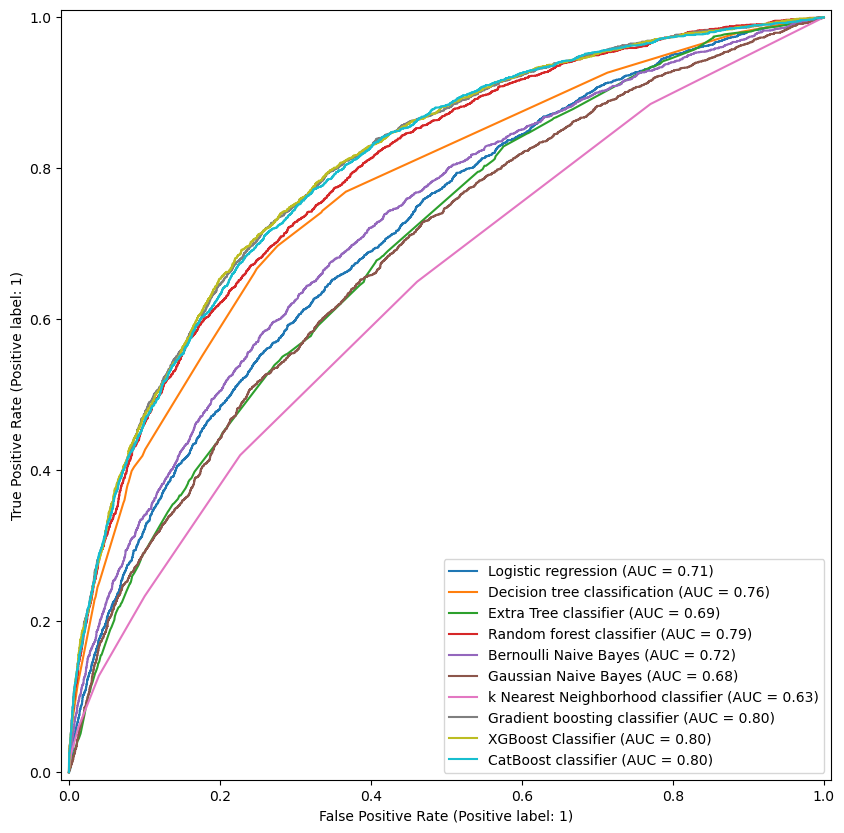

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))

RocCurveDisplay.from_estimator(grid_search_logreg.best_estimator_, X_test, y_test, name='Logistic regression', ax=ax)

RocCurveDisplay.from_estimator(grid_search_dtc.best_estimator_, X_test, y_test,name='Decision tree classification', ax=ax)

RocCurveDisplay.from_estimator(grid_search_ext.best_estimator_, X_test, y_test,name='Extra Tree classifier',ax=ax)

RocCurveDisplay.from_estimator(grid_search_rfc.best_estimator_, X_test, y_test, name='Random forest classifier', ax=ax)

RocCurveDisplay.from_estimator(grid_search_bnb.best_estimator_, X_test, y_test,name='Bernoulli Naive Bayes',ax=ax)

RocCurveDisplay.from_estimator(gnb, X_test, y_test,name='Gaussian Naive Bayes',ax=ax)

RocCurveDisplay.from_estimator(grid_search_kNN.best_estimator_, X_test, y_test, name='k Nearest Neighborhood classifier', ax=ax)

RocCurveDisplay.from_estimator(grid_search_gbc.best_estimator_, X_test, y_test, name='Gradient boosting classifier', ax=ax)

RocCurveDisplay.from_estimator(grid_search_xg.best_estimator_, X_test, y_test, name='XGBoost Classifier', ax=ax)

RocCurveDisplay.from_estimator(grid_search_cb.best_estimator_, X_test, y_test,name='CatBoost classifier',ax=ax)



plt.show()

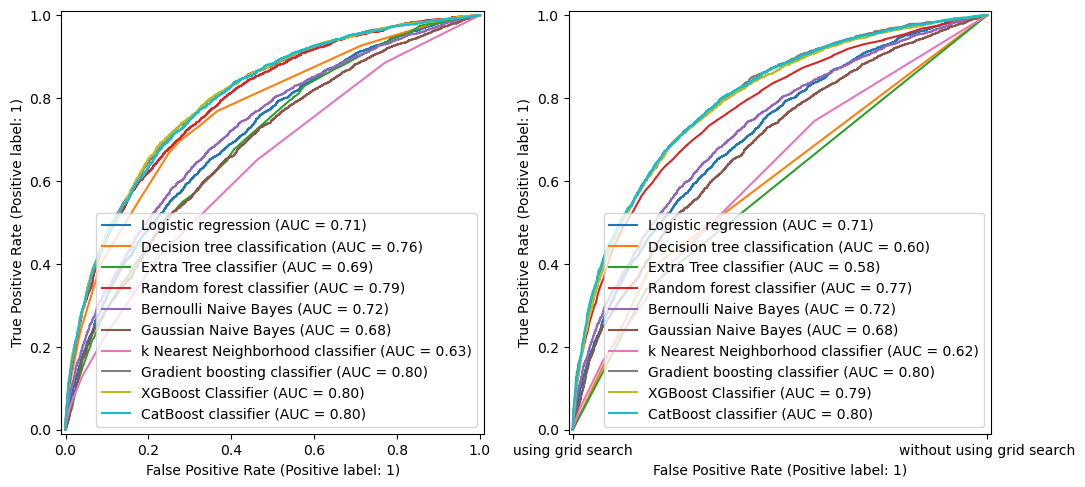

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# using grid search
RocCurveDisplay.from_estimator(grid_search_logreg.best_estimator_, X_test, y_test, name='Logistic regression', ax=ax1)

RocCurveDisplay.from_estimator(grid_search_dtc.best_estimator_, X_test, y_test,name='Decision tree classification', ax=ax1)

RocCurveDisplay.from_estimator(grid_search_ext.best_estimator_, X_test, y_test,name='Extra Tree classifier',ax=ax1)

RocCurveDisplay.from_estimator(grid_search_rfc.best_estimator_, X_test, y_test, name='Random forest classifier', ax=ax1)

RocCurveDisplay.from_estimator(grid_search_bnb.best_estimator_, X_test, y_test,name='Bernoulli Naive Bayes',ax=ax1)

RocCurveDisplay.from_estimator(gnb, X_test, y_test,name='Gaussian Naive Bayes',ax=ax1)

RocCurveDisplay.from_estimator(grid_search_kNN.best_estimator_, X_test, y_test, name='k Nearest Neighborhood classifier', ax=ax1)

RocCurveDisplay.from_estimator(grid_search_gbc.best_estimator_, X_test, y_test, name='Gradient boosting classifier', ax=ax1)

RocCurveDisplay.from_estimator(grid_search_xg.best_estimator_, X_test, y_test, name='XGBoost Classifier', ax=ax1)

RocCurveDisplay.from_estimator(grid_search_cb.best_estimator_, X_test, y_test,name='CatBoost classifier',ax=ax1)


# without using grid search
RocCurveDisplay.from_estimator(logreg, X_test, y_test, name='Logistic regression', ax=ax2)

RocCurveDisplay.from_estimator(dtc, X_test, y_test,name='Decision tree classification', ax=ax2)

RocCurveDisplay.from_estimator(ext, X_test, y_test,name='Extra Tree classifier',ax=ax2)

RocCurveDisplay.from_estimator(rfc, X_test, y_test, name='Random forest classifier', ax=ax2)

RocCurveDisplay.from_estimator(bnb, X_test, y_test,name='Bernoulli Naive Bayes',ax=ax2)

RocCurveDisplay.from_estimator(gnb, X_test, y_test,name='Gaussian Naive Bayes',ax=ax2)

RocCurveDisplay.from_estimator(kNN, X_test, y_test, name='k Nearest Neighborhood classifier', ax=ax2)

RocCurveDisplay.from_estimator(gbc, X_test, y_test, name='Gradient boosting classifier', ax=ax2)

RocCurveDisplay.from_estimator(xg, X_test, y_test, name='XGBoost Classifier', ax=ax2)

RocCurveDisplay.from_estimator(cb, X_test, y_test,name='CatBoost classifier',ax=ax2)


plt.xticks([0,1], ['using grid search', 'without using grid search'])

plt.show()

